In [419]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from tabulate import tabulate
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.svm import SVC # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report


sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

path = r'/content/drive/MyDrive/datasets/bank-additional-full.csv'
df=pd.read_csv(path, sep=';', index_col=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df.shape

(41188, 21)

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
# Change object data type to categorical data type
df = df.astype({'job':'category', 'marital':'category', 'education':'category', 'default':'category', 'housing':'category', 'loan':'category', 'contact':'category', 'month':'category', 'day_of_week':'category', 'poutcome':'category', 'y':'category'})


In [12]:
df.dtypes


age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [13]:
# Change column names
new_column_names = {
    'contact': 'contact_type',
    'duration': 'last_contact_duration',
    'pdays': 'passed_days',
    'poutcome': 'previous_outcome',
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'nr.employed': 'number_of_employees'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)


In [14]:
# Create a column called has_term_deposit which is going to represent 0 for the negative class and 1 for the positive class.
df['has_term_deposit'] = (df.y == 'yes').astype('int')


### Data Cleaning

In [15]:
# Create a new column called age_band
df['age_band'] = pd.cut(df['age'], [1, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['1-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])


In [16]:
# Replace any `unknown` value with other values of job randomly.
job_values = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'student']

# Replace 'unknown' values with a random job from the specified list
df['job'] = np.where(df['job'] == 'unknown', np.random.choice(job_values, size=len(df)), df['job'])


In [17]:
# Replace any `unknown` value with other values of marital randomly.
marital_values = ['married', 'single', 'divorced']

# Replace 'unknown' values with a random marital from the specified list
df['marital'] = np.where(df['marital'] == 'unknown', np.random.choice(marital_values, size=len(df)), df['marital'])


In [18]:
df['education'] = df['education'].replace('basic.4y', 'primary')

In [19]:
df['education'] = df['education'].replace('basic.6y', 'secondary')

In [20]:
df['education'] = df['education'].replace('basic.9y', 'tertiary')

In [21]:
df['education'] = df['education'].replace('high.school', 'high_school')

In [22]:
df['education'] = df['education'].replace('university.degree', 'university_degree')

In [23]:
df['education'] = df['education'].replace('professional.course', 'professional_course')

In [24]:
# Replace any `unknown` value with other values of education randomly.
education_values = ['university_degree', 'high_school', 'tertiary', 'professional_course', 'primary', 'secondary', 'illiterate']

# Replace 'unknown' values with a random education from the specified list
df['education'] = np.where(df['education'] == 'unknown', np.random.choice(education_values, size=len(df)), df['education'])


In [25]:
# Replace any `unknown` value with other values of default randomly.
default_values = ['yes', 'no']

# Replace 'unknown' values with a random default from the specified list
df['default'] = np.where(df['default'] == 'unknown', np.random.choice(default_values, size=len(df)), df['default'])


In [26]:
# Replace any `unknown` value with other values of housing randomly.
housing_values = ['yes', 'no']

# Replace 'unknown' values with a random housing from the specified list
df['housing'] = np.where(df['housing'] == 'unknown', np.random.choice(housing_values, size=len(df)), df['housing'])


In [27]:
# Replace any `unknown` value with other values of loan randomly.
loan_values = ['yes', 'no']

# Replace 'unknown' values with a random loan from the specified list
df['loan'] = np.where(df['loan'] == 'unknown', np.random.choice(loan_values, size=len(df)), df['loan'])


In [28]:
df['passed_days'] = df['passed_days'].replace(999, -1)

- passed_days: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

- IMPORTANT NOTE: It is worth mentioning here that "was not previously contacted" is only in the context of a previous campaign and does not mean they were not previously contacted at all.

In [29]:
"""
The passed_days data indicates how many times the customer has been contacted before.

- if the passed_days = 0, it indicates that it has not been contacted before.
- if the passed_days = 1, it indicates that it was contacted earlier.
"""

def passed_days_work(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)


df['new_passed_days'] = df['passed_days'].apply(passed_days_work)


In [30]:
# Replace any `nonexistent` value with other values of previous_outcome randomly.
previous_outcome_values = ['success', 'failure']

# Replace 'nonexistent' values with a random previous_outcome from the specified list
df['previous_outcome'] = np.where(df['previous_outcome'] == 'nonexistent', np.random.choice(previous_outcome_values, size=len(df)), df['previous_outcome'])


In [31]:
# Check the duplicated rows
df.duplicated(keep=False).sum()


20

In [32]:
# Print duplicated values

"""
Duplicated rows can introduce bias and skew the analysis results. By removing duplicated rows, analysts can ensure the accuracy and integrity of the data, leading to more reliable insights and conclusions.
"""

duplicated_rows = df[df.duplicated(keep=False)]  # keep=False marks all occurrences as True
duplicated_rows


age          job   marital            education default housing loan  \
1265    39  blue-collar   married            secondary      no      no   no   
1266    39  blue-collar   married            secondary      no      no   no   
14155   27   technician    single  professional_course      no      no   no   
14234   27   technician    single  professional_course      no      no   no   
16819   47   technician  divorced          high_school      no     yes   no   
16956   47   technician  divorced          high_school      no     yes   no   
18464   32   technician    single  professional_course      no     yes   no   
18465   32   technician    single  professional_course      no     yes   no   
20072   55     services   married          high_school     yes      no   no   
20216   55     services   married          high_school     yes      no   no   
20531   41   technician   married  professional_course      no     yes   no   
20534   41   technician   married  professional_course      no     yes   no   
25183   39       admin.   married    university_degree      no      no   no   
25217   39       admin.   married    university_degree      no      no   no   
28476   24     services    single          high_school      no     yes   no   
28477   24     services    single          high_school      no     yes   no   
32505   35       admin.   married    university_degree      no     yes   no   
32516   35       admin.   married    university_degree      no     yes   no   
38255   71      retired    single    university_degree      no      no   no   
38281   71      retired    single    university_degree      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
1265     telephone   may         thu  ...           success   
1266     telephone   may         thu  ...           success   
14155     cellular   jul         mon  ...           success   
14234     cellular   jul         mon  ...           success   
16819     cellular   jul         thu  ...           failure   
16956     cellular   jul         thu  ...           failure   
18464     cellular   jul         thu  ...           failure   
18465     cellular   jul         thu  ...           failure   
20072     cellular   aug         mon  ...           success   
20216     cellular   aug         mon  ...           success   
20531     cellular   aug         tue  ...           success   
20534     cellular   aug         tue  ...           success   
25183     cellular   nov         tue  ...           success   
25217     cellular   nov         tue  ...           success   
28476     cellular   apr         tue  ...           success   
28477     cellular   apr         tue  ...           success   
32505     cellular   may         fri  ...           success   
32516     cellular   may         fri  ...           success   
38255    telephone   oct         tue  ...           failure   
38281    telephone   oct         tue  ...           failure   

       employment_variation_rate  consumer_price_index  \
1265                         1.1                93.994   
1266                         1.1                93.994   
14155                        1.4                93.918   
14234                        1.4                93.918   
16819                        1.4                93.918   
16956                        1.4                93.918   
18464                        1.4                93.918   
18465                        1.4                93.918   
20072                        1.4                93.444   
20216                        1.4                93.444   
20531                        1.4                93.444   
20534                        1.4                93.444   
25183                       -0.1                93.200   
25217                       -0.1                93.200   
28476                       -1.8                93.075   
28477                       -1.8                93.075   
32505                       -1.8     

In [33]:
"""
For duplicated values, we can do this:
    - Review and Understand.
    - Address Data Entry Issues.
    - Aggregate Duplicates.
    - Flag Duplicates.
    - Handle Partial Duplicates.
    - Identify and Remove Duplicates.
"""

df = df.drop_duplicates()


In [34]:
df.duplicated(keep=False).sum()


0

In [35]:
# Check the missing values
df.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
age_band                     0
new_passed_days              0
dtype: int64

<Axes: >

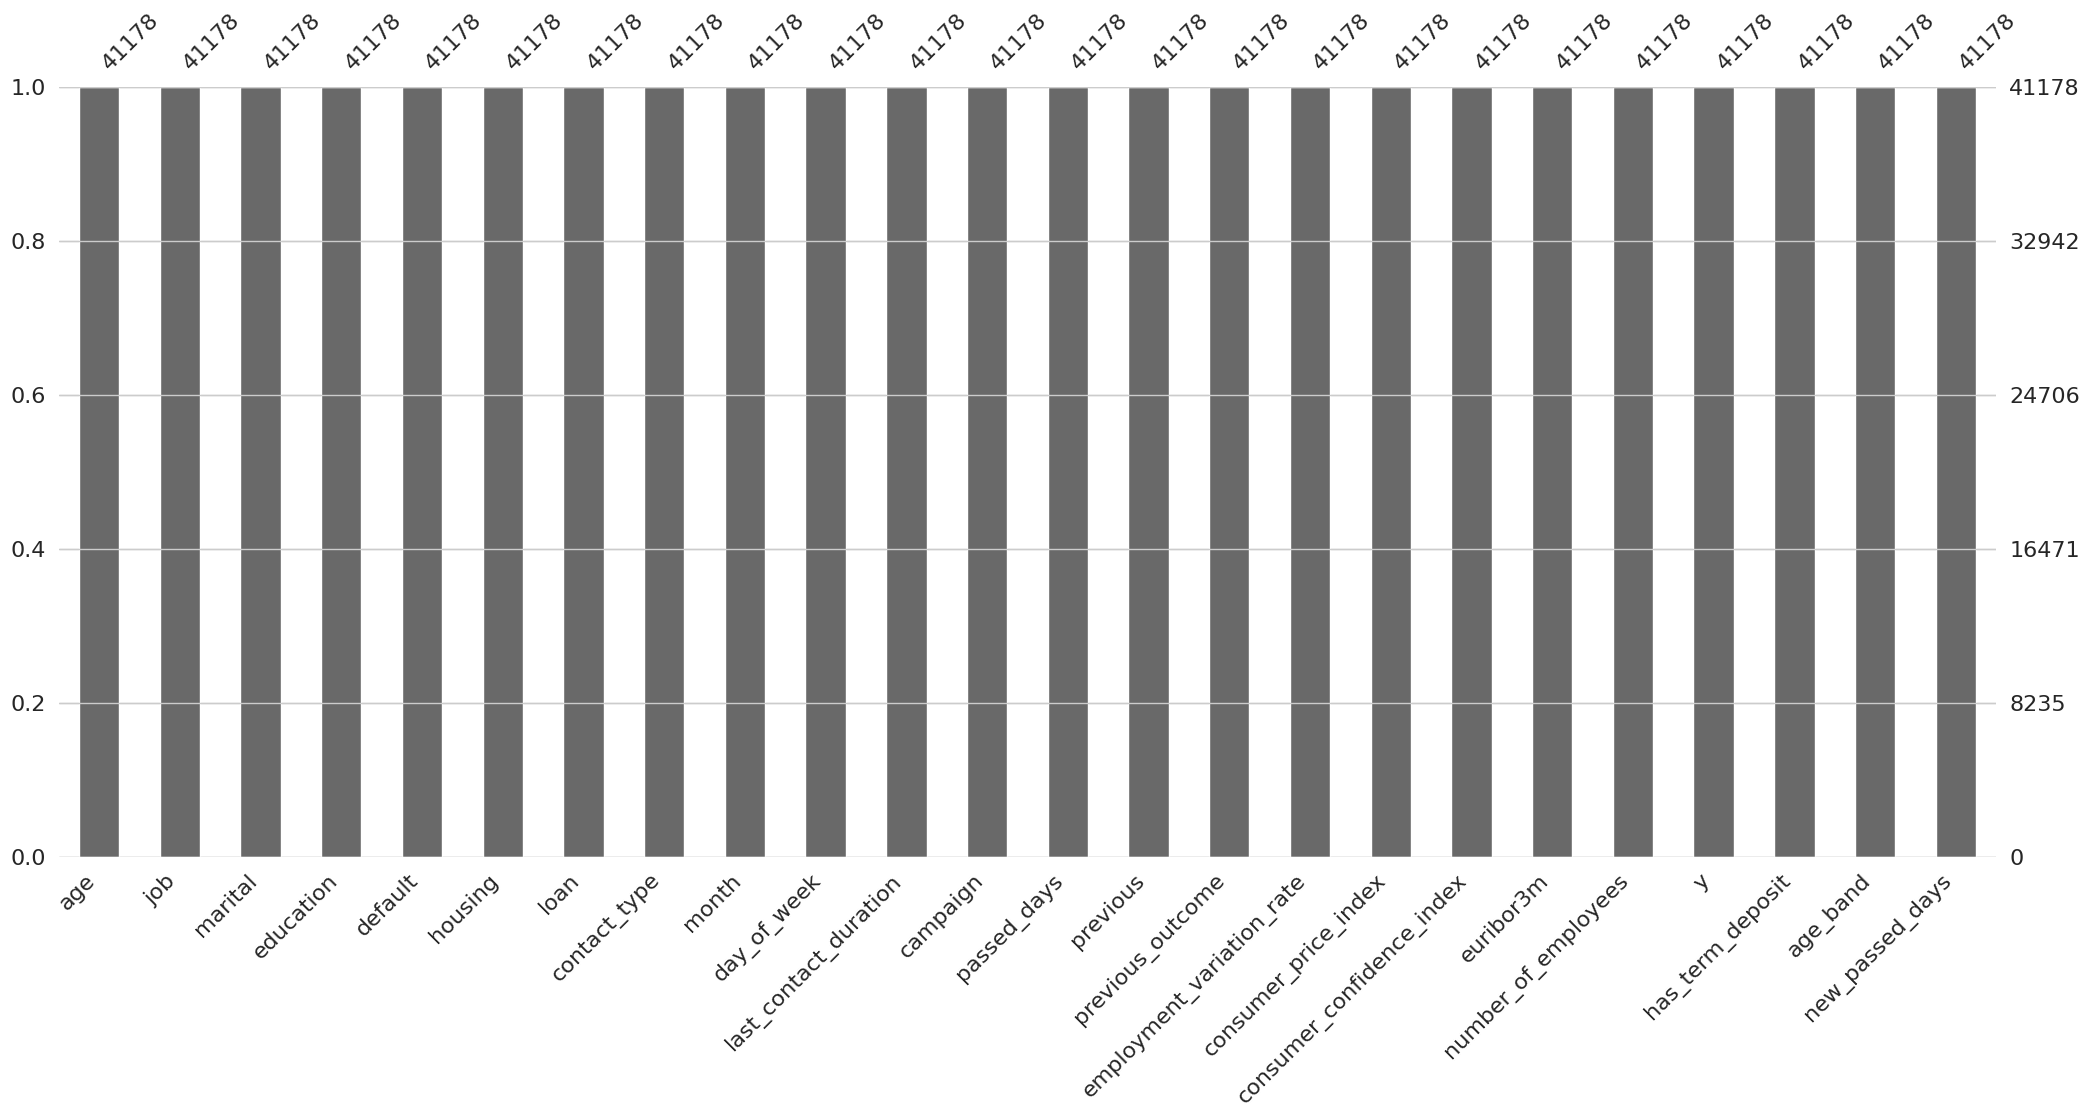

In [36]:
# Plot the missing values
msno.bar(df)


<Axes: >

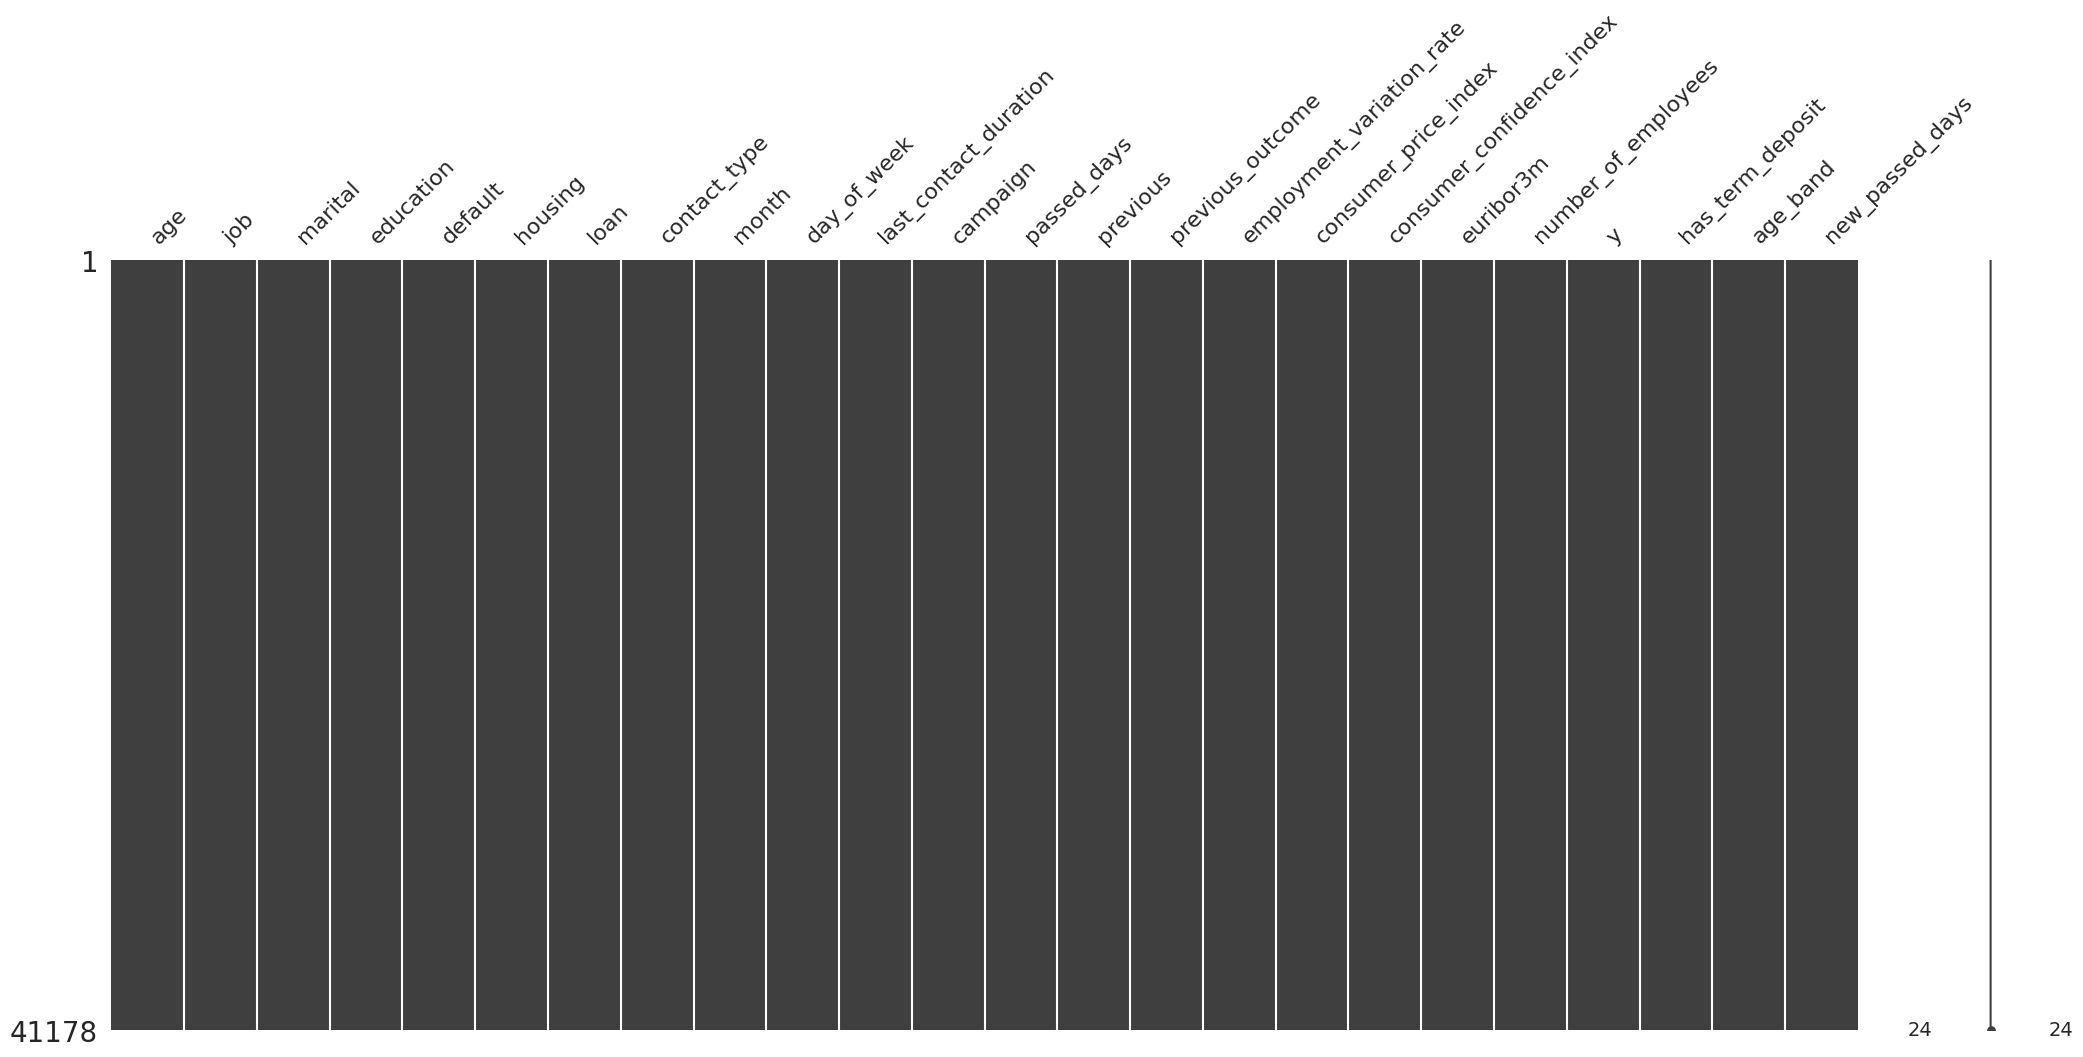

In [37]:
# Plot the missing values
msno.matrix(df)


In [230]:
df.shape

(41178, 24)

In [231]:
# Explore unique values and their counts in a specified column

def explore_column(df, column_name):

    unique_values = df[column_name].unique()
    value_counts = df[column_name].value_counts()

    return unique_values, value_counts


In [232]:
unique_values, value_counts = explore_column(df, 'age')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]

 ---------------------------------------- 

Value Counts:
31    1947
32    1845
33    1833
36    1780
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


In [233]:
unique_values, value_counts = explore_column(df, 'job')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']

 ---------------------------------------- 

Value Counts:
admin.           10445
blue-collar       9284
technician        6759
services          3996
management        2959
retired           1754
entrepreneur      1483
self-employed     1452
housemaid         1093
unemployed        1050
student            903
Name: job, dtype: int64


In [42]:
unique_values, value_counts = explore_column(df, 'marital')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['divorced', 'married', 'single']

 ---------------------------------------- 

Value Counts:
married     24958
single      11578
divorced     4642
Name: marital, dtype: int64


In [43]:
unique_values, value_counts = explore_column(df, 'education')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['high_school', 'illiterate', 'primary', 'professional_course', 'secondary', 'tertiary', 'university_degree']

 ---------------------------------------- 

Value Counts:
university_degree      12444
high_school             9776
tertiary                6275
professional_course     5474
primary                 4417
secondary               2535
illiterate               257
Name: education, dtype: int64


In [44]:
unique_values, value_counts = explore_column(df, 'default')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'yes']

 ---------------------------------------- 

Value Counts:
no     36846
yes     4332
Name: default, dtype: int64


In [45]:
unique_values, value_counts = explore_column(df, 'housing')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'yes']

 ---------------------------------------- 

Value Counts:
yes    22053
no     19125
Name: housing, dtype: int64


In [46]:
unique_values, value_counts = explore_column(df, 'loan')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'yes']

 ---------------------------------------- 

Value Counts:
no     34451
yes     6727
Name: loan, dtype: int64


In [47]:
unique_values, value_counts = explore_column(df, 'contact_type')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['cellular', 'telephone']

 ---------------------------------------- 

Value Counts:
cellular     26136
telephone    15042
Name: contact_type, dtype: int64


In [48]:
unique_values, value_counts = explore_column(df, 'month')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

 ---------------------------------------- 

Value Counts:
may    13767
jul     7171
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [49]:
unique_values, value_counts = explore_column(df, 'day_of_week')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['fri', 'mon', 'thu', 'tue', 'wed']

 ---------------------------------------- 

Value Counts:
thu    8620
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


In [50]:
unique_values, value_counts = explore_column(df, 'last_contact_duration')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [51]:
unique_values, value_counts = explore_column(df, 'campaign')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]

 ---------------------------------------- 

Value Counts:
1     17636
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


In [52]:
unique_values, value_counts = explore_column(df, 'passed_days')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27]

 ---------------------------------------- 

Value Counts:
-1     39663
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: passed_days, dtype: int64


In [234]:
unique_values, value_counts = explore_column(df, 'previous')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1, 2, 3, 4, 5, 6, 7]

 ---------------------------------------- 

Value Counts:
0    35553
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


In [54]:
unique_values, value_counts = explore_column(df, 'previous_outcome')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['failure' 'success']

 ---------------------------------------- 

Value Counts:
failure    21970
success    19208
Name: previous_outcome, dtype: int64


In [55]:
unique_values, value_counts = explore_column(df, 'employment_variation_rate')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

 ---------------------------------------- 

Value Counts:
 1.4    16229
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1663
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: employment_variation_rate, dtype: int64


In [56]:
unique_values, value_counts = explore_column(df, 'consumer_price_index')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]

 ---------------------------------------- 

Value Counts:
93.994    7762
93.918    6682
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: consumer_price_index, dtype: int64


In [57]:
unique_values, value_counts = explore_column(df, 'consumer_confidence_index')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]

 ---------------------------------------- 

Value Counts:
-36.4    7762
-42.7    6682
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: consumer_confidence_index, dtype: int64


In [58]:
unique_values, value_counts = explore_column(df, 'euribor3m')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.8

In [59]:
unique_values, value_counts = explore_column(df, 'number_of_employees')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]

 ---------------------------------------- 

Value Counts:
5228.1    16229
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1663
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: number_of_employees, dtype: int64


In [60]:
unique_values, value_counts = explore_column(df, 'has_term_deposit')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1]

 ---------------------------------------- 

Value Counts:
0    36538
1     4640
Name: has_term_deposit, dtype: int64


In [61]:
unique_values, value_counts = explore_column(df, 'age_band')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)

Unique Values:
['1-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

 ---------------------------------------- 

Value Counts:
30-40     16381
40-50     10238
20-30      7241
50-60      6269
60-70       488
70-80       302
1-20        140
80-90       109
90-100       10
Name: age_band, dtype: int64


In [62]:
unique_values, value_counts = explore_column(df, 'new_passed_days')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1]

 ---------------------------------------- 

Value Counts:
0    39663
1     1515
Name: new_passed_days, dtype: int64


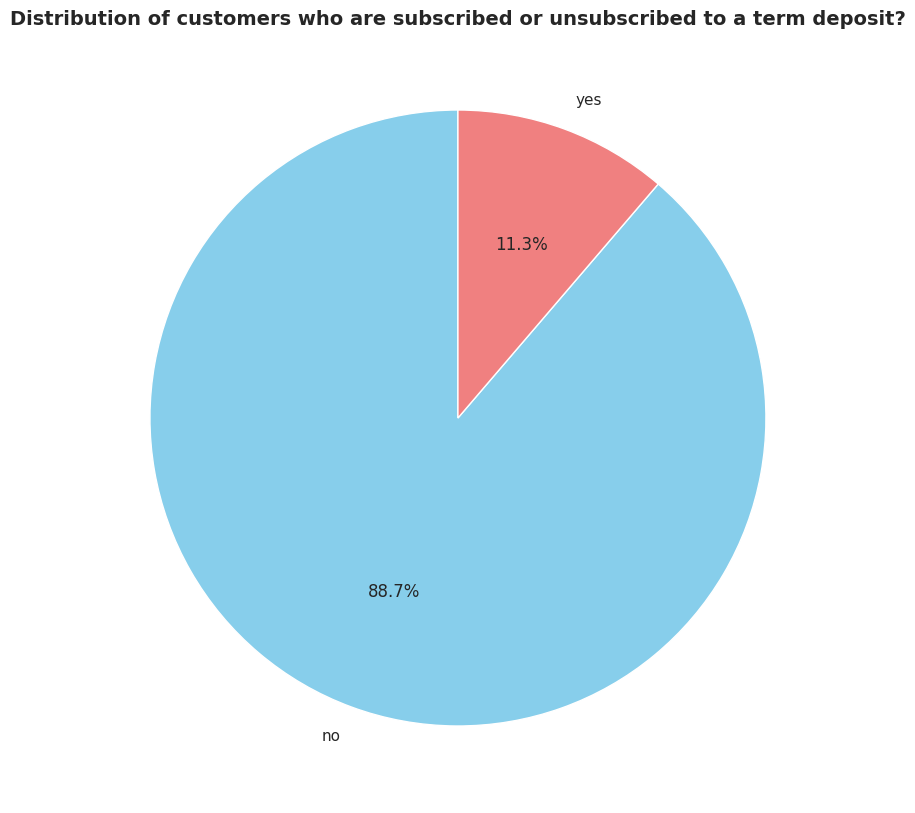

In [63]:
# Plot the (target) customers subscriptions to a term deposit

plt.figure(figsize=(20, 10))

counts = df['y'].value_counts()
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of customers who are subscribed or unsubscribed to a term deposit?', fontsize=14, fontweight='bold')
plt.show()


In [64]:
# Plot customers subscriptions to a term deposit
fig = px.pie(df, names='y', title='Distribution of customers who are subscribed or unsubscribed to a term deposit?')
fig.show()


### 👆🏻 The dataset is imbalanced.

In [235]:
df[list(df.columns)[:12]].sample(10)

age          job  marital            education default housing loan  \
40131   35   technician   single  professional_course      no     yes   no   
18266   39       admin.  married          high_school      no      no   no   
26416   31  blue-collar  married  professional_course      no      no   no   
30687   32  blue-collar  married             tertiary      no     yes   no   
3483    27   technician   single  professional_course      no      no   no   
33040   46  blue-collar  married              primary      no      no   no   
14081   45   unemployed  married    university_degree      no     yes   no   
21241   33       admin.  married    university_degree      no     yes   no   
3728    47  blue-collar  married             tertiary     yes     yes   no   
7408    58    housemaid  married              primary     yes     yes   no   

      contact_type month day_of_week  last_contact_duration  campaign  
40131     cellular   jul         tue                    577         6  
18266     cellular   jul         wed                    184         6  
26416     cellular   nov         thu                    230         1  
30687     cellular   may         tue                     72         1  
3483     telephone   may         thu                    124         2  
33040     cellular   may         mon                    471         3  
14081     cellular   jul         mon                    122         2  
21241     cellular   aug         mon                    702         1  
3728     telephone   may         fri                    229         1  
7408     telephone   may         fri                    652         2

In [236]:
df[list(df.columns)[12:]].sample(10)


passed_days  previous previous_outcome  employment_variation_rate  \
9438            -1         0          success                        1.4   
39422           -1         0          failure                       -1.8   
31324           -1         0          success                       -1.8   
5138            -1         0          success                        1.1   
11068           -1         0          failure                        1.4   
39754           -1         0          failure                       -1.8   
25248           -1         0          success                       -0.1   
13349           -1         0          success                        1.4   
22694           -1         0          failure                        1.4   
16464           -1         0          failure                        1.4   

       consumer_price_index  consumer_confidence_index  euribor3m  \
9438                 94.465                      -41.8      4.967   
39422                93.749                      -34.6      0.640   
31324                92.893                      -46.2      1.334   
5138                 93.994                      -36.4      4.857   
11068                94.465                      -41.8      4.962   
39754                93.876                      -40.0      0.699   
25248                93.200                      -42.0      4.153   
13349                93.918                      -42.7      4.962   
22694                93.444                      -36.1      4.964   
16464                93.918                      -42.7      4.963   

       number_of_employees    y  has_term_deposit age_band  new_passed_days  
9438                5228.1   no                 0    30-40                0  
39422               5008.7   no                 0    70-80                0  
31324               5099.1   no                 0    30-40                0  
5138                5191.0   no                 0    30-40                0  
11068               5228.1   no                 0    20-30                0  
39754               5008.7  yes                 1    30-40                0  
25248               5195.8   no                 0    40-50                0  
13349               5228.1   no                 0    30-40                0  
22694               5228.1   no                 0    30-40                0  
16464               5228.1   no                 0    20-30                0

In [237]:
# Plot outliers for numerical variables using box plot

def plot_numerical_vars_with_outliers(df, column_name):
    plt.rcParams['axes.facecolor'] = '#f8fafc'
    plt.figure(figsize=(18, 10))

    sns.boxplot(x=df[column_name], palette='Paired')
    plt.title('Box Plot of Numerical Variables with Outliers')
    plt.show()


In [238]:
# Plot outliers for numerical variables using box plot (Plotly package)
def plot_numerical_vars_with_outliers_plotly(df, column_name, background_color='#f8fafc'):
    fig = go.Figure()

    # Add box plot
    fig.add_trace(go.Box(x=df[column_name], marker=dict(color='#f43f5e')))

    # Add mean as dotted line
    mean_value = df[column_name].mean()
    fig.add_trace(go.Scatter(x=[mean_value, mean_value], y=[0, 1], mode='lines', line=dict(dash='dash', color='black'), name='Mean'))

    # Update layout
    fig.update_layout(
        title=f'Box Plot of Numerical Variable {column_name} with Outliers',
        paper_bgcolor=background_color
    )

    fig.show()


In [240]:
# Plot distribution of categorical variables.
def plot_categorical_vars_distribution(df, column_name, background_color='#f8fafc', palette='pastel'):
    # Set background color
    plt.rcParams['axes.facecolor'] = background_color

    # Calculate percentage values
    total_count = len(df)
    percentage_values = (df[column_name].value_counts() / total_count) * 100

    # Create count plot
    plt.figure(figsize=(18, 10))
    ax = sns.countplot(x=df[column_name], palette=palette)

    # Add percentage labels and borders
    for p in ax.patches:
        percentage = f'{p.get_height() / total_count * 100:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

    # Customize the plot
    plt.title(f'Count Plot of Categorical Variable - {column_name}')
    plt.xticks(rotation=90)
    sns.despine(left=True, bottom=True)  # Remove spines on the left and bottom

    # Show the plot
    plt.show()


In [241]:
# Plot distribution of categorical variables (Using Plotly)
def plot_categorical_vars_distribution_plotly(df, column_name, background_color='#f8fafc'):
    # Calculate percentage values
    total_count = len(df)
    percentage_values = (df[column_name].value_counts() / total_count) * 100

    # Create a DataFrame with count and percentage values
    count_df = df[column_name].value_counts().reset_index()
    count_df.columns = [column_name, 'count']
    count_df['percentage'] = (count_df['count'] / total_count) * 100

    # Create a bar plot using Plotly
    fig = px.bar(count_df, x=column_name, y='count', color=column_name,
                 labels={'x': column_name, 'y': 'Count'}, title=f'Count Plot of Categorical Variable - {column_name}',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

    # Add percentage labels and borders
    for bar in fig.data:
        percentage = f'{count_df[count_df[column_name] == bar.name]["percentage"].values[0]:.2f}%'
        bar.update(text=percentage, hoverinfo='text')

    # Customize the layout
    fig.update_layout(
        paper_bgcolor=background_color,
        xaxis_tickangle=-45
    )

    # Show the plot
    fig.show()


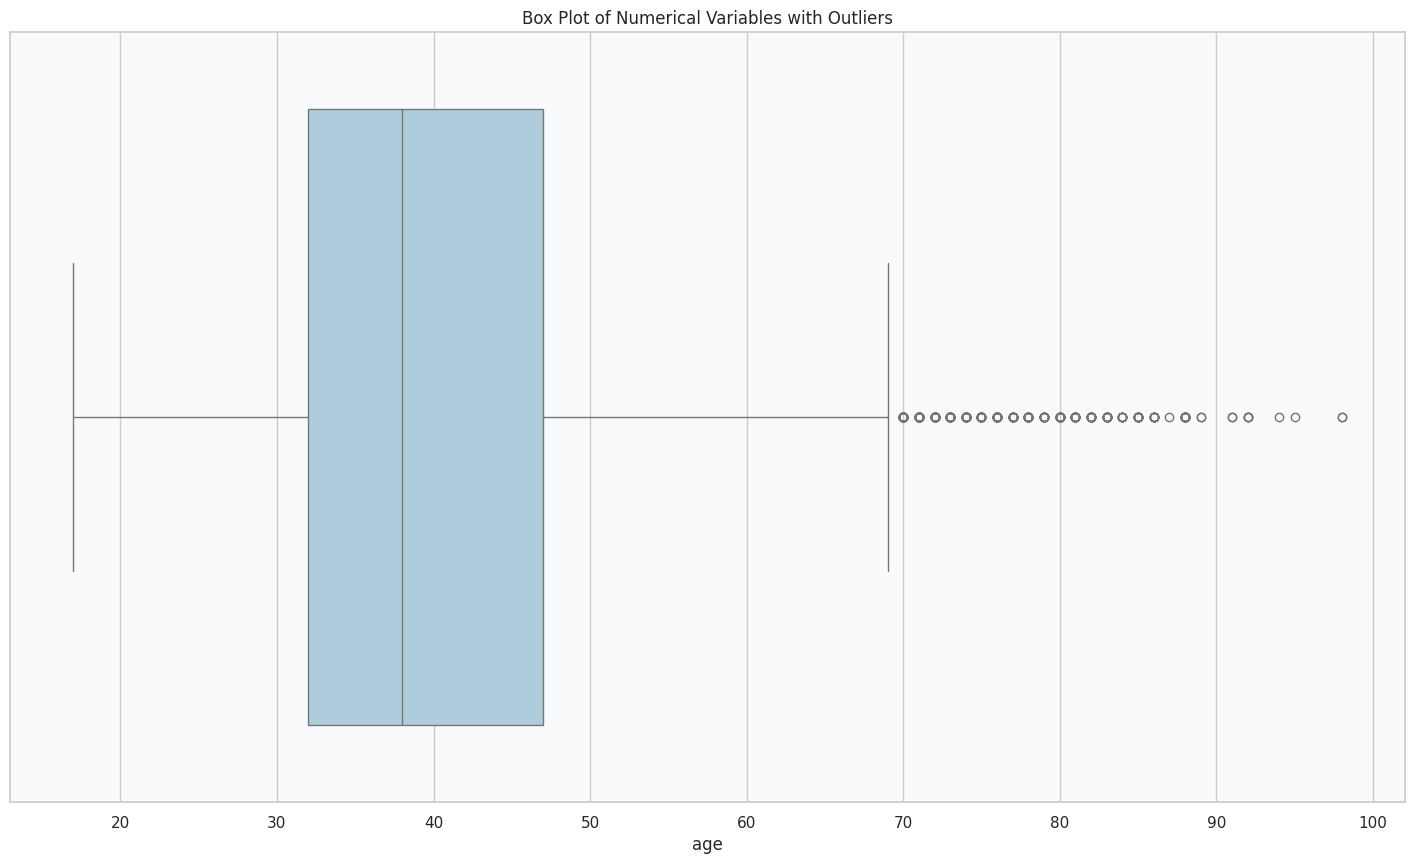

In [242]:
plot_numerical_vars_with_outliers(df, 'age')


In [243]:
plot_numerical_vars_with_outliers_plotly(df, 'age')

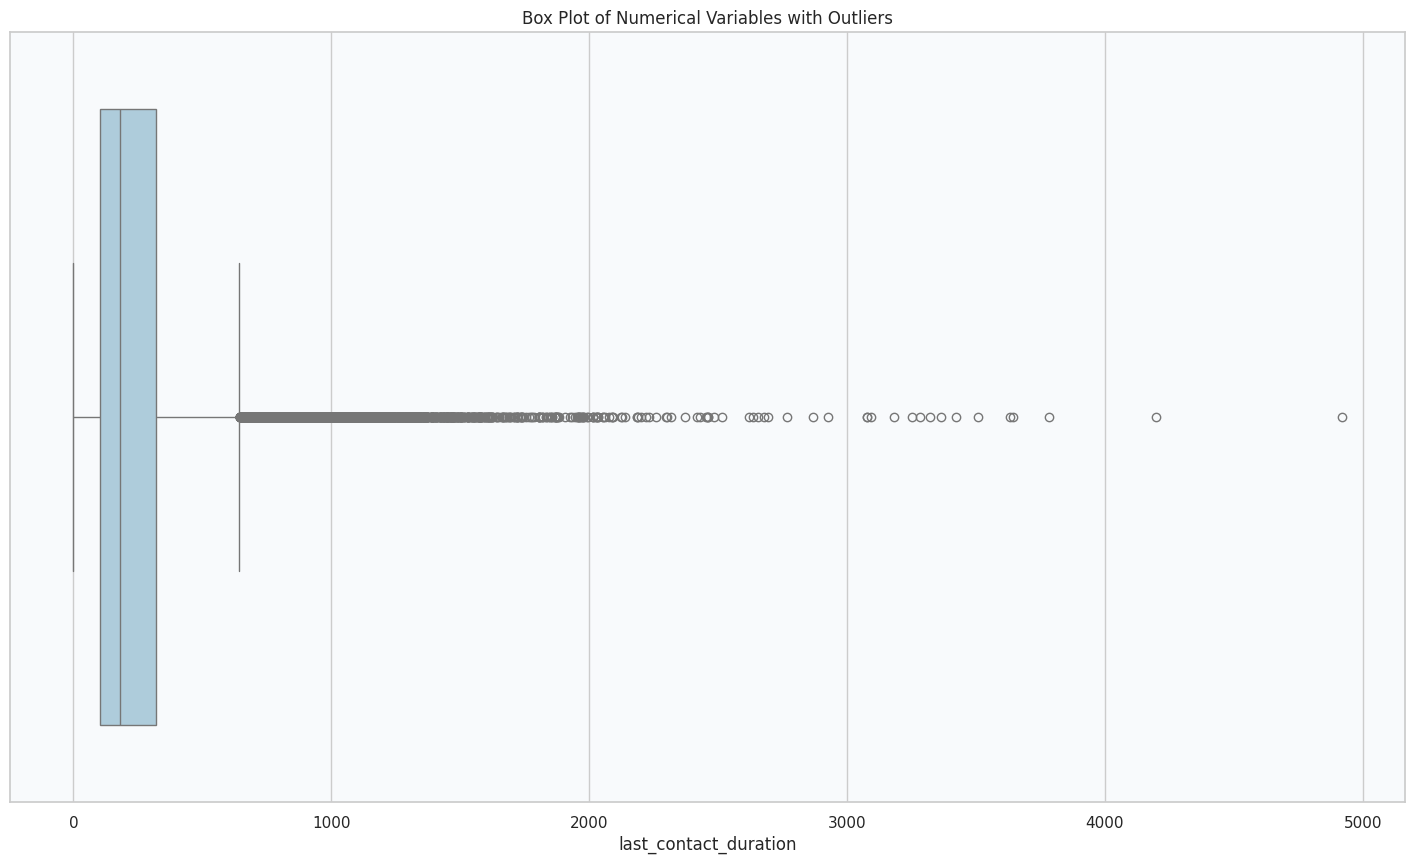

In [244]:
plot_numerical_vars_with_outliers(df, 'last_contact_duration')


In [245]:
plot_numerical_vars_with_outliers_plotly(df, 'last_contact_duration', '#E6ECF5')


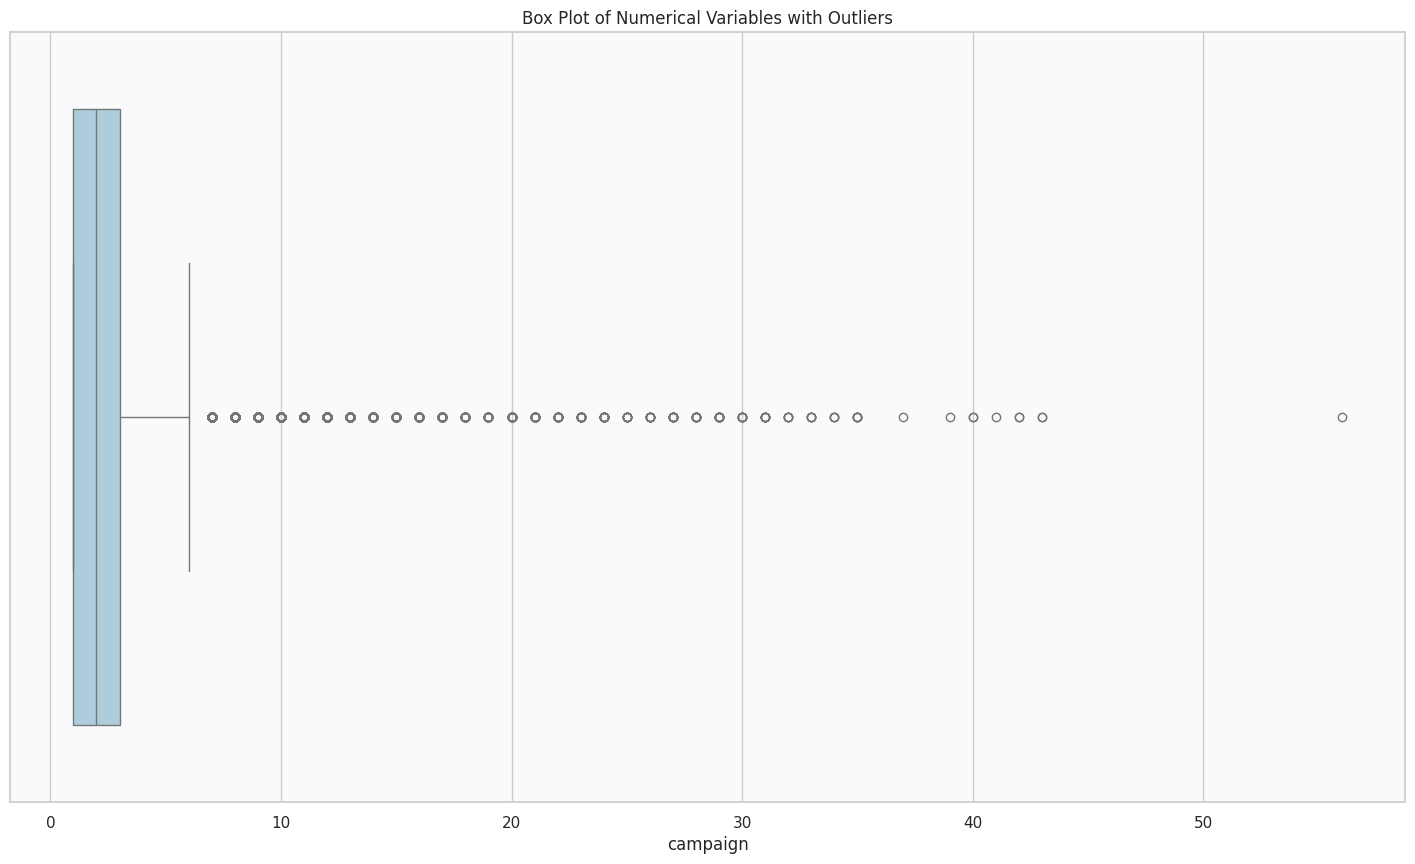

In [246]:
plot_numerical_vars_with_outliers(df, 'campaign')


In [247]:
plot_numerical_vars_with_outliers_plotly(df, 'campaign', '#E6ECF5')


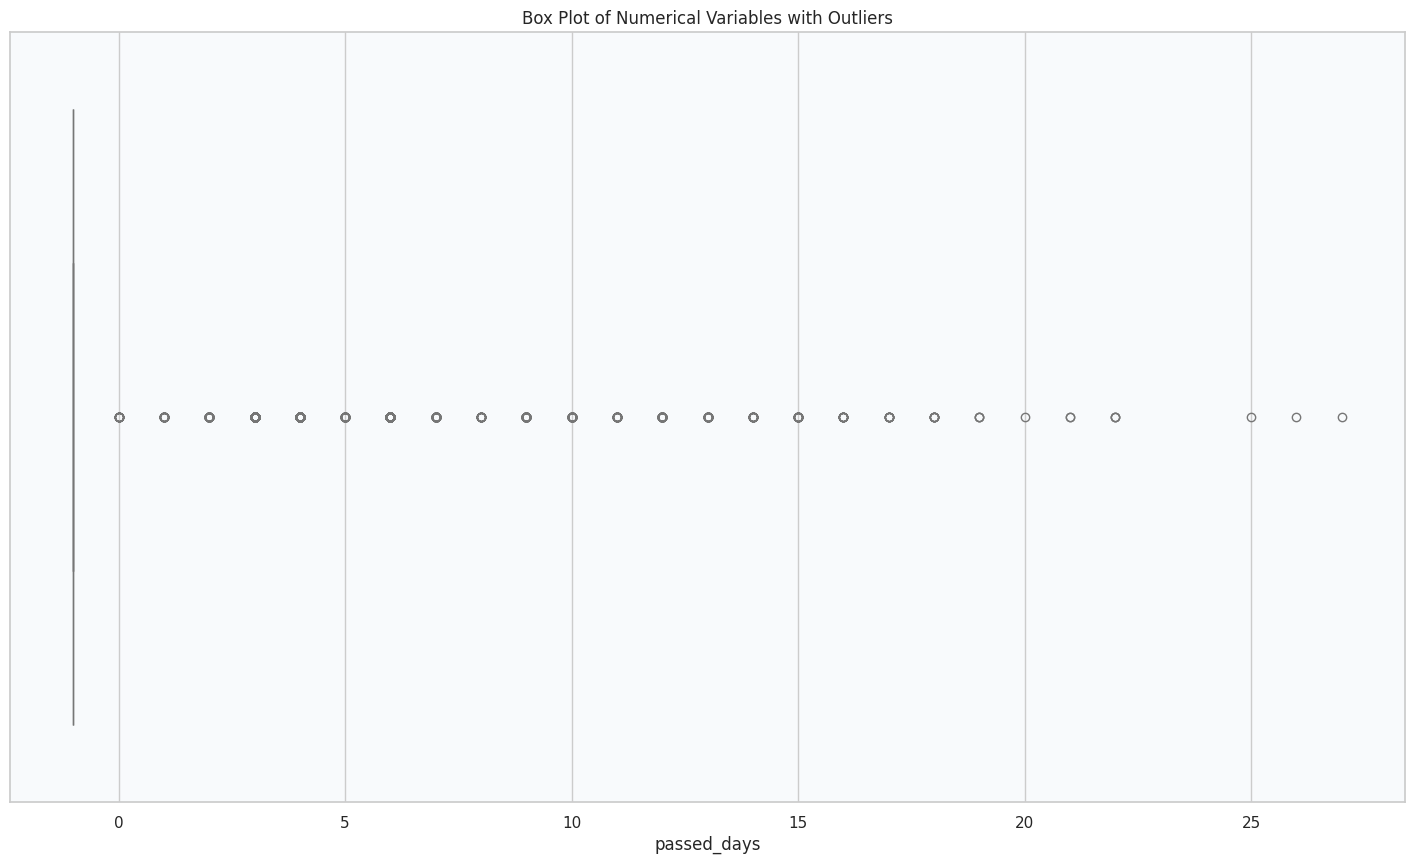

In [248]:
plot_numerical_vars_with_outliers(df, 'passed_days')


In [249]:
plot_numerical_vars_with_outliers_plotly(df, 'passed_days', '#E6ECF5')


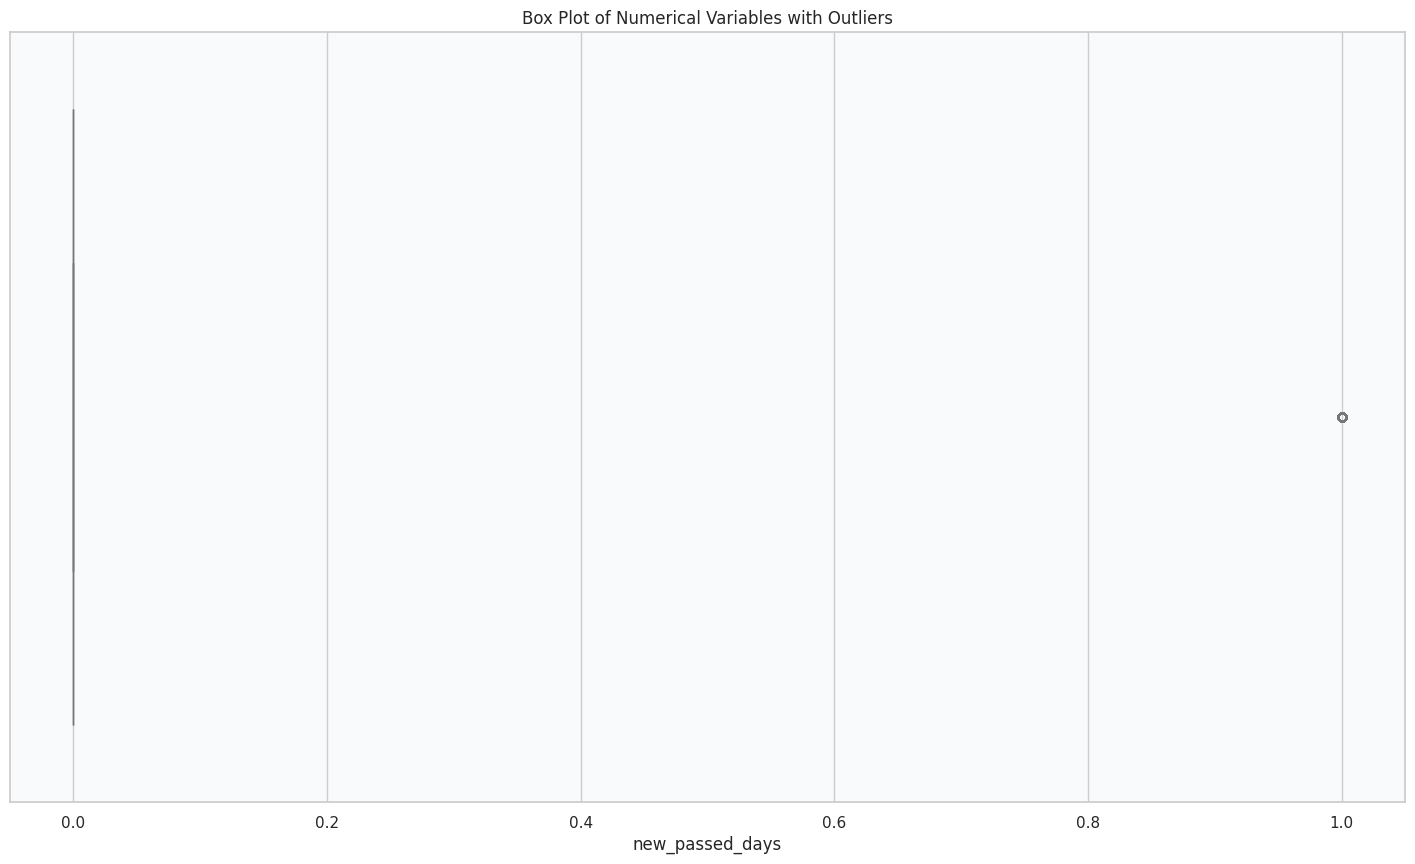

In [250]:
plot_numerical_vars_with_outliers(df, 'new_passed_days')


In [251]:
plot_numerical_vars_with_outliers_plotly(df, 'new_passed_days', '#E6ECF5')


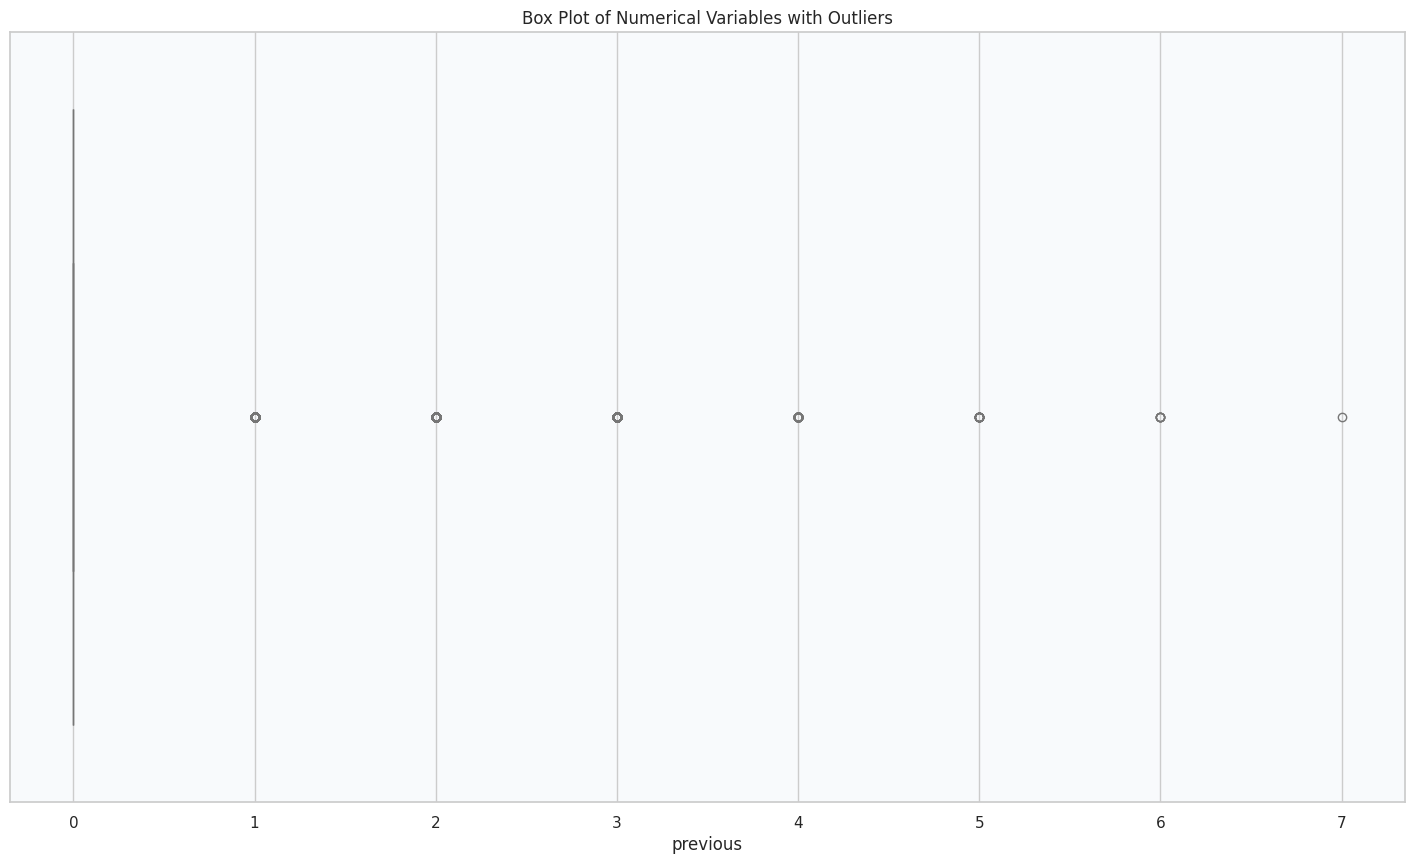

In [252]:
plot_numerical_vars_with_outliers(df, 'previous')


In [253]:
plot_numerical_vars_with_outliers_plotly(df, 'previous', '#E6ECF5')


### Handling outliers

In [254]:
# Create a copy of the dataset
df2 = df.copy()


In [255]:
# Using Z-scores [Count the number of outliers in a specific column of a dataset using Z-scores]
def detect_count_outliers(df, column_name, threshold=3):

    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column_name])

    # Identify outliers
    outliers_df = df[abs(z_scores) > threshold]

    # Count the number of outliers
    num_outliers = len(outliers_df)

    print(f"Number of outliers in '{column_name}': {num_outliers}")

    return num_outliers, outliers_df


In [256]:
# Handle outliers by replacing them with the median.
def handle_outliers_with_median(df, column_name, threshold=3):

    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column_name])

    # Replace outliers with the median
    df.loc[abs(z_scores) > threshold, column_name] = df[column_name].median()

    return df


In [257]:
num_outliers, outliers_df = detect_count_outliers(df2, 'age', threshold=3)
num_outliers
outliers_df


Number of outliers in 'age': 369


age      job   marital            education default housing loan  \
27757   76  retired   married    university_degree      no      no  yes   
27780   73  retired   married    university_degree      no     yes   no   
27800   88  retired  divorced              primary      no     yes   no   
27802   88  retired  divorced              primary      no      no   no   
27805   88  retired  divorced              primary      no     yes  yes   
...    ...      ...       ...                  ...     ...     ...  ...   
40986   84  retired  divorced              primary     yes     yes  yes   
40996   81  retired   married              primary      no     yes   no   
41004   80  retired   married  professional_course      no     yes   no   
41183   73  retired   married  professional_course      no     yes   no   
41187   74  retired   married  professional_course      no     yes   no   

      contact_type month day_of_week  ...  previous_outcome  \
27757     cellular   mar         thu  ...           failure   
27780     cellular   mar         tue  ...           failure   
27800     cellular   mar         wed  ...           success   
27802     cellular   mar         wed  ...           failure   
27805     cellular   mar         wed  ...           success   
...            ...   ...         ...  ...               ...   
40986     cellular   oct         mon  ...           success   
40996     cellular   oct         wed  ...           failure   
41004     cellular   oct         thu  ...           failure   
41183     cellular   nov         fri  ...           failure   
41187     cellular   nov         fri  ...           failure   

       employment_variation_rate  consumer_price_index  \
27757                       -1.8                92.843   
27780                       -1.8                92.843   
27800                       -1.8                92.843   
27802                       -1.8                92.843   
27805                       -1.8                92.843   
...                          ...                   ...   
40986                       -1.1                94.601   
40996                       -1.1                94.601   
41004                       -1.1                94.601   
41183                       -1.1                94.767   
41187                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
27757                      -50.0     1.757               5099.1   no   
27780                      -50.0     1.687               5099.1   no   
27800                      -50.0     1.663               5099.1   no   
27802                      -50.0     1.663               5099.1  yes   
27805                      -50.0     1.663               5099.1  yes   
...                          ...       ...                  ...  ...   
40986                      -49.5     1.000               4963.6   no   
40996                      -49.5     1.016               4963.6  yes   
41004                      -49.5     1.025               4963.6  yes   
41183                      -50.8     1.028               4963.6  yes   
41187                      -50.8     1.028               4963.6   no   

       has_term_deposit  age_band  new_passed_days  
27757                 0     70-80                0  
27780                 0     70-80                0  
27800                 0     80-90                0  
27802                 1     80-90                0  
27805                 1     80-90                0  
...                 ...       ...              ...  
40986                 0     80-90                1  
40996                 1     80-90                0  
41004                 1     70-80                0  
41183                 1     70-80                0  
41187                 0     70-80                0  

[369 rows x 24 columns]

In [258]:
df2 = handle_outliers_with_median(df2, 'age', threshold=3)


In [259]:
num_outliers, outliers_df = detect_count_outliers(df2, 'age', threshold=3)
num_outliers
outliers_df


Number of outliers in 'age': 133


age      job   marital            education default housing loan  \
27713   70  retired  divorced              primary      no     yes   no   
27837   70  retired   married              primary      no     yes   no   
27838   70  retired   married              primary      no      no   no   
27844   70  retired   married              primary      no     yes   no   
27879   70   admin.  divorced    university_degree      no      no   no   
...    ...      ...       ...                  ...     ...     ...  ...   
40703   71  retired   married          high_school      no      no   no   
40886   70  retired   married              primary      no      no   no   
40921   71  retired   married  professional_course      no     yes   no   
40933   71  retired   married  professional_course      no      no   no   
40951   70  retired   married  professional_course      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
27713     cellular   mar         mon  ...           failure   
27837     cellular   mar         mon  ...           failure   
27838     cellular   mar         mon  ...           failure   
27844    telephone   mar         mon  ...           failure   
27879     cellular   mar         mon  ...           success   
...            ...   ...         ...  ...               ...   
40703     cellular   sep         mon  ...           failure   
40886     cellular   oct         thu  ...           failure   
40921     cellular   oct         mon  ...           success   
40933     cellular   oct         tue  ...           success   
40951     cellular   oct         thu  ...           success   

       employment_variation_rate  consumer_price_index  \
27713                       -1.8                92.843   
27837                       -1.8                92.843   
27838                       -1.8                92.843   
27844                       -1.8                92.843   
27879                       -1.8                92.843   
...                          ...                   ...   
40703                       -1.1                94.199   
40886                       -1.1                94.601   
40921                       -1.1                94.601   
40933                       -1.1                94.601   
40951                       -1.1                94.601   

       consumer_confidence_index euribor3m  number_of_employees    y  \
27713                      -50.0     1.811               5099.1  yes   
27837                      -50.0     1.629               5099.1   no   
27838                      -50.0     1.629               5099.1   no   
27844                      -50.0     1.629               5099.1   no   
27879                      -50.0     1.560               5099.1   no   
...                          ...       ...                  ...  ...   
40703                      -37.5     0.879               4963.6  yes   
40886                      -49.5     0.965               4963.6   no   
40921                      -49.5     0.977               4963.6   no   
40933                      -49.5     0.982               4963.6  yes   
40951                      -49.5     0.987               4963.6  yes   

       has_term_deposit  age_band  new_passed_days  
27713                 1     60-70                0  
27837                 0     60-70                0  
27838                 0     60-70                0  
27844                 0     60-70                0  
27879                 0     60-70                0  
...                 ...       ...              ...  
40703                 1     70-80                0  
40886                 0     60-70                1  
40921                 0     70-80                0  
40933                 1     70-80                0  
40951                 1     60-70                1  

[133 rows x 24 columns]

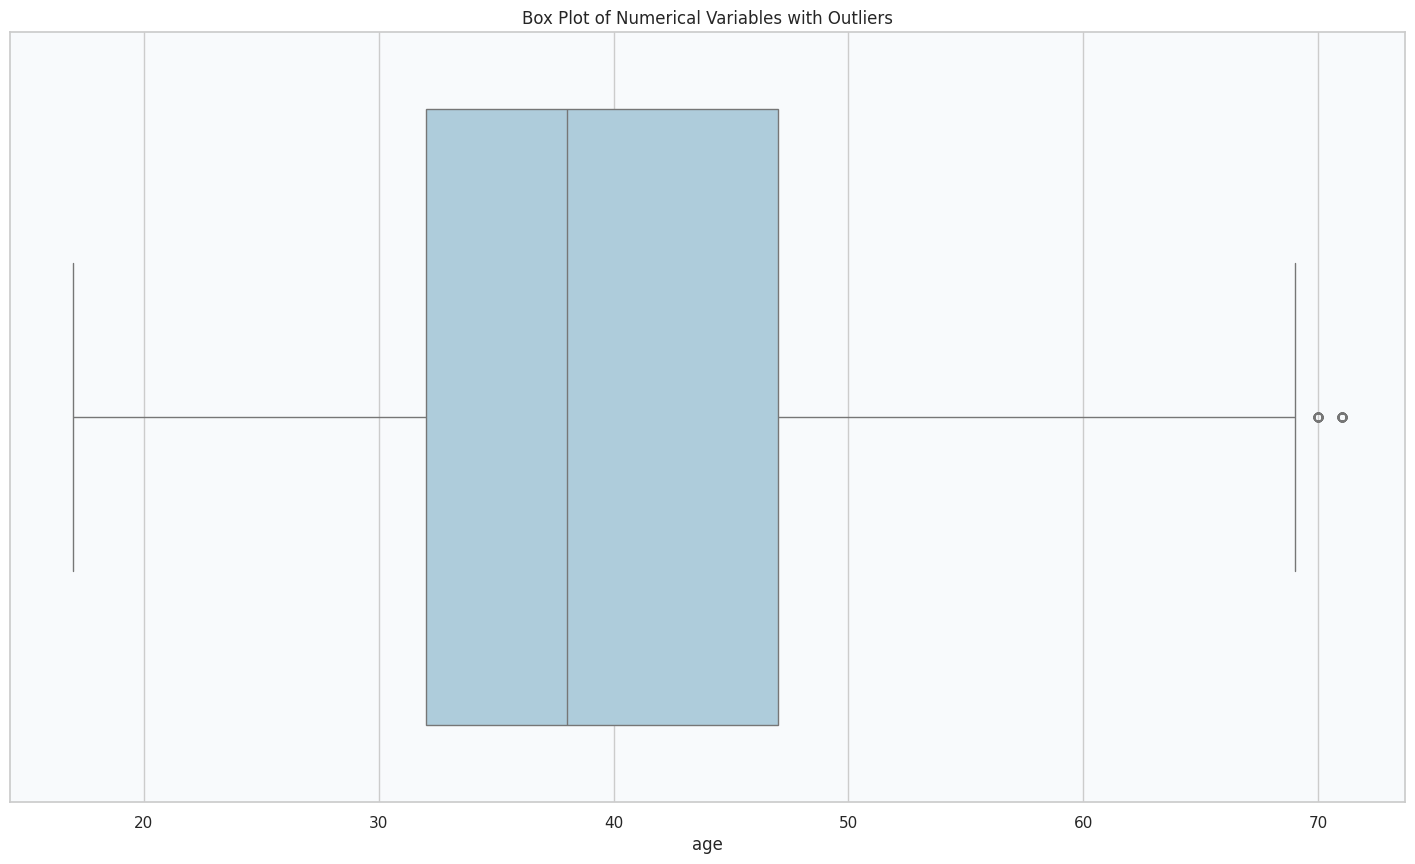

In [260]:
plot_numerical_vars_with_outliers(df2, 'age')


In [263]:
plot_numerical_vars_with_outliers_plotly(df2, 'age')


In [264]:
num_outliers, outliers_df = detect_count_outliers(df2, 'last_contact_duration', threshold=3)
num_outliers
outliers_df


Number of outliers in 'last_contact_duration': 861


age           job   marital            education default housing loan  \
37      52    technician   married             tertiary      no     yes   no   
75      41   blue-collar  divorced              primary      no     yes   no   
83      49  entrepreneur   married    university_degree     yes     yes   no   
88      49    technician   married             tertiary      no      no   no   
164     39      services  divorced          high_school     yes      no   no   
...    ...           ...       ...                  ...     ...     ...  ...   
40880   28        admin.    single          high_school      no      no   no   
40970   24        admin.    single    university_degree      no     yes   no   
41121   46        admin.    single    university_degree      no     yes   no   
41123   36   blue-collar    single            secondary      no      no   no   
41164   54        admin.   married  professional_course      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
37       telephone   may         mon  ...           failure   
75       telephone   may         mon  ...           success   
83       telephone   may         mon  ...           failure   
88       telephone   may         mon  ...           success   
164      telephone   may         mon  ...           failure   
...            ...   ...         ...  ...               ...   
40880     cellular   oct         wed  ...           success   
40970     cellular   oct         fri  ...           success   
41121     cellular   nov         tue  ...           failure   
41123     cellular   nov         tue  ...           success   
41164     cellular   nov         tue  ...           success   

       employment_variation_rate  consumer_price_index  \
37                           1.1                93.994   
75                           1.1                93.994   
83                           1.1                93.994   
88                           1.1                93.994   
164                          1.1                93.994   
...                          ...                   ...   
40880                       -1.1                94.601   
40970                       -1.1                94.601   
41121                       -1.1                94.767   
41123                       -1.1                94.767   
41164                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
37                         -36.4     4.857               5191.0   no   
75                         -36.4     4.857               5191.0  yes   
83                         -36.4     4.857               5191.0  yes   
88                         -36.4     4.857               5191.0  yes   
164                        -36.4     4.857               5191.0   no   
...                          ...       ...                  ...  ...   
40880                      -49.5     0.959               4963.6  yes   
40970                      -49.5     0.993               4963.6  yes   
41121                      -50.8     1.046               4963.6   no   
41123                      -50.8     1.046               4963.6  yes   
41164                      -50.8     1.035               4963.6  yes   

       has_term_deposit  age_band  new_passed_days  
37                    0     50-60                0  
75                    1     40-50                0  
83                    1     40-50                0  
88                    1     40-50                0  
164                   0     30-40                0  
...                 ...       ...              ...  
40880                 1     20-30                0  
40970                 1     20-30                1  
41121                 0     40-50                0  
41123                 1     30-40                0  
41164                 1     50-60                1  

[861 rows x 24 columns]

In [265]:
df2 = handle_outliers_with_median(df2, 'last_contact_duration', threshold=3)


In [266]:
num_outliers, outliers_df = detect_count_outliers(df2, 'last_contact_duration', threshold=3)
num_outliers
outliers_df

Number of outliers in 'last_contact_duration': 886


age           job   marital          education default housing loan  \
61      51   blue-collar   married           tertiary      no     yes   no   
111     58    unemployed   married            primary     yes      no   no   
169     54    management  divorced  university_degree      no     yes   no   
276     34      services   married        high_school      no      no   no   
286     39     housemaid   married           tertiary      no     yes   no   
...    ...           ...       ...                ...     ...     ...  ...   
40993   50  entrepreneur  divorced  university_degree      no     yes   no   
41009   24   blue-collar    single        high_school      no      no   no   
41052   65       retired   married            primary      no      no   no   
41122   34    technician   married           tertiary      no      no   no   
41160   33        admin.   married  university_degree      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
61       telephone   may         mon  ...           failure   
111      telephone   may         mon  ...           success   
169      telephone   may         mon  ...           success   
276      telephone   may         mon  ...           failure   
286      telephone   may         mon  ...           failure   
...            ...   ...         ...  ...               ...   
40993    telephone   oct         tue  ...           success   
41009     cellular   oct         thu  ...           success   
41052     cellular   oct         wed  ...           success   
41122     cellular   nov         tue  ...           failure   
41160     cellular   nov         tue  ...           failure   

       employment_variation_rate  consumer_price_index  \
61                           1.1                93.994   
111                          1.1                93.994   
169                          1.1                93.994   
276                          1.1                93.994   
286                          1.1                93.994   
...                          ...                   ...   
40993                       -1.1                94.601   
41009                       -1.1                94.601   
41052                       -1.1                94.601   
41122                       -1.1                94.767   
41160                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
61                         -36.4     4.857               5191.0   no   
111                        -36.4     4.857               5191.0   no   
169                        -36.4     4.857               5191.0   no   
276                        -36.4     4.857               5191.0   no   
286                        -36.4     4.857               5191.0  yes   
...                          ...       ...                  ...  ...   
40993                      -49.5     1.008               4963.6  yes   
41009                      -49.5     1.025               4963.6  yes   
41052                      -49.5     1.043               4963.6  yes   
41122                      -50.8     1.046               4963.6  yes   
41160                      -50.8     1.035               4963.6  yes   

       has_term_deposit  age_band  new_passed_days  
61                    0     50-60                0  
111                   0     50-60                0  
169                   0     50-60                0  
276                   0     30-40                0  
286                   1     30-40                0  
...                 ...       ...              ...  
40993                 1     40-50                1  
41009                 1     20-30                1  
41052                 1     60-70                0  
41122                 1     30-40                0  
41160                 1     30-40                0  

[886 rows x 24 columns]

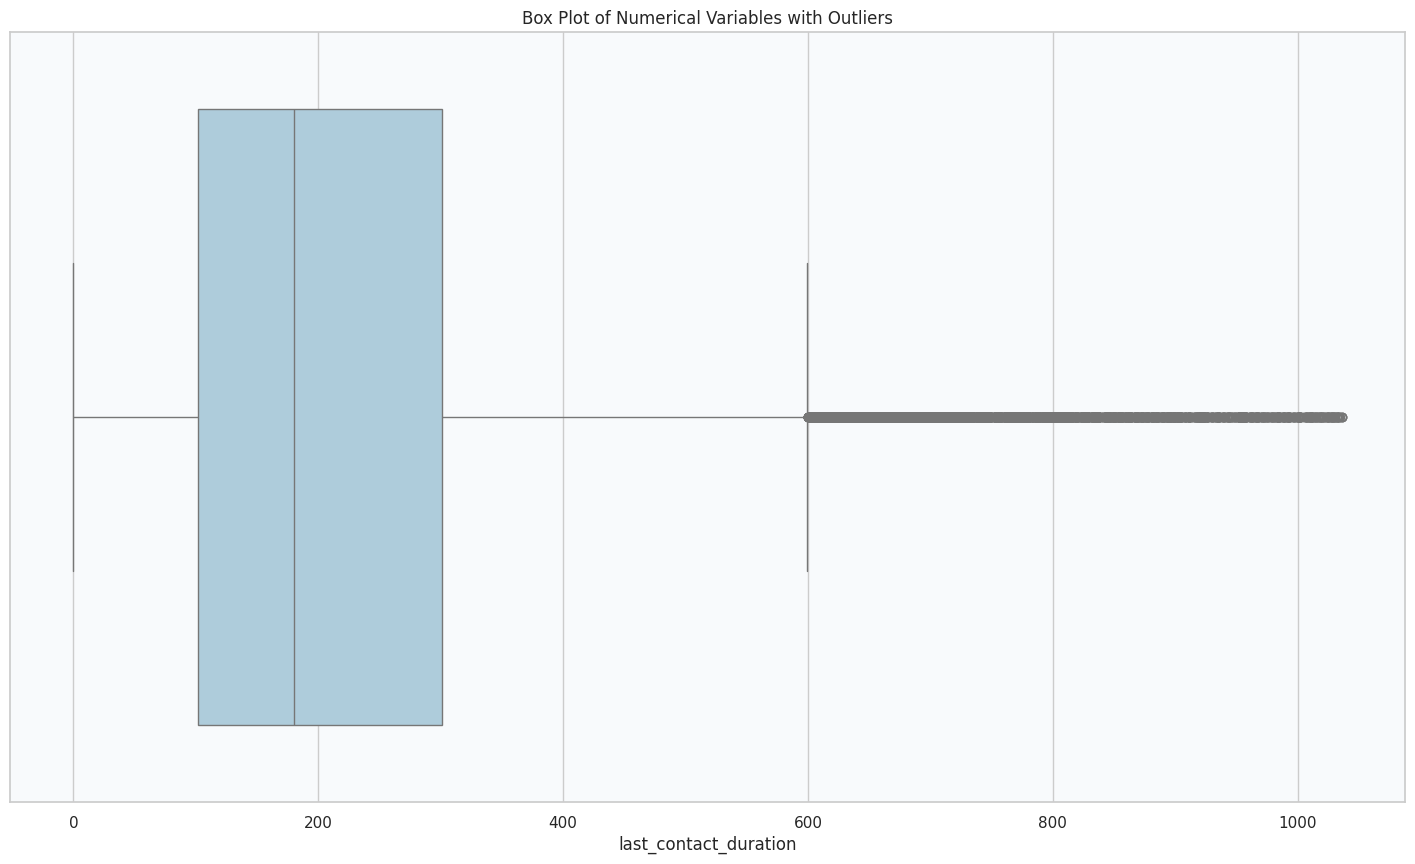

In [267]:
plot_numerical_vars_with_outliers(df2, 'last_contact_duration')

In [268]:
plot_numerical_vars_with_outliers_plotly(df2, 'last_contact_duration', '#E6ECF5')


In [269]:
num_outliers, outliers_df = detect_count_outliers(df2, 'campaign', threshold=3)
num_outliers
outliers_df


Number of outliers in 'campaign': 869


age          job   marital            education default housing loan  \
2189    56       admin.   married             tertiary      no      no   no   
2234    47   management   married    university_degree      no      no   no   
2554    31       admin.   married          high_school     yes     yes   no   
2589    47     services   married          high_school      no      no  yes   
2590    47  blue-collar   married  professional_course     yes     yes   no   
...    ...          ...       ...                  ...     ...     ...  ...   
37587   28   unemployed   married  professional_course      no      no   no   
37876   29       admin.    single    university_degree      no     yes  yes   
37893   52       admin.   married              primary      no      no   no   
40063   21      student    single          high_school      no     yes  yes   
40529   38      retired  divorced    university_degree      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
2189     telephone   may         mon  ...           success   
2234     telephone   may         mon  ...           failure   
2554     telephone   may         tue  ...           failure   
2589     telephone   may         tue  ...           success   
2590     telephone   may         tue  ...           success   
...            ...   ...         ...  ...               ...   
37587    telephone   aug         fri  ...           success   
37876     cellular   aug         mon  ...           success   
37893    telephone   sep         tue  ...           failure   
40063     cellular   jul         thu  ...           failure   
40529     cellular   aug         mon  ...           failure   

       employment_variation_rate  consumer_price_index  \
2189                         1.1                93.994   
2234                         1.1                93.994   
2554                         1.1                93.994   
2589                         1.1                93.994   
2590                         1.1                93.994   
...                          ...                   ...   
37587                       -2.9                92.201   
37876                       -2.9                92.201   
37893                       -3.4                92.379   
40063                       -1.7                94.215   
40529                       -1.7                94.027   

       consumer_confidence_index euribor3m  number_of_employees   y  \
2189                       -36.4     4.857               5191.0  no   
2234                       -36.4     4.857               5191.0  no   
2554                       -36.4     4.856               5191.0  no   
2589                       -36.4     4.856               5191.0  no   
2590                       -36.4     4.856               5191.0  no   
...                          ...       ...                  ...  ..   
37587                      -31.4     0.869               5076.2  no   
37876                      -31.4     0.821               5076.2  no   
37893                      -29.8     0.819               5017.5  no   
40063                      -40.3     0.810               4991.6  no   
40529                      -38.3     0.891               4991.6  no   

       has_term_deposit  age_band  new_passed_days  
2189                  0     50-60                0  
2234                  0     40-50                0  
2554                  0     30-40                0  
2589                  0     40-50                0  
2590                  0     40-50                0  
...                 ...       ...              ...  
37587                 0     20-30                0  
37876                 0     20-30                0  
37893                 0     50-60                1  
40063                 0     20-30                1  
40529                 0     70-80                0  

[869 rows x 24 columns]

In [270]:
df2 = handle_outliers_with_median(df2, 'campaign', threshold=3)


In [271]:
num_outliers, outliers_df = detect_count_outliers(df2, 'campaign', threshold=3)
num_outliers
outliers_df

Number of outliers in 'campaign': 908


age          job  marital            education default housing loan  \
1043    41   technician   single    university_degree      no      no   no   
1094    40   technician  married  professional_course      no     yes   no   
1467    38       admin.   single    university_degree      no      no   no   
1484    38  blue-collar  married            secondary      no      no   no   
1866    54   management  married              primary     yes      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
40176   31       admin.  married          high_school      no      no   no   
40332   25      student   single          high_school      no     yes   no   
40468   38      retired  married             tertiary      no      no   no   
40611   38      retired  married             tertiary      no      no   no   
40821   33   technician   single  professional_course      no     yes   no   

      contact_type month day_of_week  ...  previous_outcome  \
1043     telephone   may         wed  ...           failure   
1094     telephone   may         wed  ...           success   
1467     telephone   may         thu  ...           failure   
1484     telephone   may         thu  ...           success   
1866     telephone   may         fri  ...           failure   
...            ...   ...         ...  ...               ...   
40176     cellular   jul         fri  ...           failure   
40332     cellular   aug         mon  ...           success   
40468     cellular   aug         wed  ...           failure   
40611    telephone   sep         fri  ...           failure   
40821     cellular   sep         fri  ...           failure   

       employment_variation_rate  consumer_price_index  \
1043                         1.1                93.994   
1094                         1.1                93.994   
1467                         1.1                93.994   
1484                         1.1                93.994   
1866                         1.1                93.994   
...                          ...                   ...   
40176                       -1.7                94.215   
40332                       -1.7                94.027   
40468                       -1.7                94.027   
40611                       -1.1                94.199   
40821                       -1.1                94.199   

       consumer_confidence_index euribor3m  number_of_employees   y  \
1043                       -36.4     4.856               5191.0  no   
1094                       -36.4     4.856               5191.0  no   
1467                       -36.4     4.855               5191.0  no   
1484                       -36.4     4.855               5191.0  no   
1866                       -36.4     4.855               5191.0  no   
...                          ...       ...                  ...  ..   
40176                      -40.3     0.861               4991.6  no   
40332                      -38.3     0.898               4991.6  no   
40468                      -38.3     0.903               4991.6  no   
40611                      -37.5     0.883               4963.6  no   
40821                      -37.5     0.879               4963.6  no   

       has_term_deposit  age_band  new_passed_days  
1043                  0     40-50                0  
1094                  0     30-40                0  
1467                  0     30-40                0  
1484                  0     30-40                0  
1866                  0     50-60                0  
...                 ...       ...              ...  
40176                 0     30-40                0  
40332                 0     20-30                1  
40468                 0     70-80                0  
40611                 0     70-80                0  
40821                 0     30-40                0  

[908 rows x 24 columns]

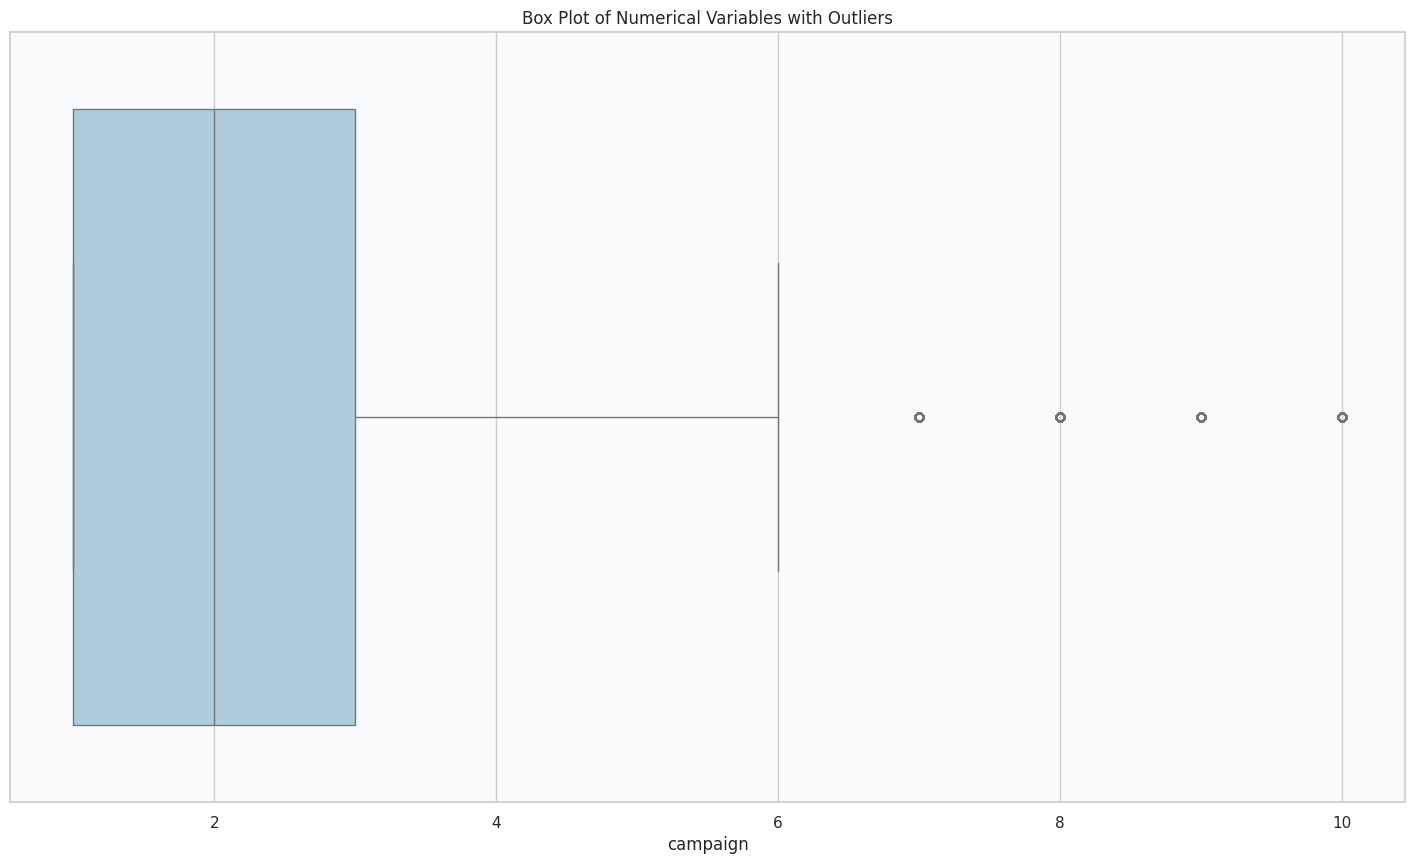

In [272]:
plot_numerical_vars_with_outliers(df2, 'campaign')


In [273]:
plot_numerical_vars_with_outliers_plotly(df2, 'campaign', '#E6ECF5')


In [274]:
num_outliers, outliers_df = detect_count_outliers(df2, 'passed_days', threshold=3)
num_outliers
outliers_df


Number of outliers in 'passed_days': 974


age            job   marital            education default housing loan  \
24108   37         admin.   married    university_degree      no     yes   no   
24264   48     management   married    university_degree      no     yes   no   
24279   42     technician   married  professional_course      no     yes   no   
24482   36  self-employed    single    university_degree      no     yes   no   
24613   32    blue-collar   married             tertiary      no      no   no   
...    ...            ...       ...                  ...     ...     ...  ...   
41162   60    blue-collar   married              primary      no     yes   no   
41163   35     technician  divorced              primary      no     yes   no   
41164   54         admin.   married  professional_course      no      no   no   
41178   62        retired   married    university_degree      no      no   no   
41182   29     unemployed    single              primary      no     yes   no   

      contact_type month day_of_week  ...  previous_outcome  \
24108    telephone   nov         wed  ...           success   
24264     cellular   nov         mon  ...           success   
24279     cellular   nov         mon  ...           success   
24482     cellular   nov         mon  ...           success   
24613     cellular   nov         mon  ...           success   
...            ...   ...         ...  ...               ...   
41162     cellular   nov         tue  ...           success   
41163     cellular   nov         tue  ...           success   
41164     cellular   nov         tue  ...           success   
41178     cellular   nov         thu  ...           success   
41182     cellular   nov         fri  ...           success   

       employment_variation_rate  consumer_price_index  \
24108                       -0.1                93.200   
24264                       -0.1                93.200   
24279                       -0.1                93.200   
24482                       -0.1                93.200   
24613                       -0.1                93.200   
...                          ...                   ...   
41162                       -1.1                94.767   
41163                       -1.1                94.767   
41164                       -1.1                94.767   
41178                       -1.1                94.767   
41182                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
24108                      -42.0     4.286               5195.8   no   
24264                      -42.0     4.191               5195.8   no   
24279                      -42.0     4.191               5195.8   no   
24482                      -42.0     4.191               5195.8   no   
24613                      -42.0     4.191               5195.8  yes   
...                          ...       ...                  ...  ...   
41162                      -50.8     1.035               4963.6   no   
41163                      -50.8     1.035               4963.6  yes   
41164                      -50.8     1.035               4963.6  yes   
41178                      -50.8     1.031               4963.6  yes   
41182                      -50.8     1.028               4963.6   no   

       has_term_deposit  age_band  new_passed_days  
24108                 0     30-40                1  
24264                 0     40-50                1  
24279                 0     40-50                1  
24482                 0     30-40                1  
24613                 1     30-40                1  
...                 ...       ...              ...  
41162                 0     50-60                1  
41163                 1     30-40                1  
41164                 1     50-60                1  
41178                 1     60-70                1  
41182                 0     20-30                1  

[974 rows x 24 columns]

In [275]:
df2 = handle_outliers_with_median(df2, 'passed_days', threshold=3)


In [276]:
num_outliers, outliers_df = detect_count_outliers(df2, 'passed_days', threshold=3)
num_outliers
outliers_df


Number of outliers in 'passed_days': 526


age            job  marital            education default housing loan  \
24397   50   entrepreneur  married    university_degree      no     yes   no   
24850   51         admin.  married    university_degree      no      no   no   
25504   35  self-employed   single    university_degree      no      no  yes   
26168   35      housemaid   single              primary     yes     yes   no   
26243   56   entrepreneur  married    university_degree      no      no   no   
...    ...            ...      ...                  ...     ...     ...  ...   
41109   34     technician  married    university_degree      no     yes   no   
41110   34     technician  married           illiterate      no     yes   no   
41117   29     technician   single  professional_course      no      no   no   
41132   41     unemployed  married             tertiary      no      no   no   
41174   62        retired  married    university_degree      no     yes   no   

      contact_type month day_of_week  ...  previous_outcome  \
24397     cellular   nov         mon  ...           success   
24850     cellular   nov         tue  ...           success   
25504     cellular   nov         wed  ...           success   
26168     cellular   nov         wed  ...           success   
26243     cellular   nov         thu  ...           success   
...            ...   ...         ...  ...               ...   
41109     cellular   nov         tue  ...           success   
41110     cellular   nov         tue  ...           success   
41117     cellular   nov         tue  ...           success   
41132     cellular   nov         thu  ...           success   
41174     cellular   nov         thu  ...           success   

       employment_variation_rate  consumer_price_index  \
24397                       -0.1                93.200   
24850                       -0.1                93.200   
25504                       -0.1                93.200   
26168                       -0.1                93.200   
26243                       -0.1                93.200   
...                          ...                   ...   
41109                       -1.1                94.767   
41110                       -1.1                94.767   
41117                       -1.1                94.767   
41132                       -1.1                94.767   
41174                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
24397                      -42.0     4.191               5195.8   no   
24850                      -42.0     4.153               5195.8   no   
25504                      -42.0     4.120               5195.8   no   
26168                      -42.0     4.120               5195.8   no   
26243                      -42.0     4.076               5195.8   no   
...                          ...       ...                  ...  ...   
41109                      -50.8     1.046               4963.6   no   
41110                      -50.8     1.046               4963.6  yes   
41117                      -50.8     1.046               4963.6  yes   
41132                      -50.8     1.041               4963.6  yes   
41174                      -50.8     1.031               4963.6  yes   

       has_term_deposit  age_band  new_passed_days  
24397                 0     40-50                1  
24850                 0     50-60                1  
25504                 0     30-40                1  
26168                 0     30-40                1  
26243                 0     50-60                1  
...                 ...       ...              ...  
41109                 0     30-40                1  
41110                 1     30-40                1  
41117                 1     20-30                1  
41132                 1     40-50                1  
41174                 1     60-70                1  

[526 rows x 24 columns]

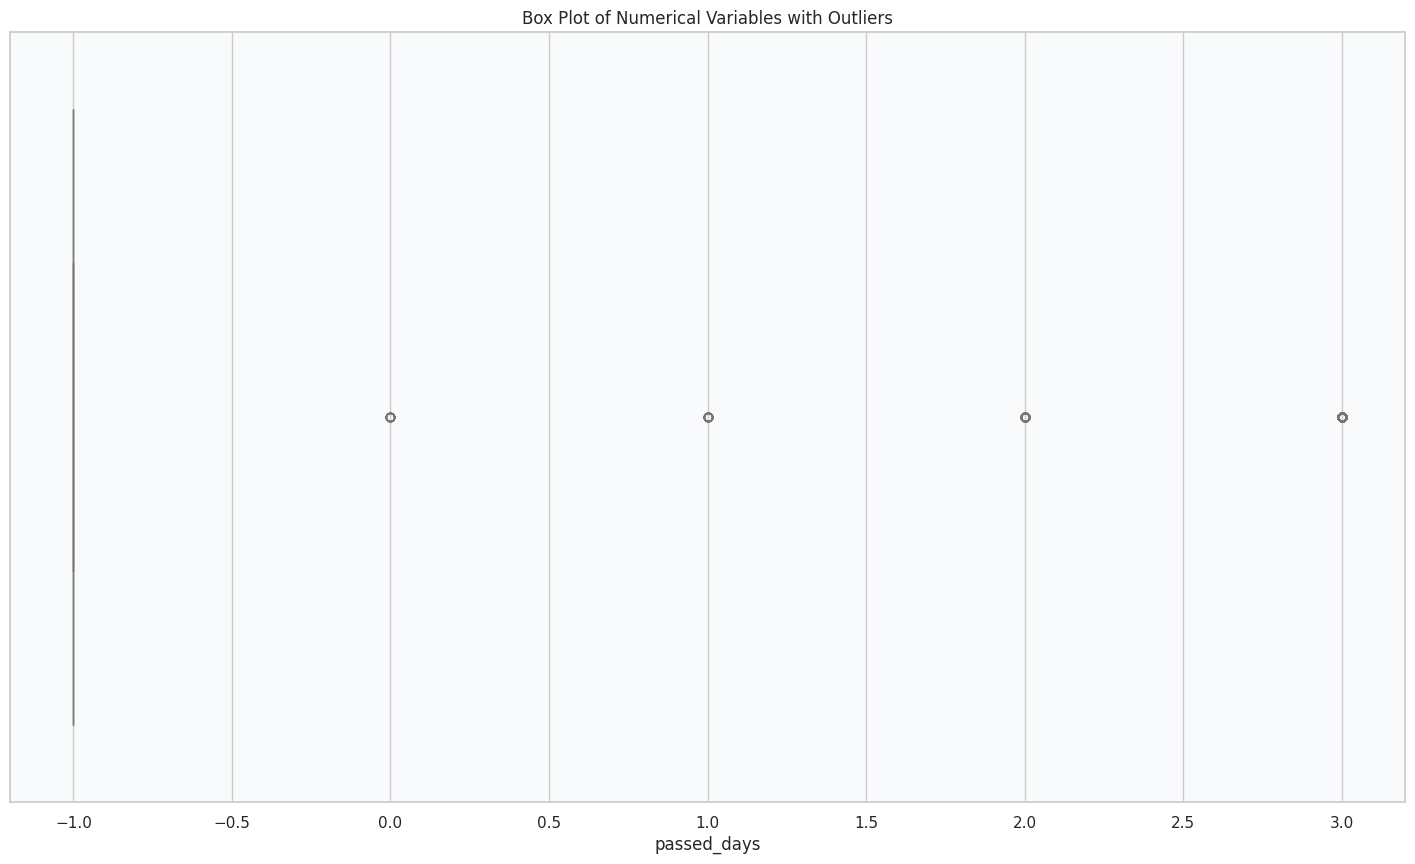

In [277]:
plot_numerical_vars_with_outliers(df2, 'passed_days')


In [278]:
plot_numerical_vars_with_outliers_plotly(df2, 'passed_days', '#E6ECF5')


In [279]:
num_outliers, outliers_df = detect_count_outliers(df2, 'previous', threshold=3)
num_outliers
outliers_df


Number of outliers in 'previous': 1064


age         job   marital          education default housing loan  \
25996   35  management   married  university_degree      no     yes  yes   
27658   50      admin.  divorced  university_degree      no     yes   no   
27778   38  technician   married  university_degree      no      no   no   
27832   30     student    single        high_school      no      no   no   
27991   29      admin.    single  university_degree      no     yes   no   
...    ...         ...       ...                ...     ...     ...  ...   
41170   40  management  divorced  university_degree      no     yes   no   
41173   62     retired   married  university_degree      no     yes   no   
41174   62     retired   married  university_degree      no     yes   no   
41175   34     student    single        high_school      no     yes   no   
41178   62     retired   married  university_degree      no      no   no   

      contact_type month day_of_week  ...  previous_outcome  \
25996    telephone   nov         wed  ...           success   
27658     cellular   nov         fri  ...           success   
27778     cellular   mar         tue  ...           failure   
27832     cellular   mar         fri  ...           failure   
27991     cellular   apr         wed  ...           success   
...            ...   ...         ...  ...               ...   
41170     cellular   nov         wed  ...           failure   
41173     cellular   nov         thu  ...           failure   
41174     cellular   nov         thu  ...           success   
41175     cellular   nov         thu  ...           failure   
41178     cellular   nov         thu  ...           success   

       employment_variation_rate  consumer_price_index  \
25996                       -0.1                93.200   
27658                       -0.1                93.200   
27778                       -1.8                92.843   
27832                       -1.8                92.843   
27991                       -1.8                93.075   
...                          ...                   ...   
41170                       -1.1                94.767   
41173                       -1.1                94.767   
41174                       -1.1                94.767   
41175                       -1.1                94.767   
41178                       -1.1                94.767   

       consumer_confidence_index euribor3m  number_of_employees    y  \
25996                      -42.0     4.120               5195.8   no   
27658                      -42.0     4.021               5195.8   no   
27778                      -50.0     1.687               5099.1  yes   
27832                      -50.0     1.640               5099.1  yes   
27991                      -47.1     1.498               5099.1   no   
...                          ...       ...                  ...  ...   
41170                      -50.8     1.030               4963.6   no   
41173                      -50.8     1.031               4963.6  yes   
41174                      -50.8     1.031               4963.6  yes   
41175                      -50.8     1.031               4963.6   no   
41178                      -50.8     1.031               4963.6  yes   

       has_term_deposit  age_band  new_passed_days  
25996                 0     30-40                1  
27658                 0     40-50                1  
27778                 1     30-40                0  
27832                 1     20-30                1  
27991                 0     20-30                1  
...                 ...       ...              ...  
41170                 0     30-40                0  
41173                 1     60-70                0  
41174                 1     60-70                1  
41175                 0     30-40                0  
41178                 1     60-70                1  

[1064 rows x 24 columns]

In [280]:
df2 = handle_outliers_with_median(df2, 'previous', threshold=3)


In [281]:
num_outliers, outliers_df = detect_count_outliers(df2, 'previous', threshold=3)
num_outliers
outliers_df


Number of outliers in 'previous': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

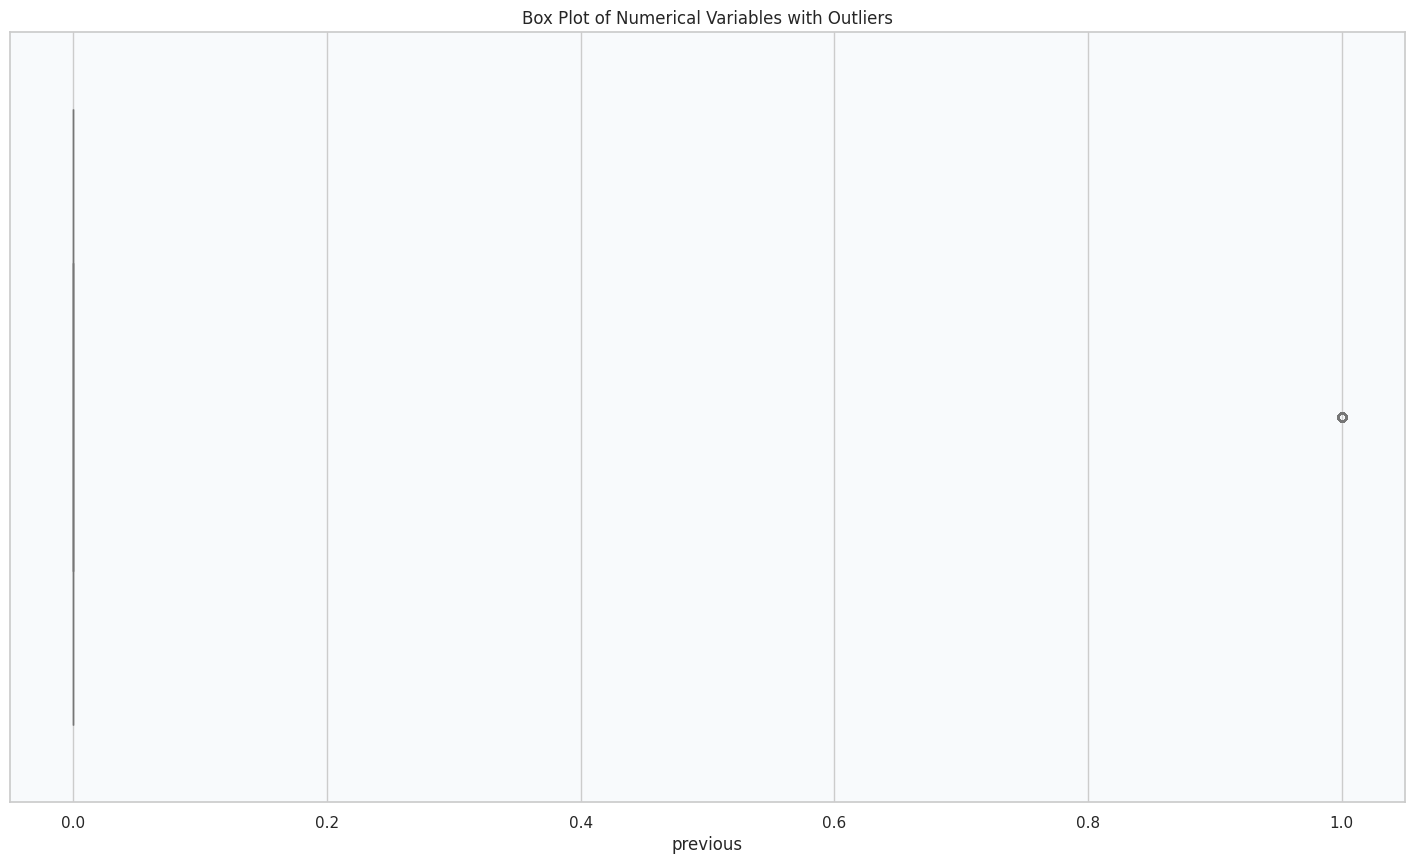

In [282]:
plot_numerical_vars_with_outliers(df2, 'previous')


In [283]:
plot_numerical_vars_with_outliers_plotly(df2, 'previous', '#E6ECF5')


In [284]:
num_outliers, outliers_df = detect_count_outliers(df2, 'employment_variation_rate', threshold=3)
num_outliers
outliers_df

Number of outliers in 'employment_variation_rate': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

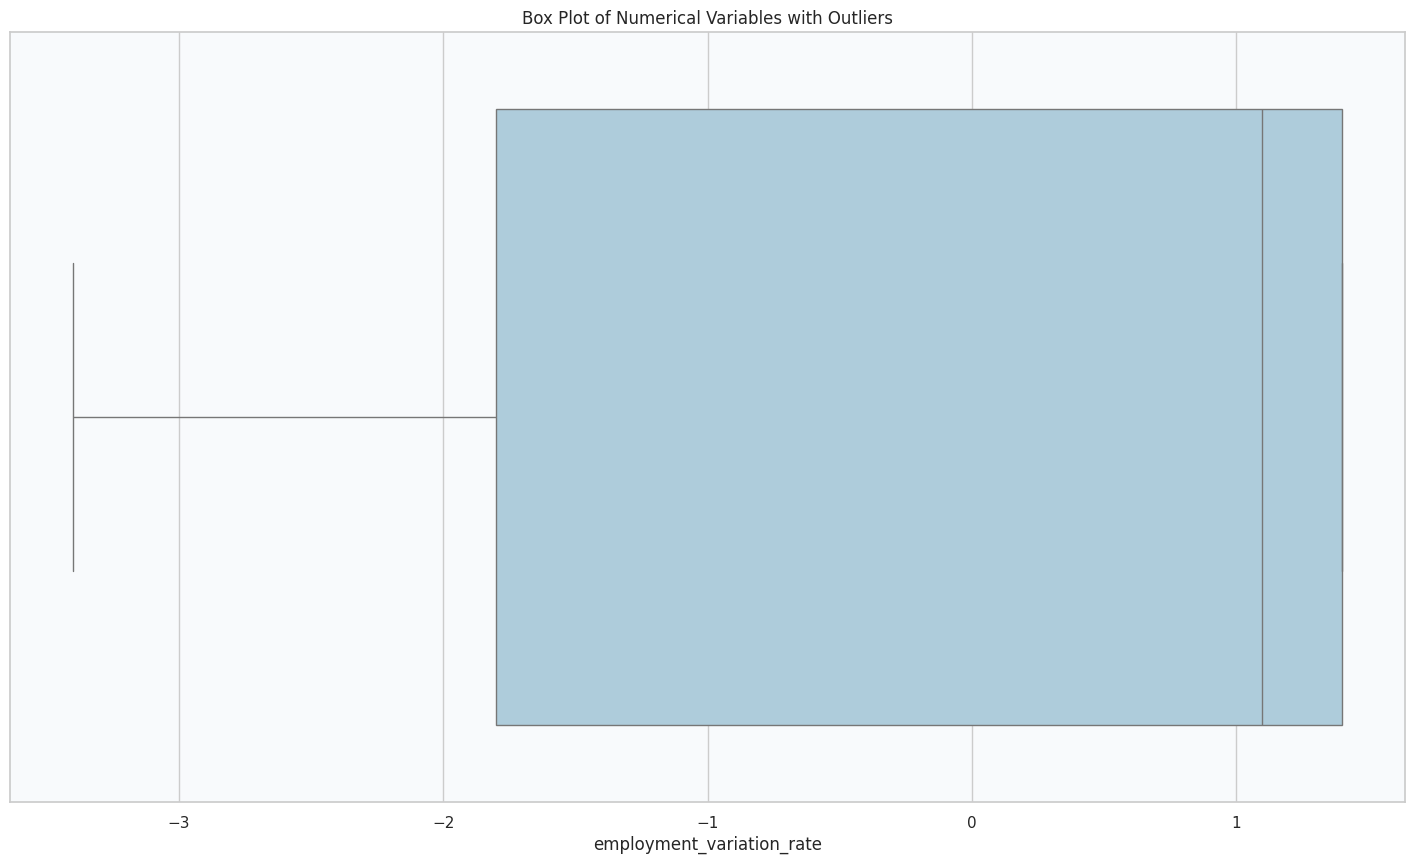

In [285]:
plot_numerical_vars_with_outliers(df2, 'employment_variation_rate')


In [286]:
plot_numerical_vars_with_outliers_plotly(df2, 'employment_variation_rate', '#E6ECF5')


In [287]:
num_outliers, outliers_df = detect_count_outliers(df2, 'consumer_price_index', threshold=3)
num_outliers
outliers_df


Number of outliers in 'consumer_price_index': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

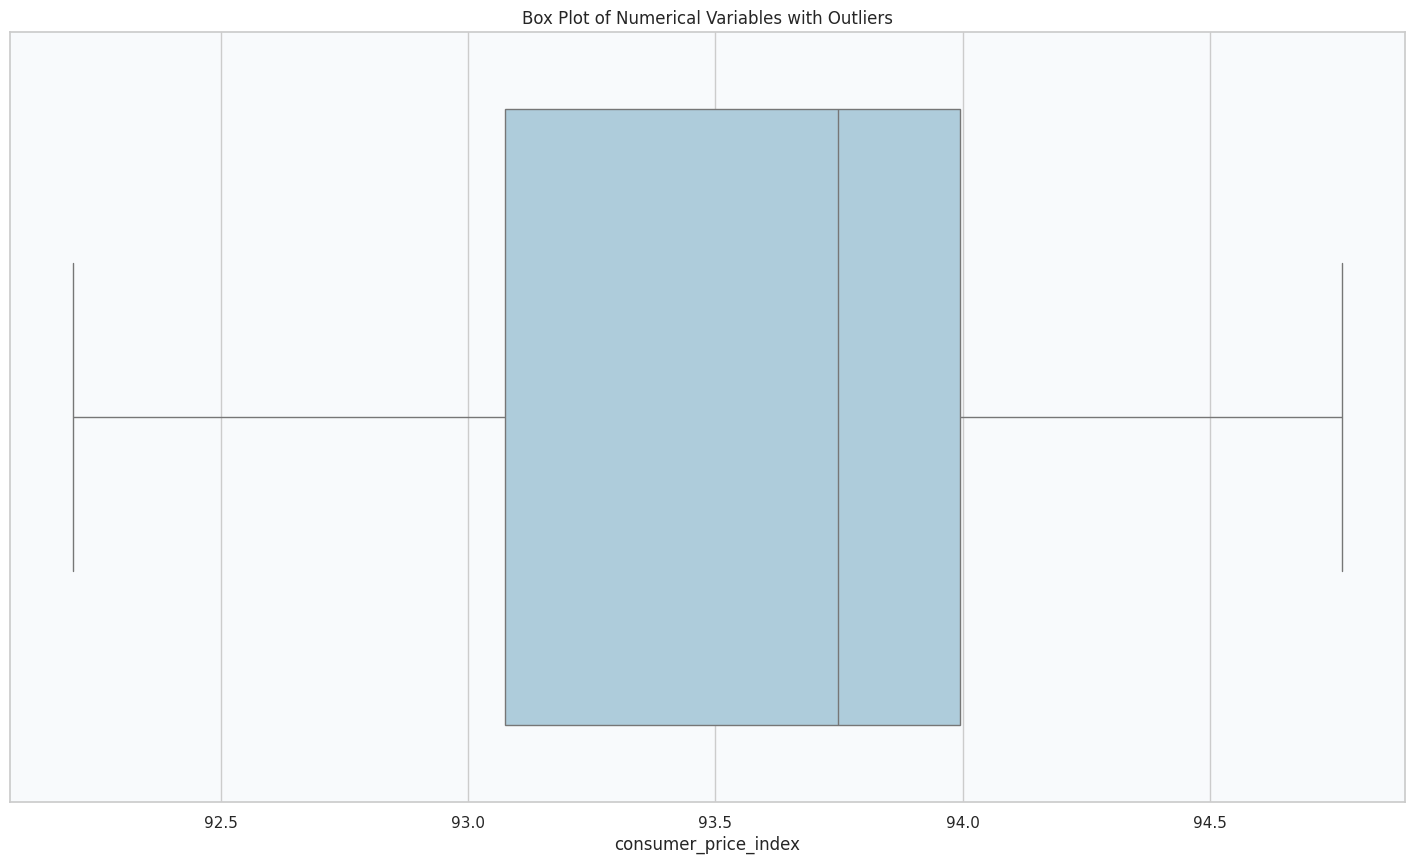

In [288]:
plot_numerical_vars_with_outliers(df2, 'consumer_price_index')


In [289]:
plot_numerical_vars_with_outliers_plotly(df2, 'consumer_price_index', '#E6ECF5')


In [290]:
num_outliers, outliers_df = detect_count_outliers(df2, 'consumer_confidence_index', threshold=3)
num_outliers
outliers_df


Number of outliers in 'consumer_confidence_index': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

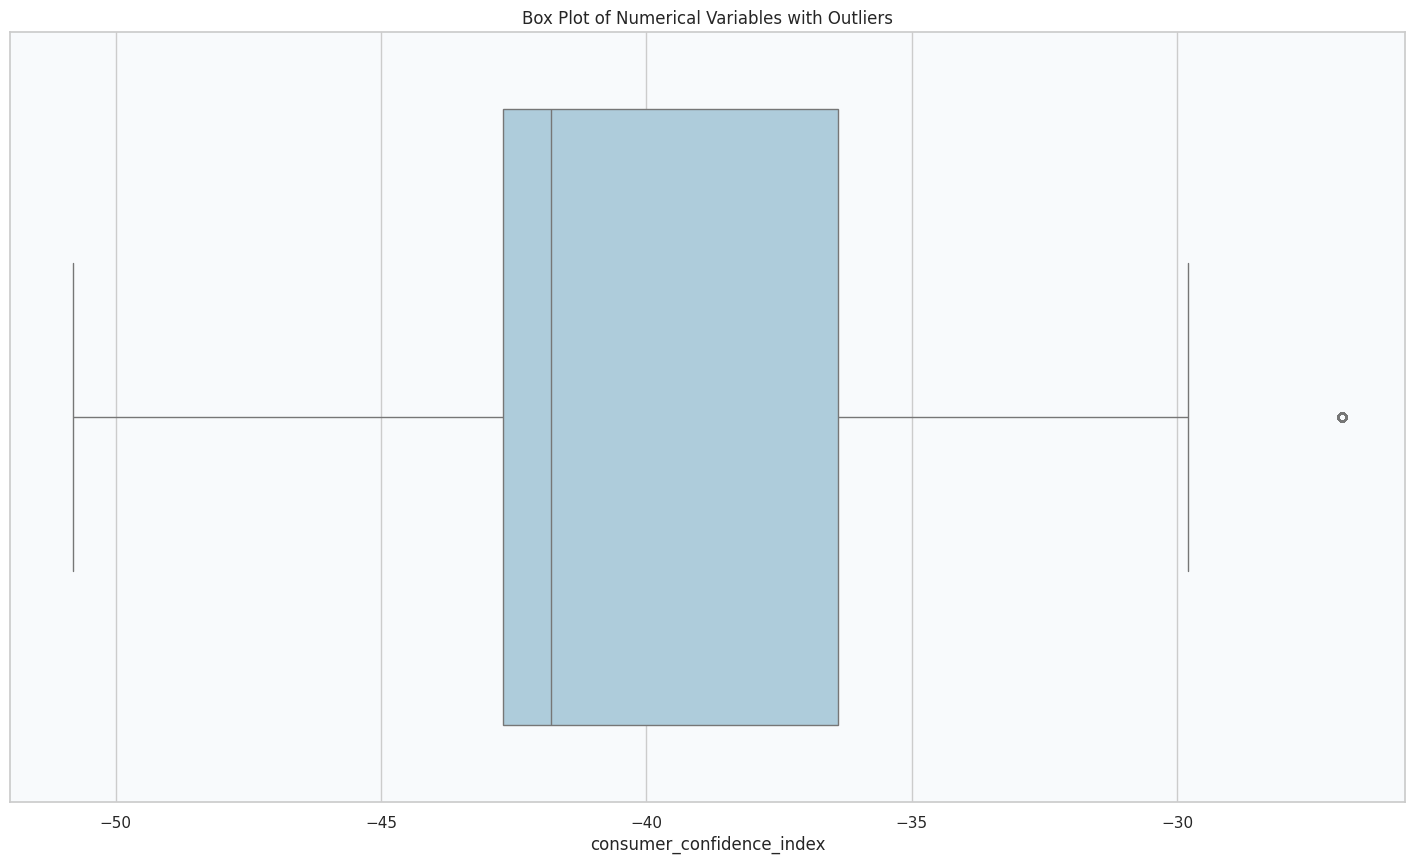

In [291]:
plot_numerical_vars_with_outliers(df2, 'consumer_confidence_index')


In [292]:
plot_numerical_vars_with_outliers_plotly(df2, 'consumer_confidence_index', '#E6ECF5')


In [293]:
num_outliers, outliers_df = detect_count_outliers(df2, 'euribor3m', threshold=3)
num_outliers
outliers_df


Number of outliers in 'euribor3m': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

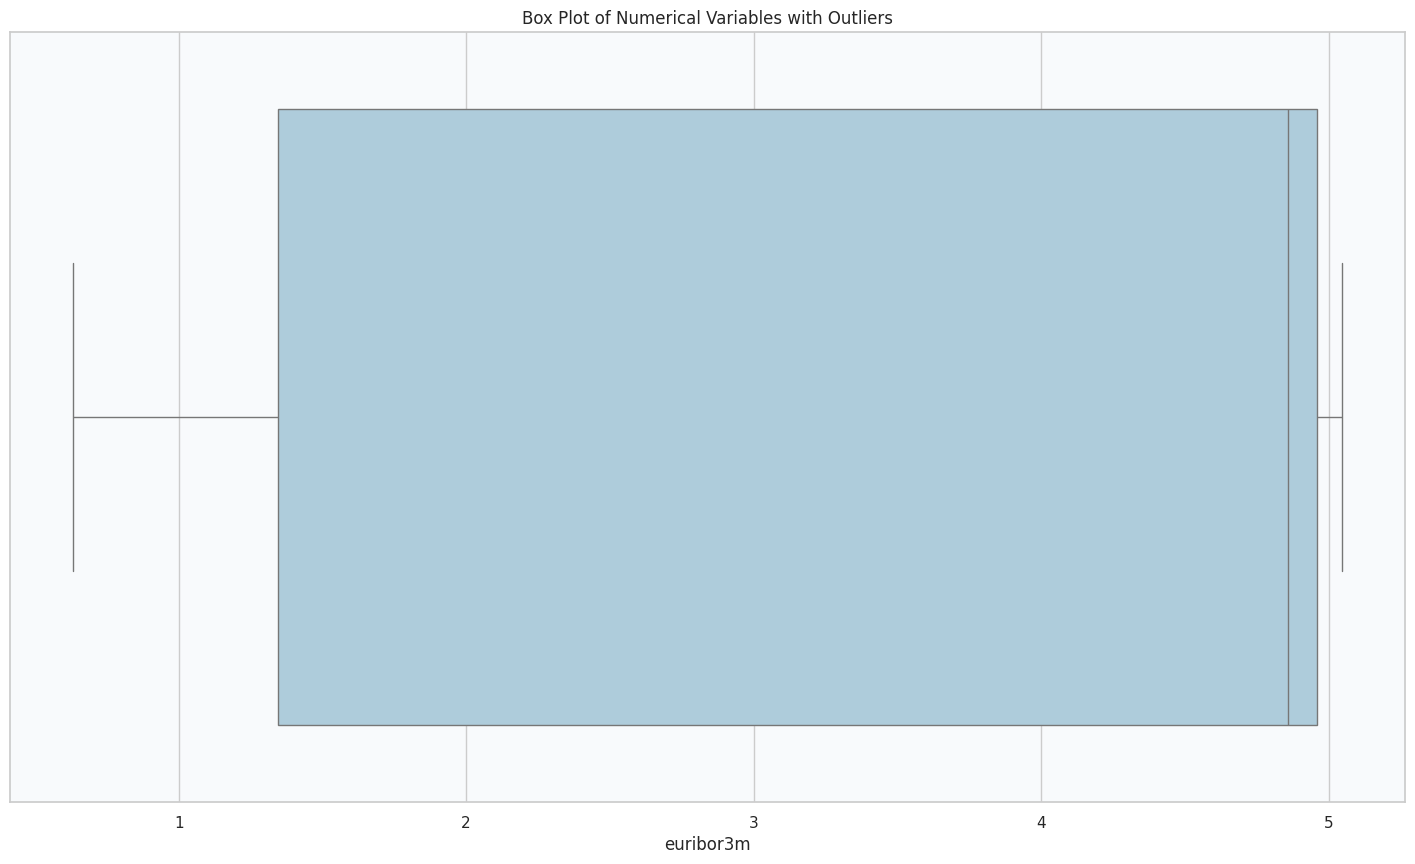

In [294]:
plot_numerical_vars_with_outliers(df2, 'euribor3m')


In [295]:
plot_numerical_vars_with_outliers_plotly(df2, 'euribor3m', '#E6ECF5')


In [296]:
num_outliers, outliers_df = detect_count_outliers(df2, 'number_of_employees', threshold=3)
num_outliers
outliers_df


Number of outliers in 'number_of_employees': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

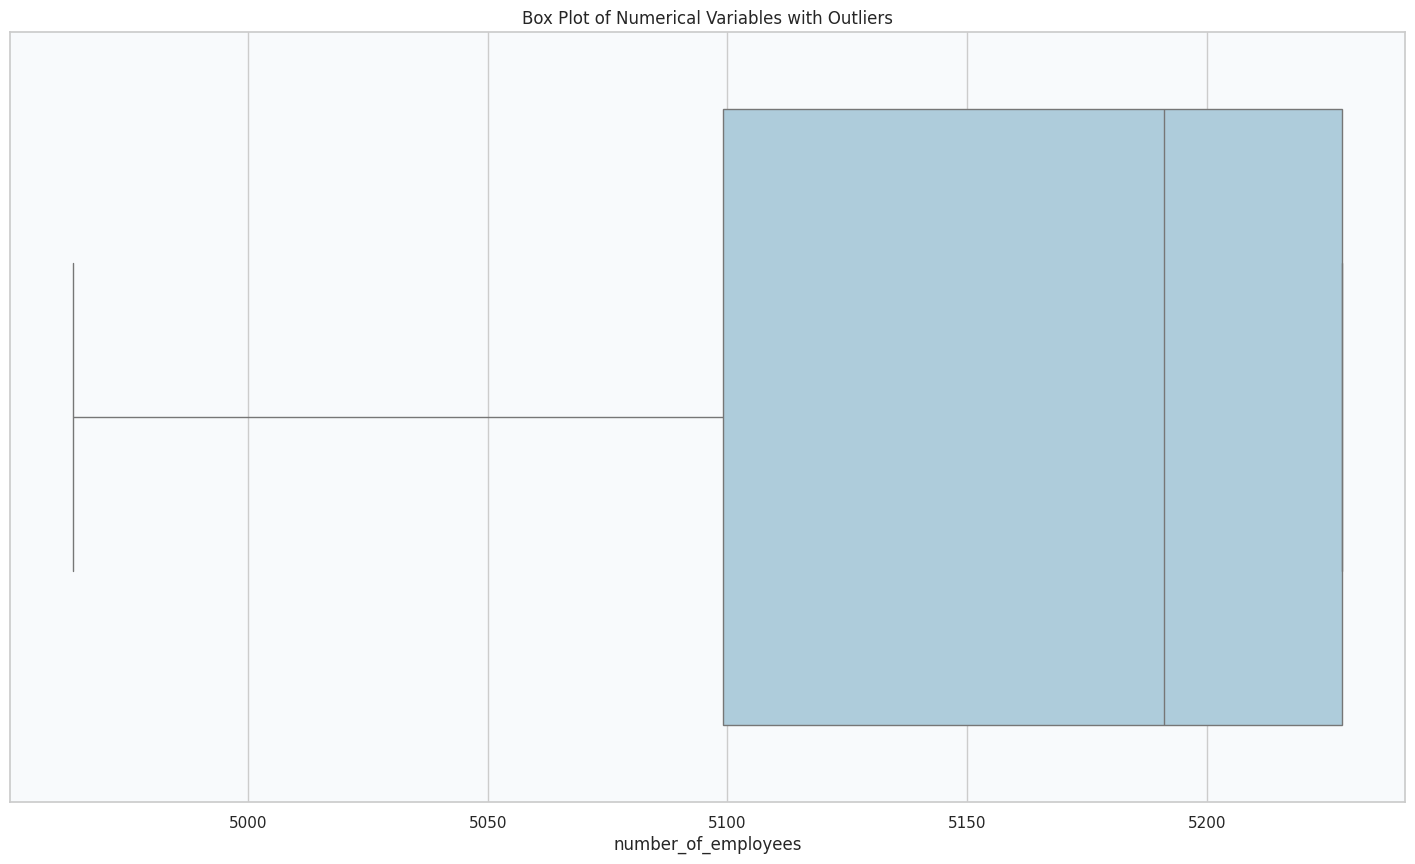

In [297]:
plot_numerical_vars_with_outliers(df2, 'number_of_employees')


In [298]:
plot_numerical_vars_with_outliers_plotly(df2, 'number_of_employees', '#E6ECF5')


In [299]:
num_outliers, outliers_df = detect_count_outliers(df2, 'has_term_deposit', threshold=3)
num_outliers
outliers_df


Number of outliers in 'has_term_deposit': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit, age_band, new_passed_days]
Index: []

[0 rows x 24 columns]

In [300]:
# See the correlations between categorical variables
def plot_categorical_count(df, x_column, hue_column, title, palette='Paired'):

    plt.figure(figsize=(20, 10))
    sns.countplot(x=x_column, hue=hue_column, data=df, palette=palette)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=hue_column, loc='upper right')

    plt.show()


In [301]:
# See the correlations between categorical variables (Using Plotly)
def plotly_categorical_count(df, x_column, hue_column, title, color_discrete_sequence=None):
    # Create a dataframe with counts and percentages
    count_df = df.groupby([x_column, hue_column]).size().reset_index(name='count')
    total_counts = count_df.groupby(x_column)['count'].transform('sum')
    count_df['percentage'] = (count_df['count'] / total_counts) * 100

    # Create the bar plot
    fig = px.bar(count_df, x=x_column, y='count', color=hue_column,
                 title=title, color_discrete_sequence=color_discrete_sequence)

    # Add borders and percentage labels
    for bar in fig.data:
        bar.update(marker_line_color='black', marker_line_width=1, hoverinfo='y+text',
                   text=count_df[count_df[hue_column] == bar.name]['percentage'].round(2).astype(str) + '%')

    fig.update_layout(
        xaxis_title=x_column,
        yaxis_title='Count',
        legend_title=hue_column,
        barmode='group',
        bargap=0.1,
        showlegend=True,
        legend=dict(x=1.02, y=1)
    )

    fig.show()


In [302]:
df2.groupby(['job','y'])['y'].count()


job            y  
admin.         no     9090
               yes    1355
blue-collar    no     8643
               yes     641
entrepreneur   no     1356
               yes     127
housemaid      no      983
               yes     110
management     no     2625
               yes     334
retired        no     1316
               yes     438
self-employed  no     1296
               yes     156
services       no     3671
               yes     325
student        no      624
               yes     279
technician     no     6029
               yes     730
unemployed     no      905
               yes     145
Name: y, dtype: int64

In [303]:
pd.crosstab(df2.y, df2.job, margins=True).style.background_gradient(cmap='summer_r')


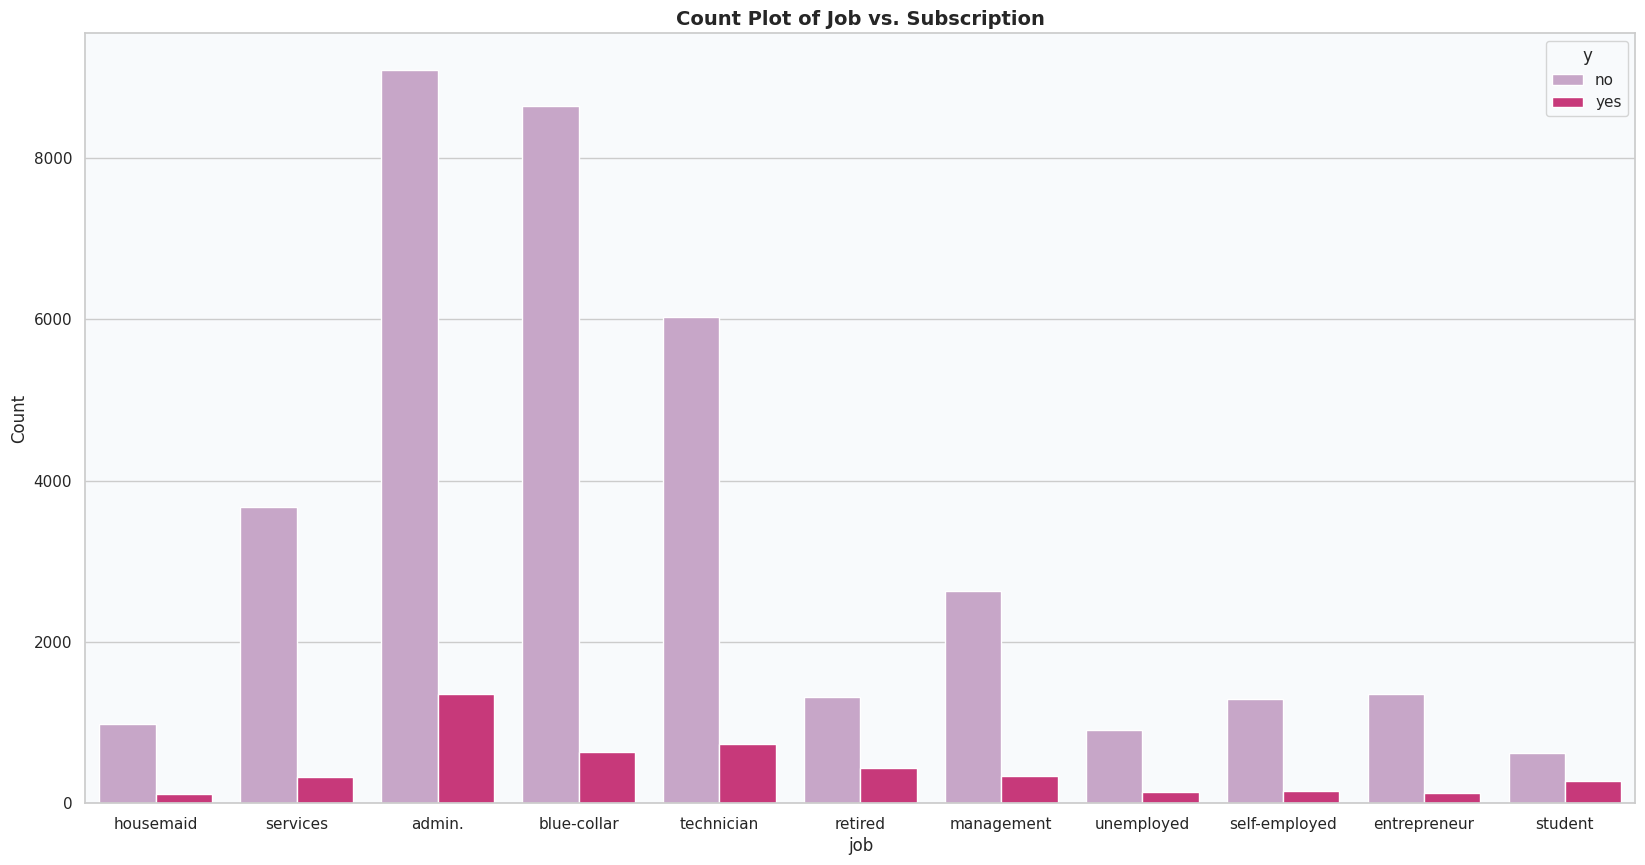

In [304]:
plot_categorical_count(df2[['job', 'y']], x_column='job', hue_column='y', title='Count Plot of Job vs. Subscription', palette='PuRd')


In [305]:
# Plotly
plotly_categorical_count(df2[['job', 'y']], x_column='job', hue_column='y', title='Count Plot of Job vs. Subscription')


In [306]:
df2.groupby(['marital','y'])['y'].count()


marital   y  
divorced  no      4162
          yes      480
married   no     22420
          yes     2538
single    no      9956
          yes     1622
Name: y, dtype: int64

In [307]:
pd.crosstab(df2.y, df2.marital, margins=True).style.background_gradient(cmap='summer_r')


In [308]:
pd.crosstab([df2.job, df2.y], df.marital, margins=True).style.background_gradient(cmap='summer_r')


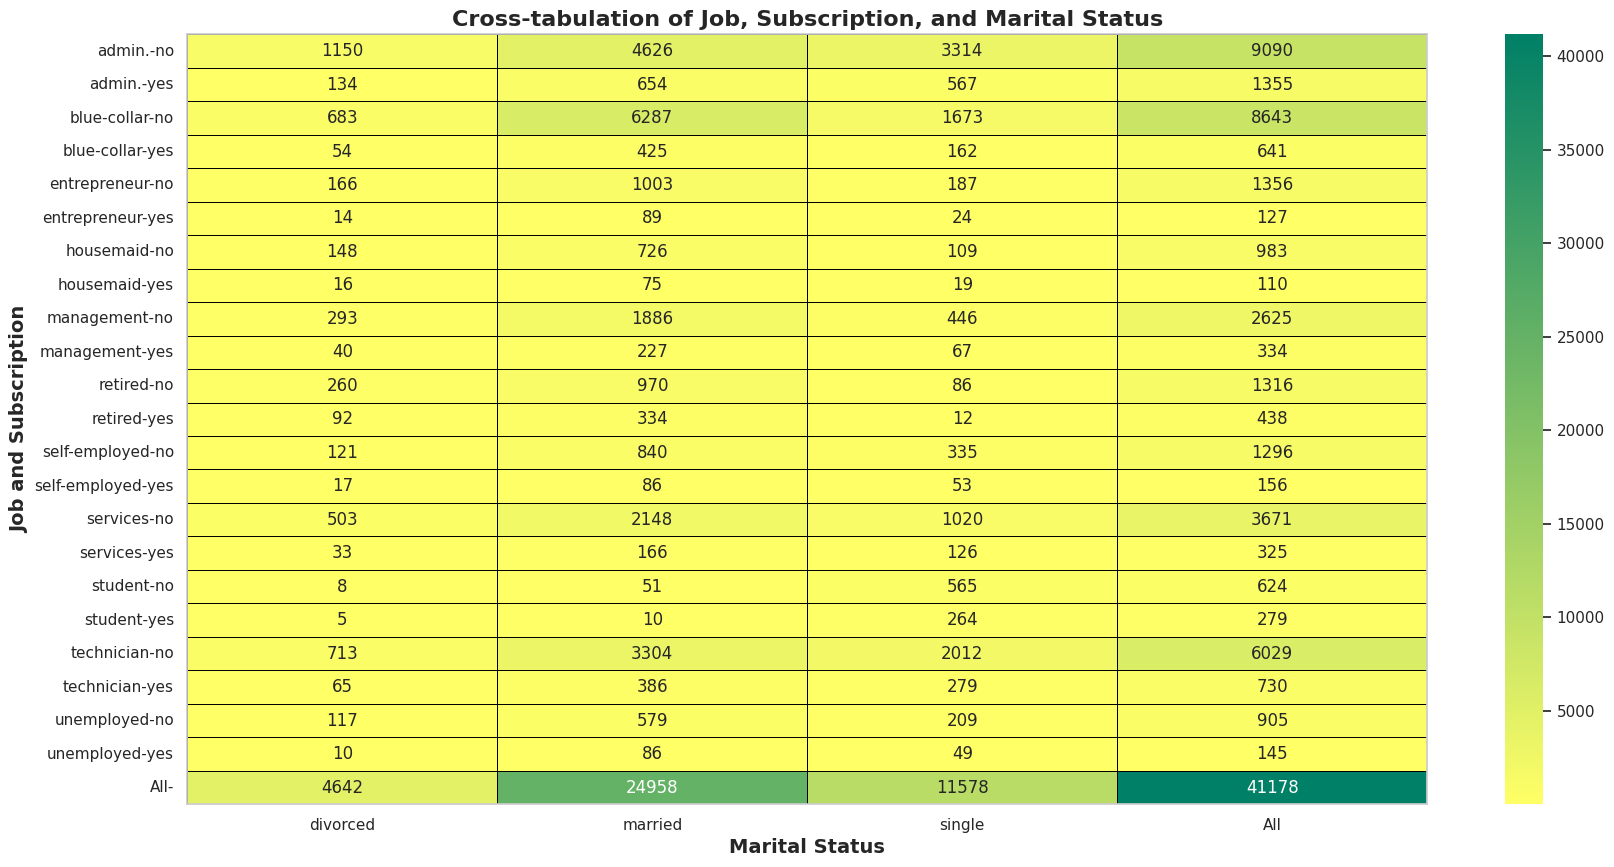

In [309]:
# Plot the correlation between job, subscription and marital status

cross_tab_df = pd.crosstab([df2['job'], df2['y']], df2['marital'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Job, Subscription, and Marital Status', fontweight='bold', fontsize=16)
plt.xlabel('Marital Status', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)
plt.show()


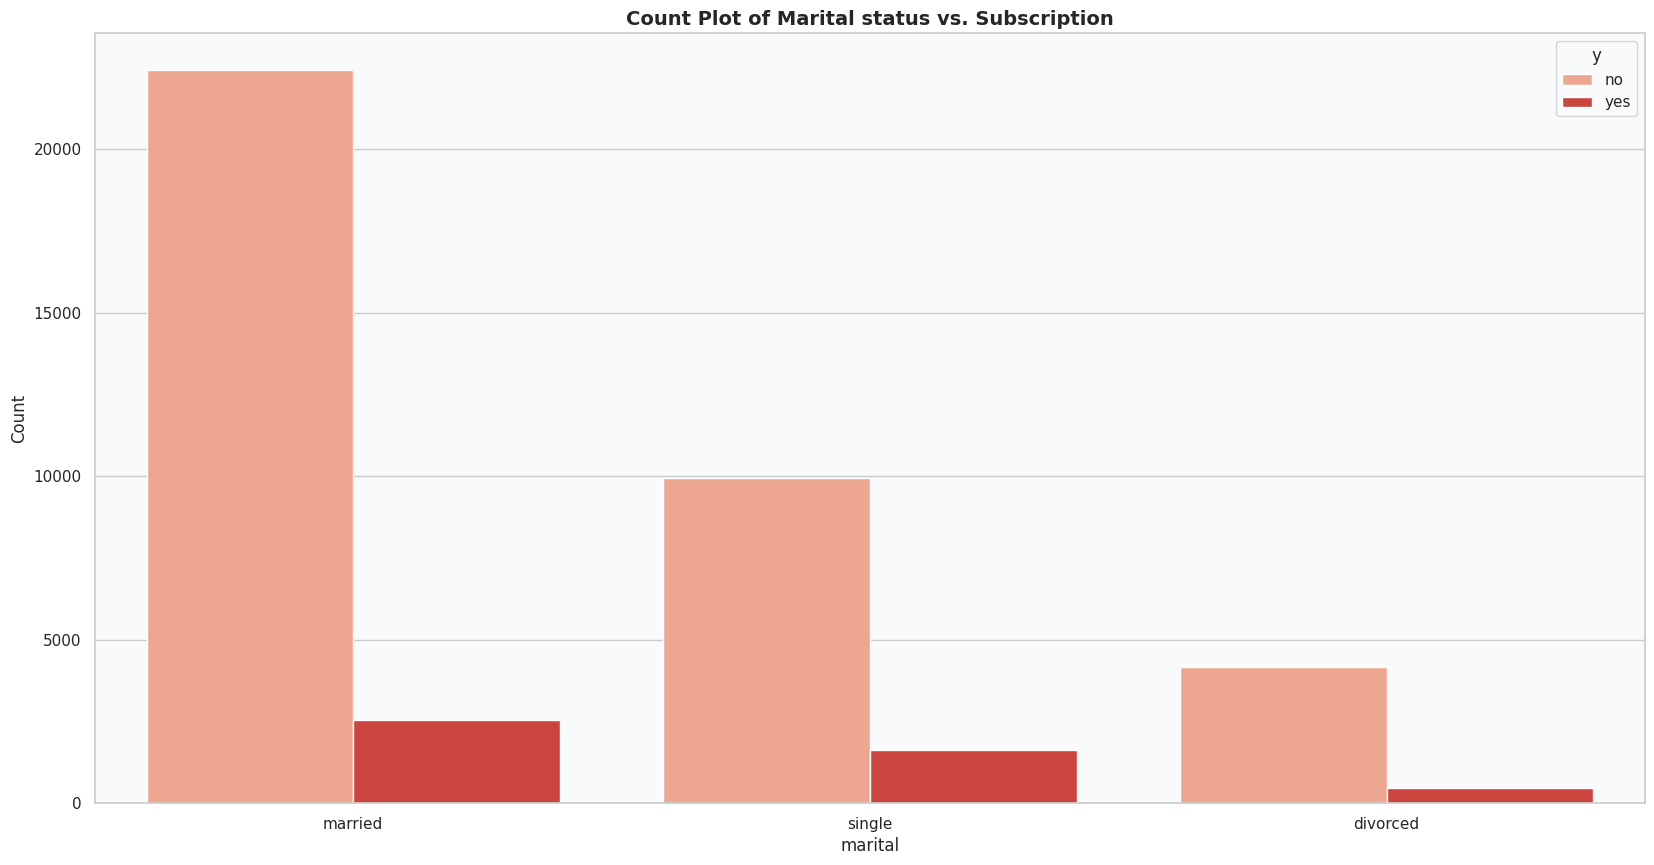

In [310]:
plot_categorical_count(df2[['marital', 'y']], x_column='marital', hue_column='y', title='Count Plot of Marital status vs. Subscription', palette='Reds')


In [311]:
# Plotly
plotly_categorical_count(df2[['marital', 'y']], x_column='marital', hue_column='y', title='Count Plot of Marital status vs. Subscription')


In [312]:
df2.groupby(['education','y'])['y'].count()


education            y  
high_school          no      8709
                     yes     1067
illiterate           no       219
                     yes       38
primary              no      3952
                     yes      465
professional_course  no      4844
                     yes      630
secondary            no      2310
                     yes      225
tertiary             no      5771
                     yes      504
university_degree    no     10733
                     yes     1711
Name: y, dtype: int64

In [313]:
pd.crosstab(df2.y, df2.education, margins=True).style.background_gradient(cmap='summer_r')


In [314]:
pd.crosstab([df2.job, df2.y], df2.education, margins=True).style.background_gradient(cmap='summer_r')


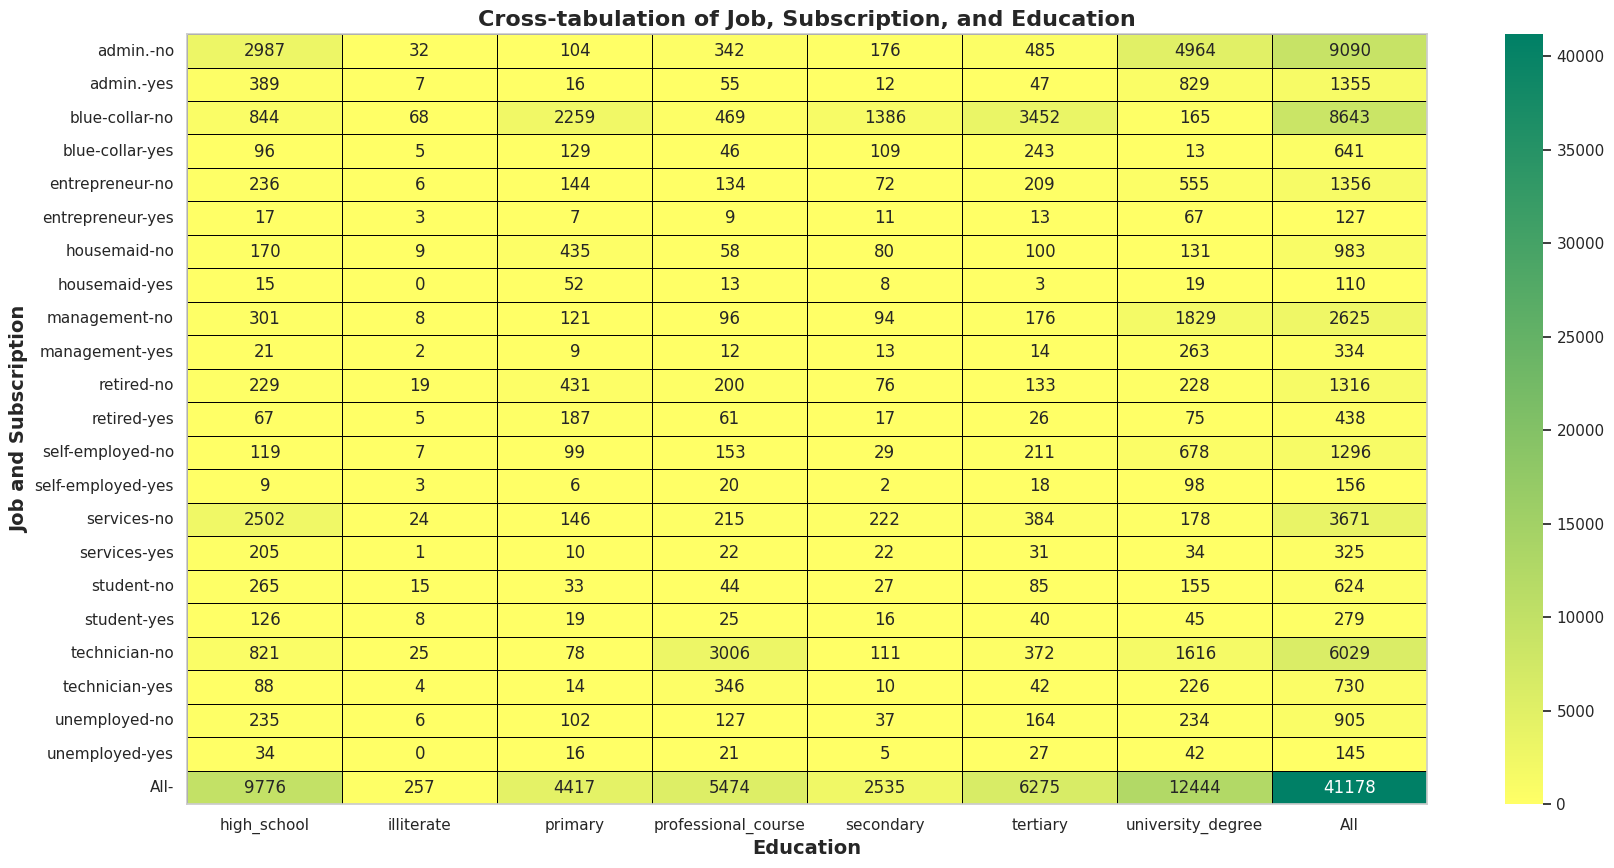

In [315]:
# Plot the correlation between job, subscription and education

cross_tab_df = pd.crosstab([df2['job'], df2['y']], df2['education'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Job, Subscription, and Education', fontweight='bold', fontsize=16)
plt.xlabel('Education', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)
plt.show()


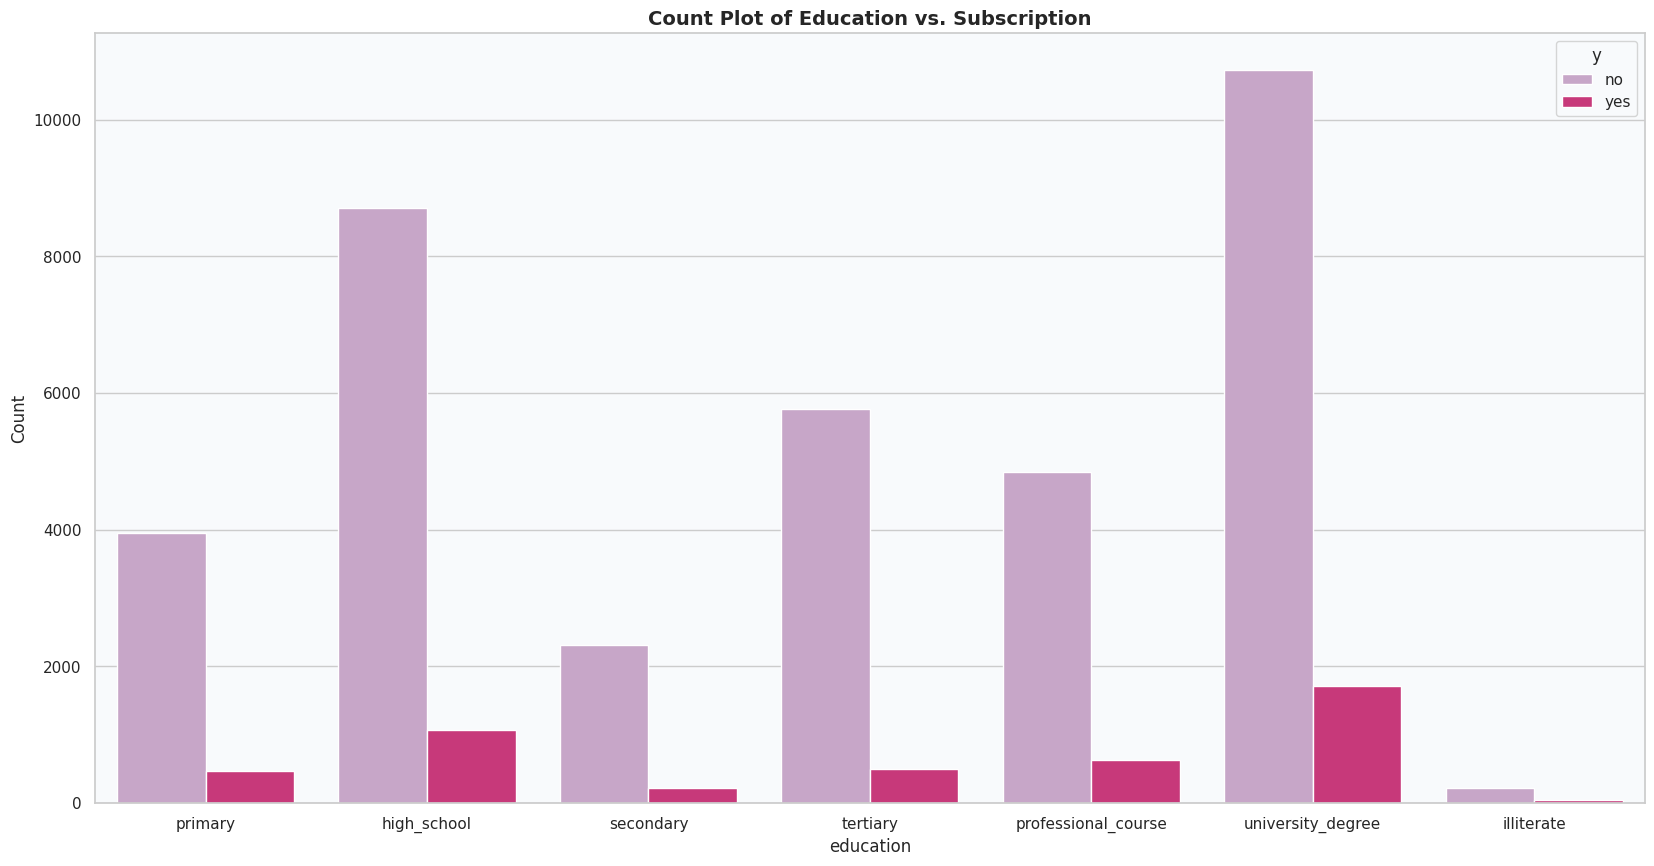

In [316]:
plot_categorical_count(df2[['education', 'y']], x_column='education', hue_column='y', title='Count Plot of Education vs. Subscription', palette='PuRd')


In [317]:
# Plotly
plotly_categorical_count(df2[['education', 'y']], x_column='education', hue_column='y', title='Count Plot of Education vs. Subscription')


In [318]:
df2.groupby(['default','y'])['y'].count()


default  y  
no       no     32413
         yes     4433
yes      no      4125
         yes      207
Name: y, dtype: int64

In [319]:
pd.crosstab(df2.y, df2.default, margins=True).style.background_gradient(cmap='summer_r')


In [320]:
pd.crosstab([df2.age, df2.y], df2.default, margins=True).style.background_gradient(cmap='summer_r')


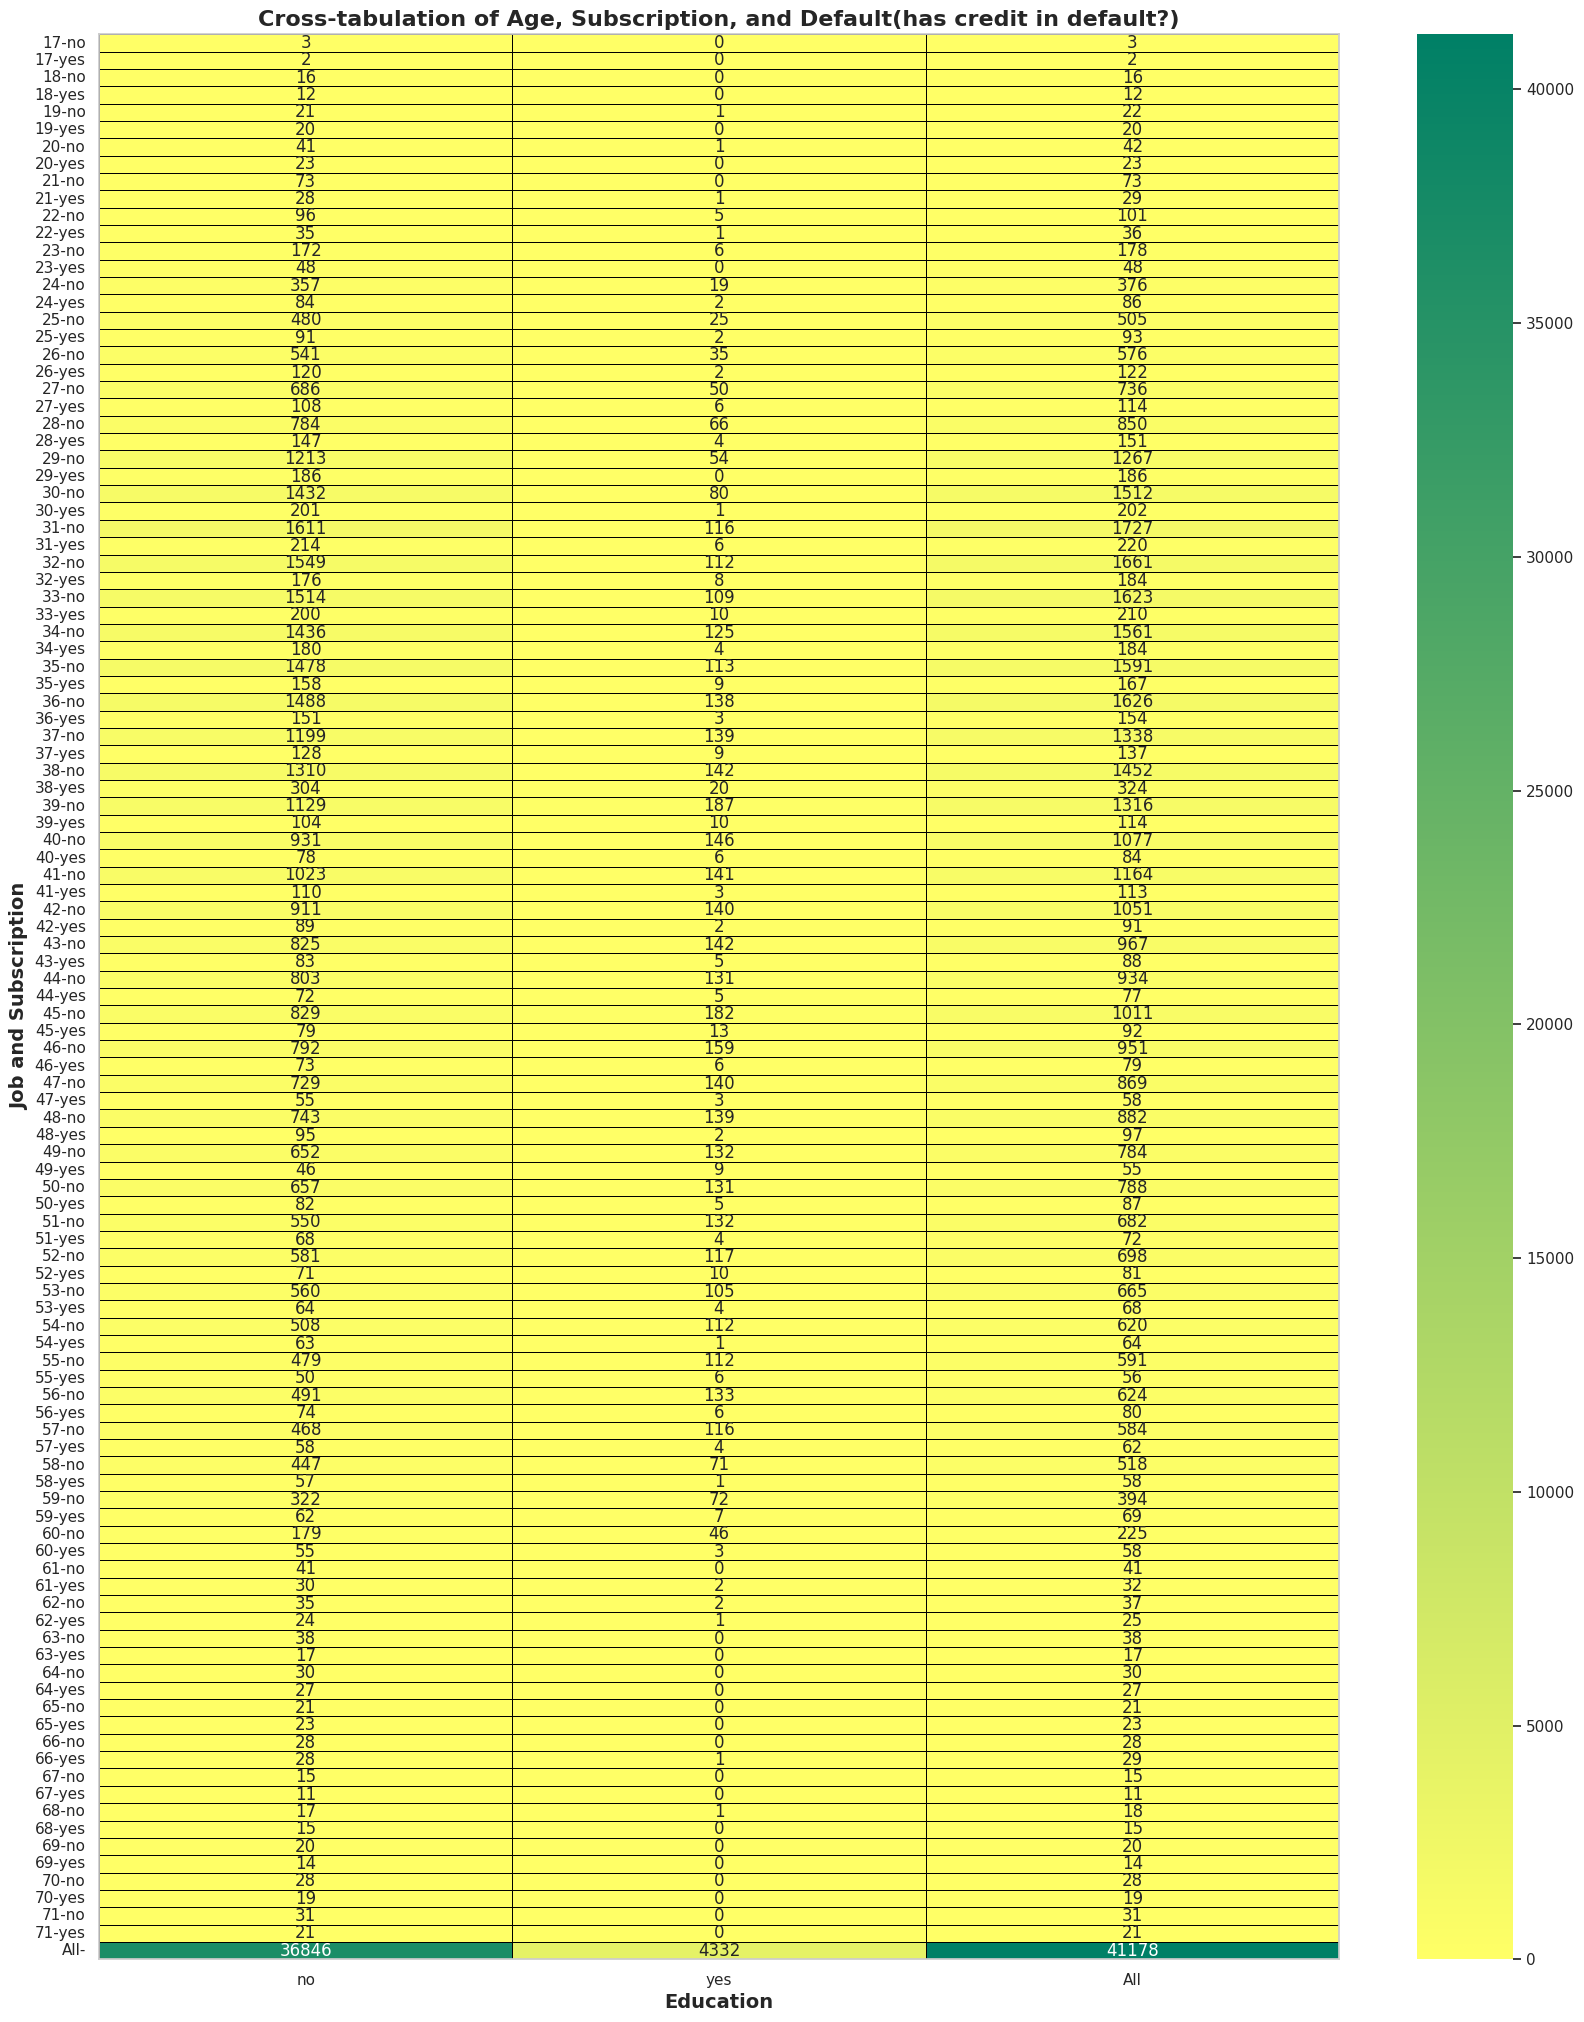

In [322]:
# Plot the correlation between age, subscription and default

cross_tab_df = pd.crosstab([df2['age'], df2['y']], df2['default'], margins=True)

plt.figure(figsize=(20, 25))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Age, Subscription, and Default(has credit in default?)', fontweight='bold', fontsize=16)
plt.xlabel('Education', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)
plt.show()


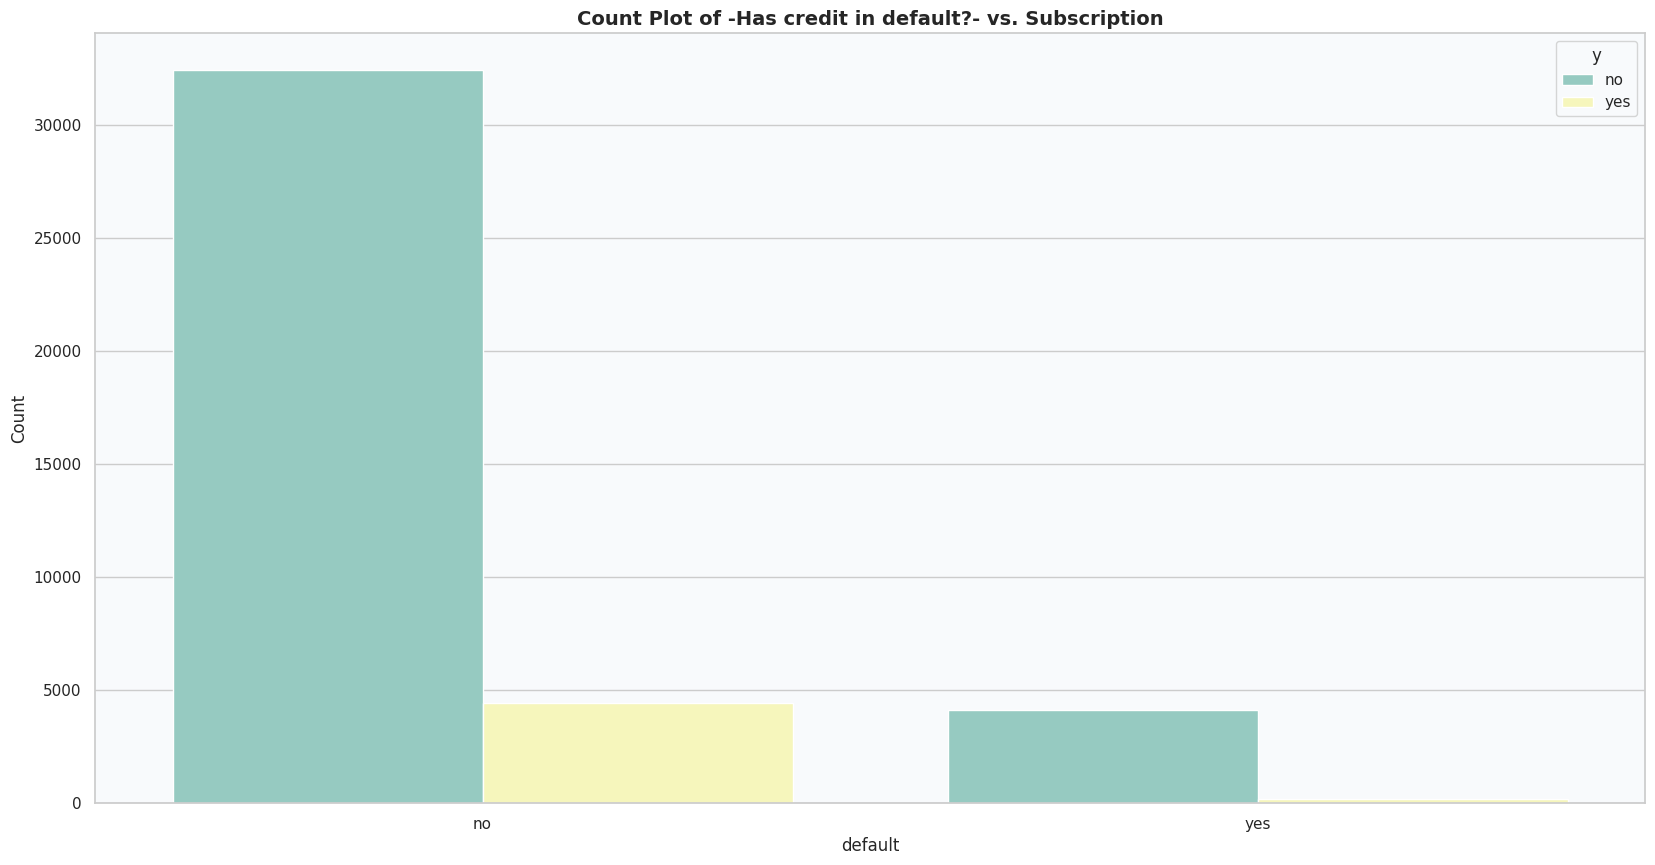

In [323]:
plot_categorical_count(df2[['default', 'y']], x_column='default', hue_column='y', title='Count Plot of -Has credit in default?- vs. Subscription', palette='Set3')


In [324]:
# Plotly
plotly_categorical_count(df2[['default', 'y']], x_column='default', hue_column='y', title='Count Plot of - Has credit in default? - vs. Subscription')


In [325]:
df2.groupby(['housing','y'])['y'].count()


housing  y  
no       no     17039
         yes     2086
yes      no     19499
         yes     2554
Name: y, dtype: int64

In [326]:
pd.crosstab(df2.y, df2.housing, margins=True).style.background_gradient(cmap='summer_r')


In [327]:
pd.crosstab([df2.marital, df2.y], df2.housing, margins=True).style.background_gradient(cmap='summer_r')


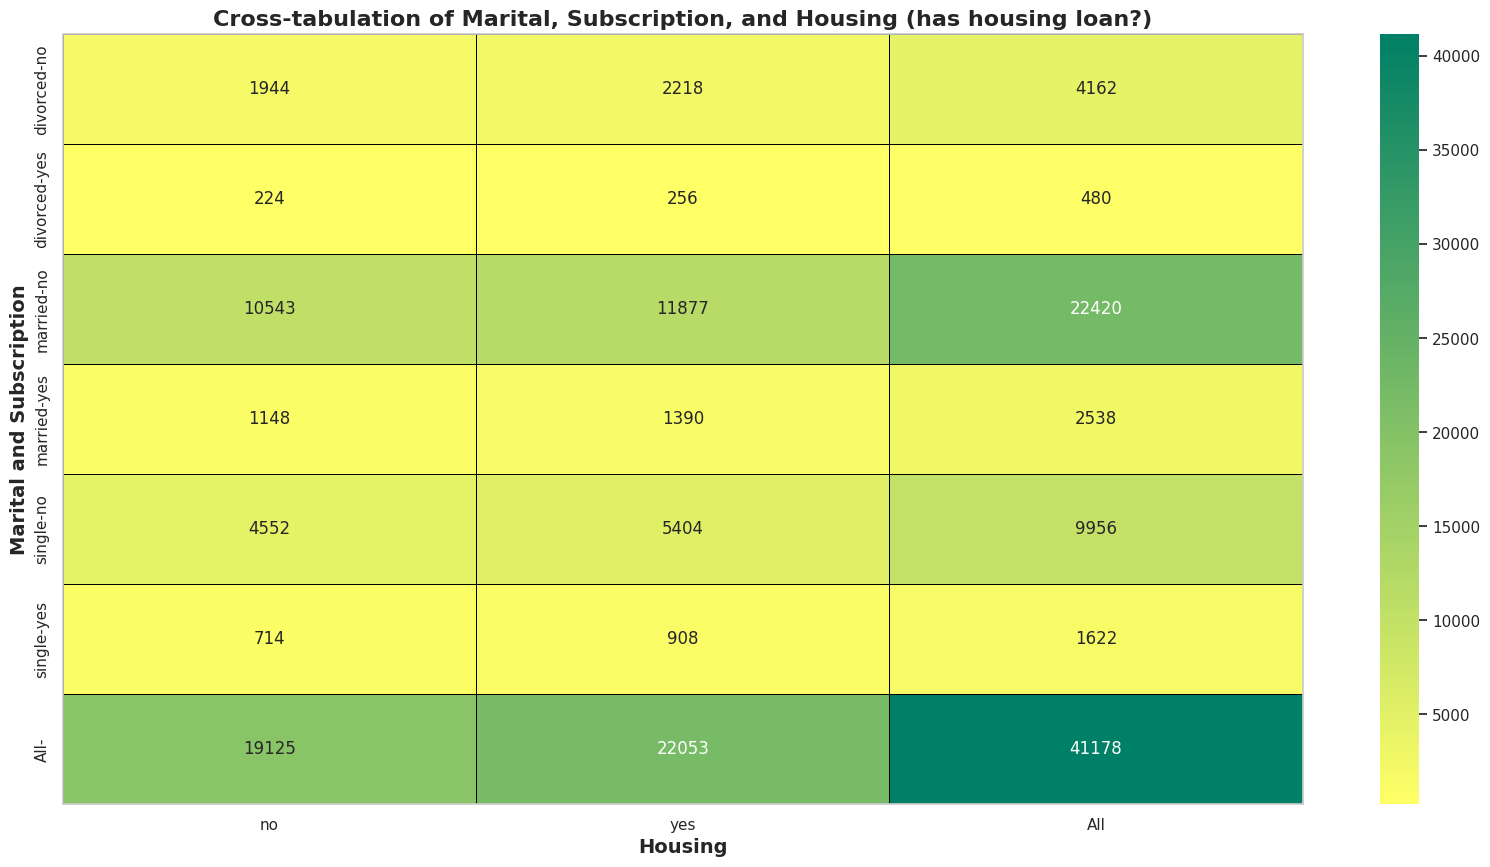

In [328]:
# Plot the correlation between marital, subscription and housing

cross_tab_df = pd.crosstab([df2['marital'], df2['y']], df2['housing'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Marital, Subscription, and Housing (has housing loan?)', fontweight='bold', fontsize=16)
plt.xlabel('Housing', fontweight='bold', fontsize=14)
plt.ylabel('Marital and Subscription', fontweight='bold', fontsize=14)
plt.show()


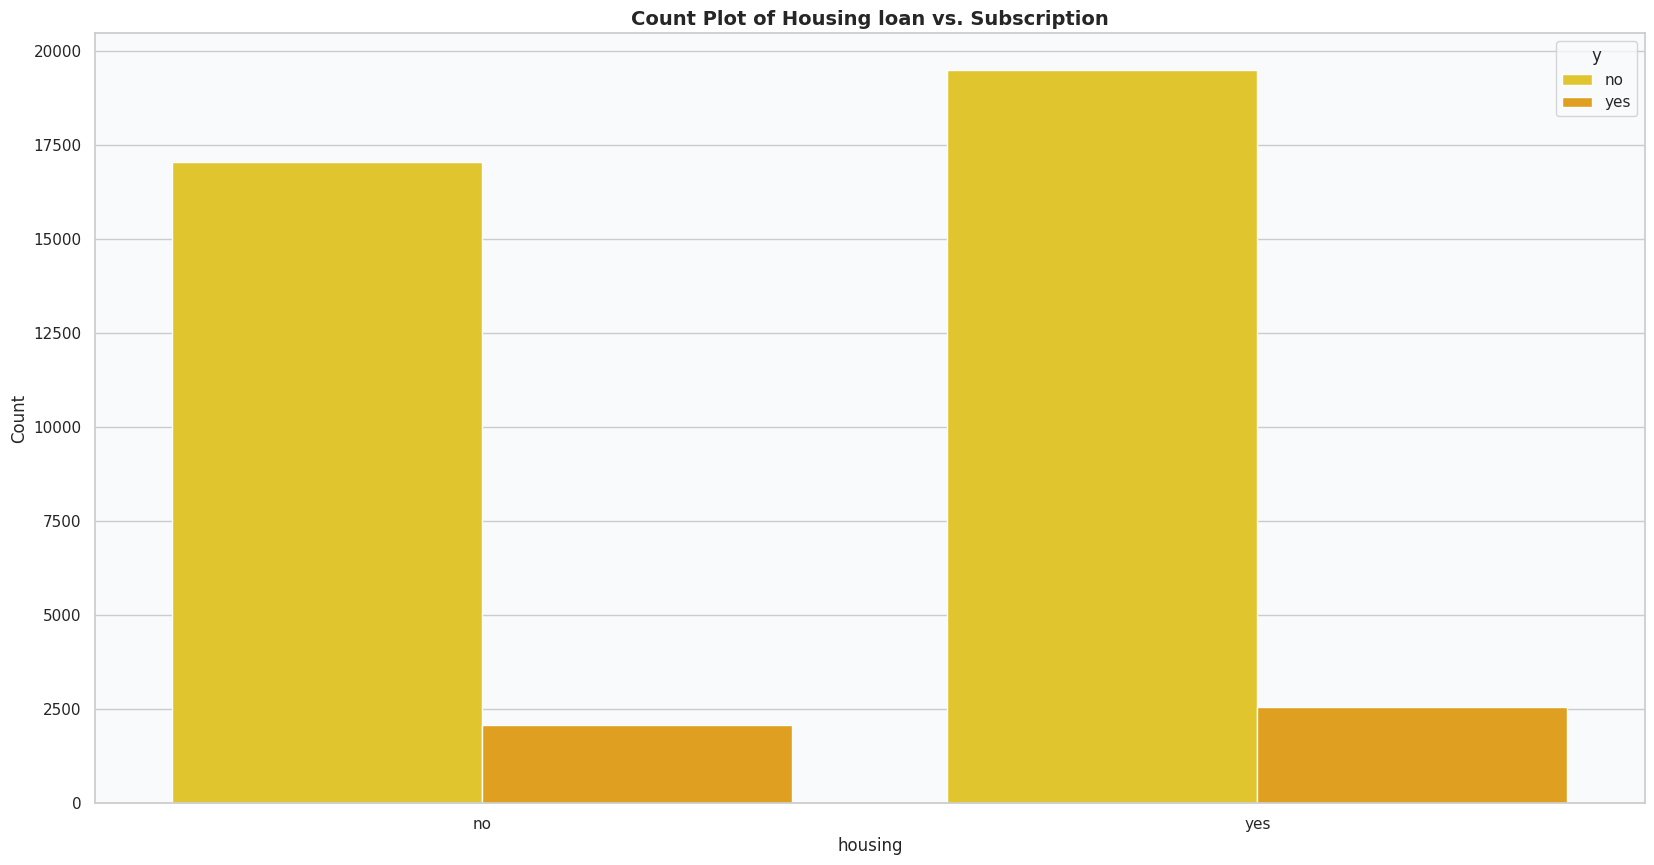

In [329]:
plot_categorical_count(df2[['housing', 'y']], x_column='housing', hue_column='y', title='Count Plot of Housing loan vs. Subscription', palette='Wistia')


In [330]:
# Plotly
plotly_categorical_count(df2[['housing', 'y']], x_column='housing', hue_column='y', title='Count Plot of Housing loan vs. Subscription')


In [331]:
df2.groupby(['loan','y'])['y'].count()


loan  y  
no    no     30541
      yes     3910
yes   no      5997
      yes      730
Name: y, dtype: int64

In [332]:
pd.crosstab(df2.y, df2.loan, margins=True).style.background_gradient(cmap='summer_r')


In [333]:
pd.crosstab([df2.loan, df2.y], df2.marital, margins=True).style.background_gradient(cmap='summer_r')


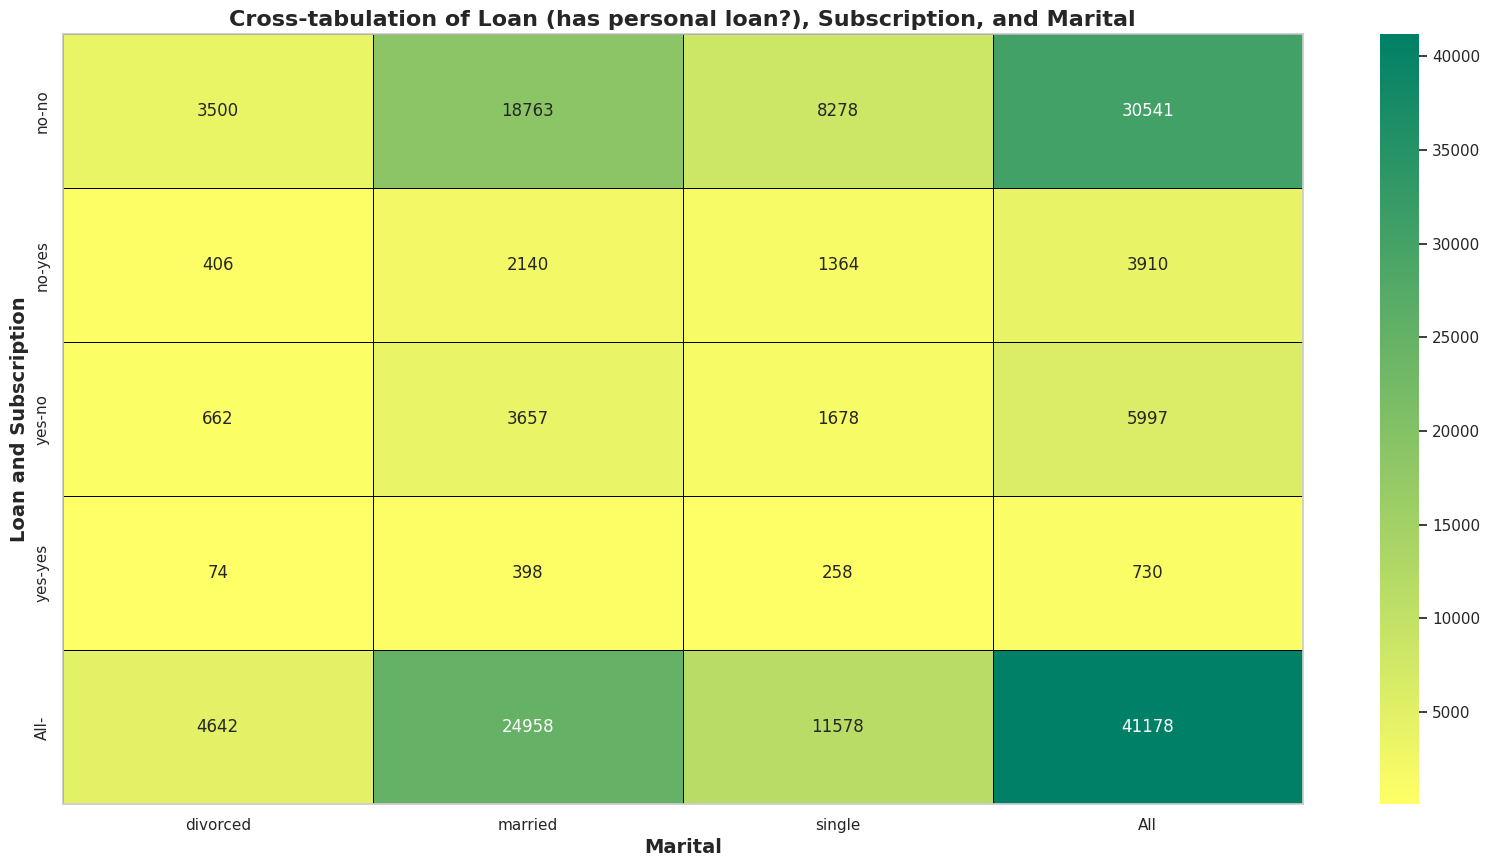

In [334]:
# Plot the correlation between loan, subscription and marital status

cross_tab_df = pd.crosstab([df2['loan'], df2['y']], df2['marital'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Loan (has personal loan?), Subscription, and Marital', fontweight='bold', fontsize=16)
plt.xlabel('Marital', fontweight='bold', fontsize=14)
plt.ylabel('Loan and Subscription', fontweight='bold', fontsize=14)
plt.show()


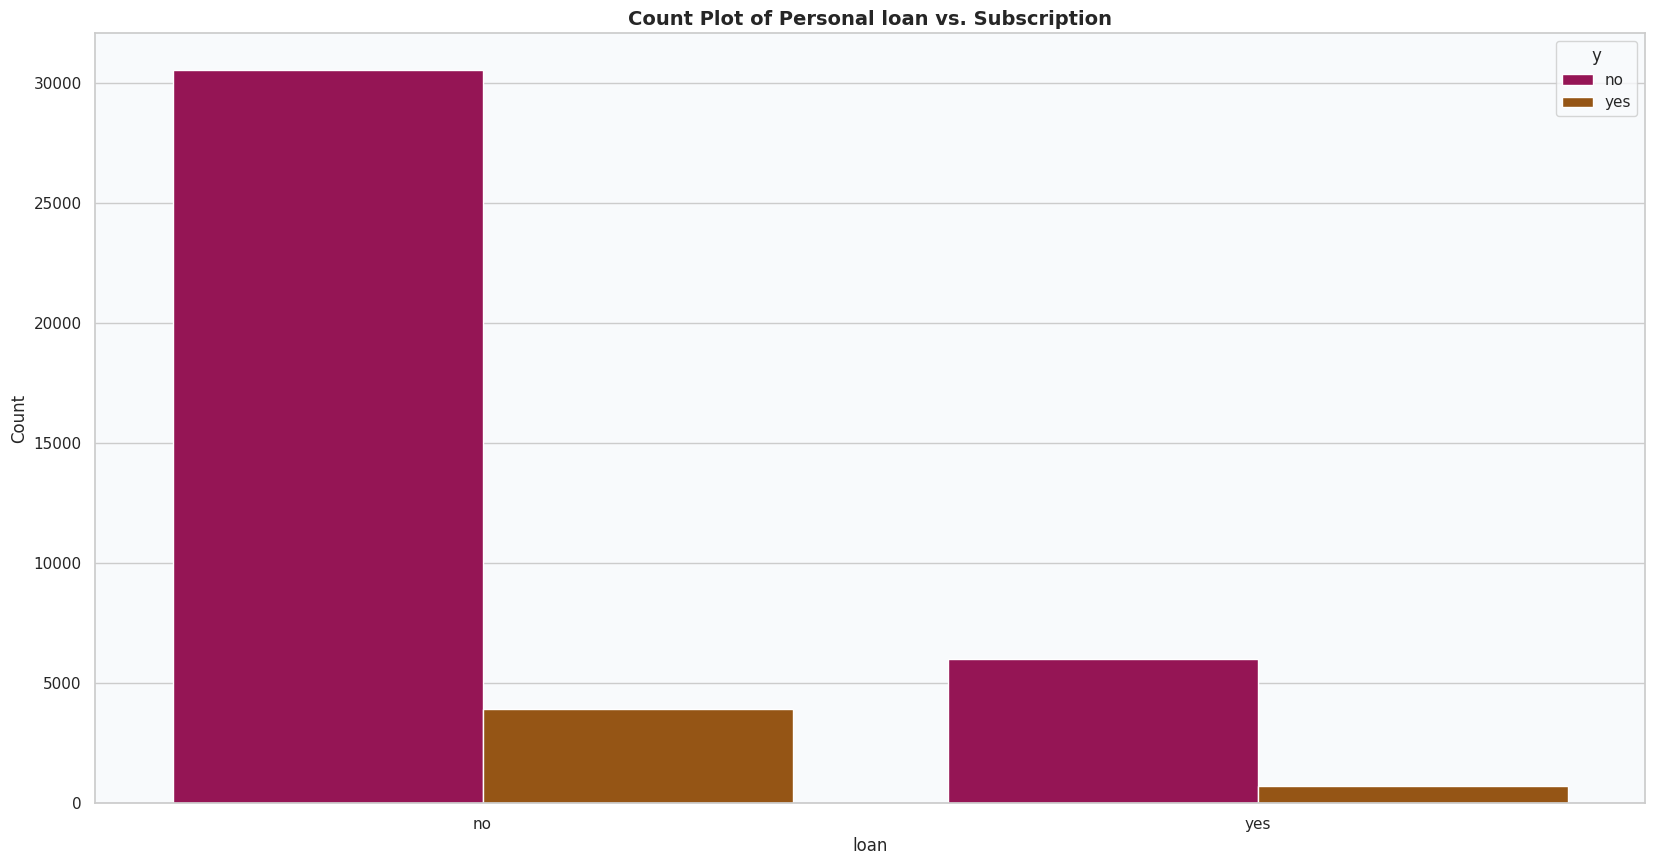

In [335]:
plot_categorical_count(df2[['loan', 'y']], x_column='loan', hue_column='y', title='Count Plot of Personal loan vs. Subscription', palette='brg')


In [336]:
# Plotly
plotly_categorical_count(df2[['loan', 'y']], x_column='loan', hue_column='y', title='Count Plot of Personal loan vs. Subscription')


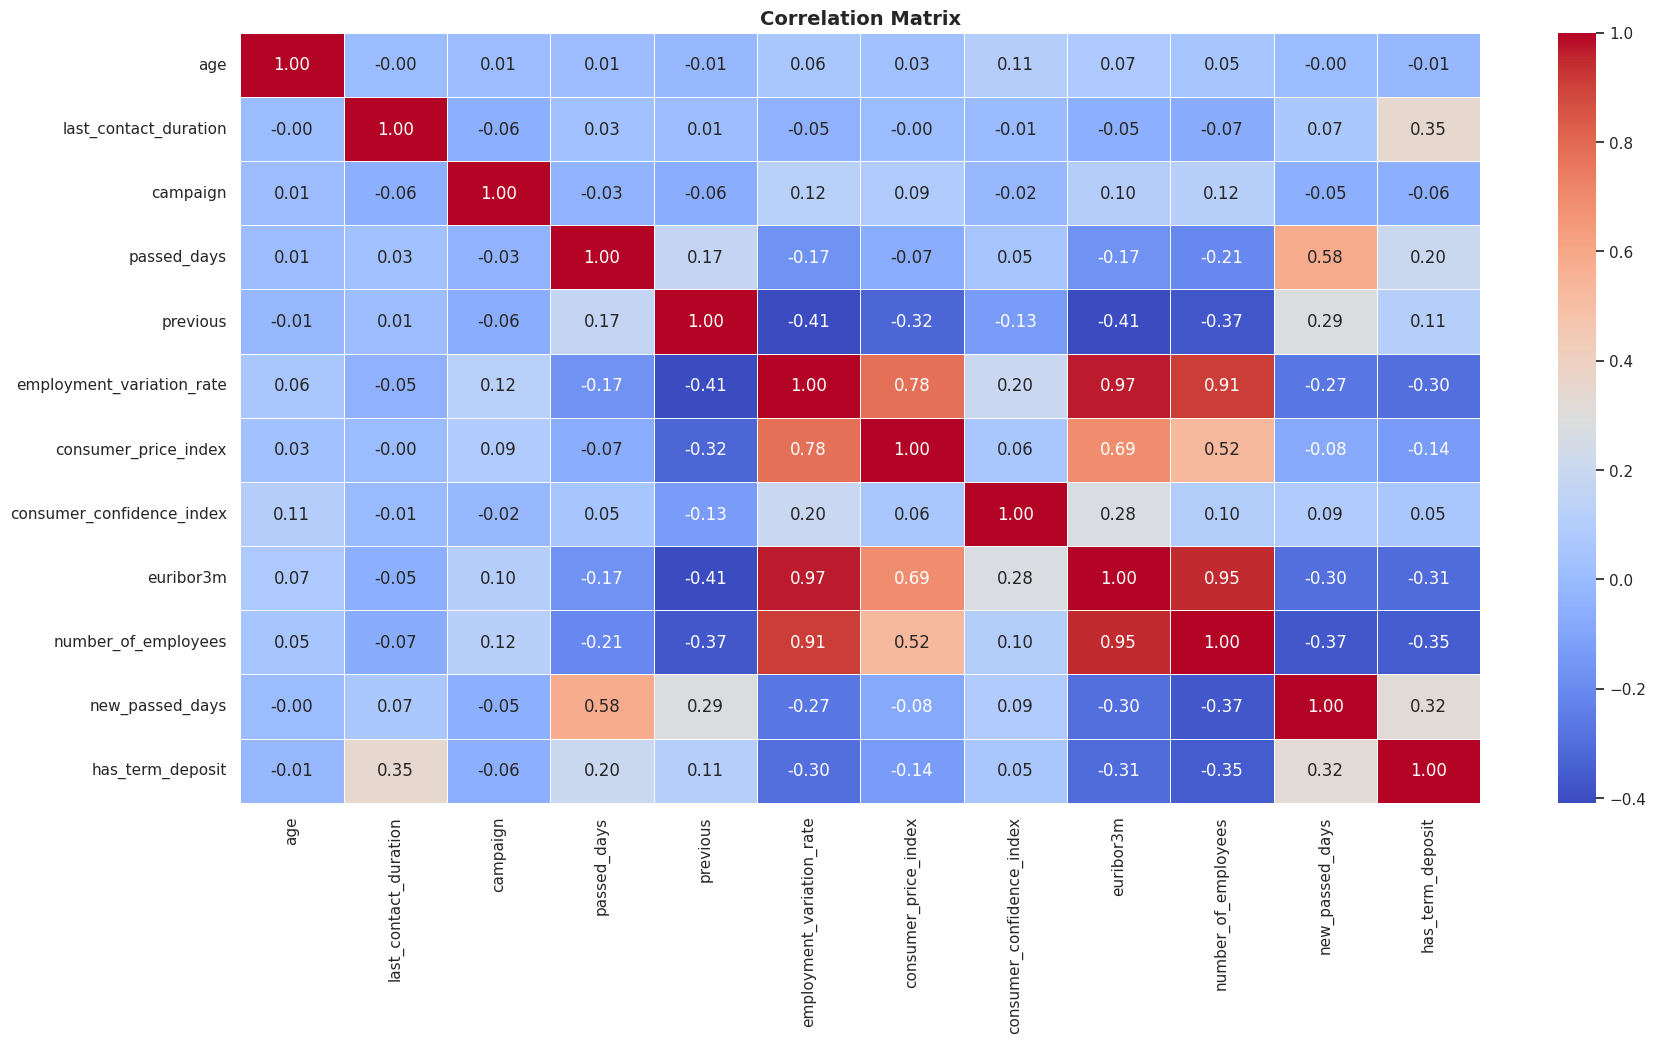

In [337]:
# Select the specified features
numeric_features = df2[['age', 'last_contact_duration', 'campaign', 'passed_days', 'previous',
            'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index',
            'euribor3m', 'number_of_employees', 'new_passed_days', 'has_term_deposit']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Matrix', fontweight='bold', fontsize=14)
plt.show()


In [339]:
numeric_features = df2[['age', 'last_contact_duration', 'campaign', 'passed_days', 'previous',
            'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index',
            'euribor3m', 'number_of_employees', 'new_passed_days', 'has_term_deposit']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a Plotly figure for the correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=numeric_features.columns,
                y=numeric_features.columns,
                color_continuous_scale='blues',  # Choose an appropriate color scale
                title='Correlation Matrix')

# Customize the layout
fig.update_layout(width=1000, height=800)

# Show the figure
fig.show()


In [340]:
# Plot a correlation matrix heatmap between one numeric feature and target
def plot_correlation_heatmap(df, features, target, cmap='coolwarm', figsize=(10, 8)):
    df_selected = df[features + [target]]

    # Calculate correlation matrix
    correlation_matrix = df_selected.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create a heatmap using seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)

    # Set the title
    plt.title(f'Correlation Matrix Heatmap - {target} vs {", ".join(features)}')

    # Show the plot
    plt.show()


In [341]:
# Plot a correlation matrix heatmap between one numeric feature and target

def plot_correlation_heatmap_plotly(df, features, target, colorscale='Viridis'):
    # Select relevant columns
    df_selected = df[features + [target]]

    # Calculate correlation matrix
    correlation_matrix = df_selected.corr()

    # Create a heatmap using Plotly
    heatmap = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale=colorscale,
        colorbar=dict(title='Correlation'),
    ))

    # Customize the layout
    heatmap.update_layout(
        title=f'Correlation Matrix Heatmap - {target} vs {", ".join(features)}',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
    )

    # Show the plot
    heatmap.show()


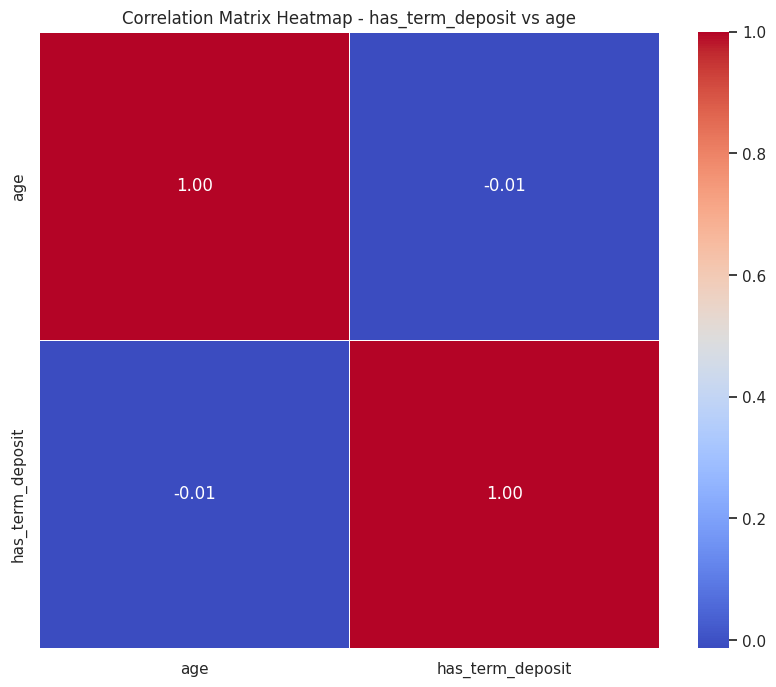

In [343]:
plot_correlation_heatmap(df2, features=['age'], target='has_term_deposit')


In [345]:
plot_correlation_heatmap_plotly(df2, features=['age'], target='has_term_deposit')


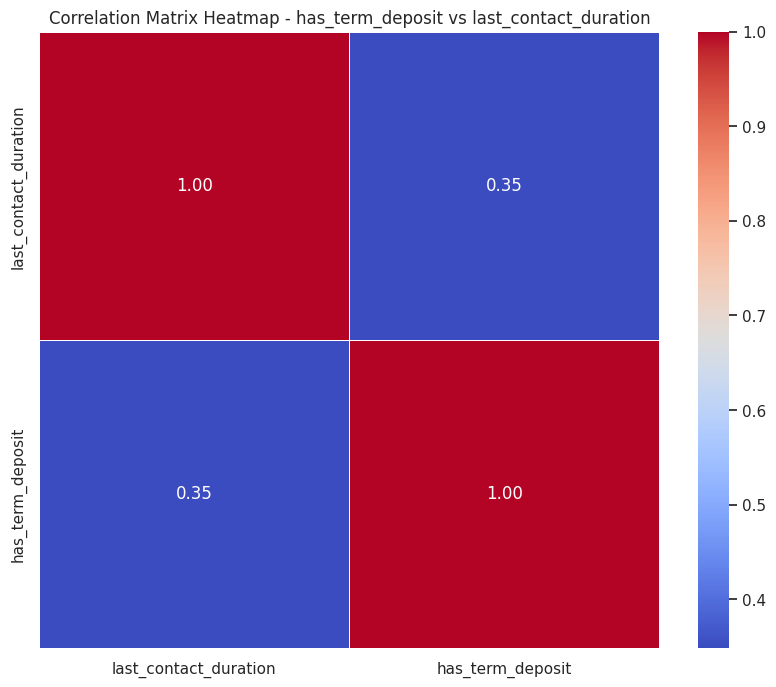

In [346]:
plot_correlation_heatmap(df2, features=['last_contact_duration'], target='has_term_deposit')


In [347]:
plot_correlation_heatmap_plotly(df2, features=['last_contact_duration'], target='has_term_deposit')


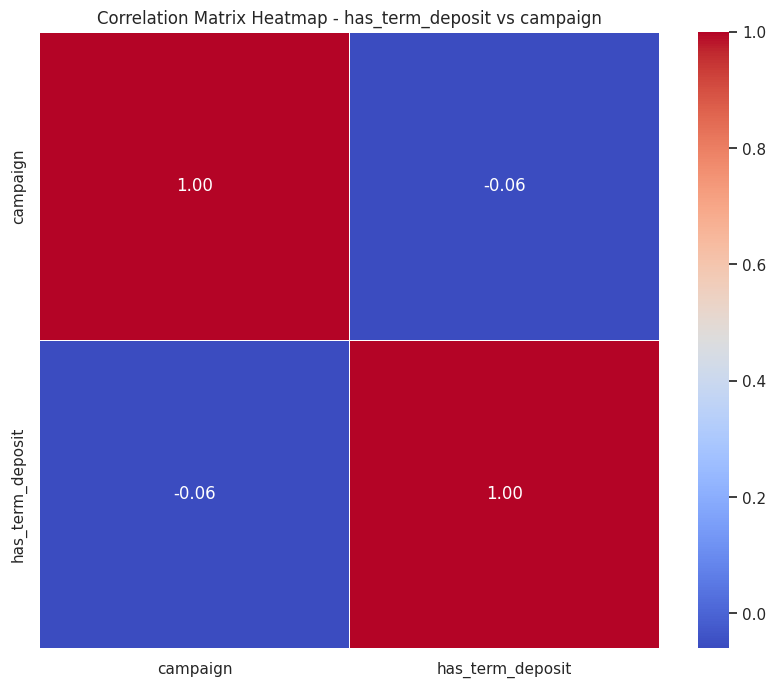

In [348]:
plot_correlation_heatmap(df2, features=['campaign'], target='has_term_deposit')


In [349]:
plot_correlation_heatmap_plotly(df2, features=['campaign'], target='has_term_deposit')

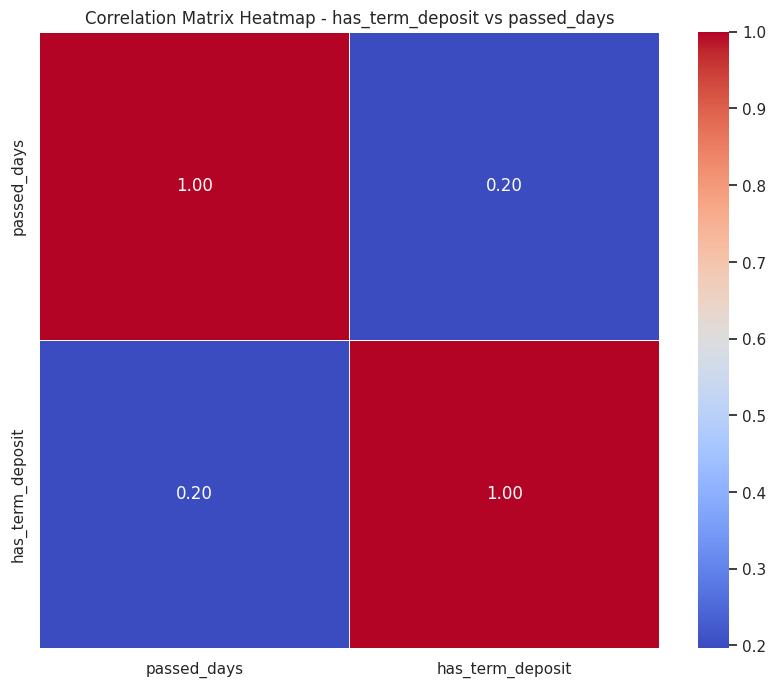

In [350]:
plot_correlation_heatmap(df2, features=['passed_days'], target='has_term_deposit')


In [351]:
plot_correlation_heatmap_plotly(df2, features=['passed_days'], target='has_term_deposit')

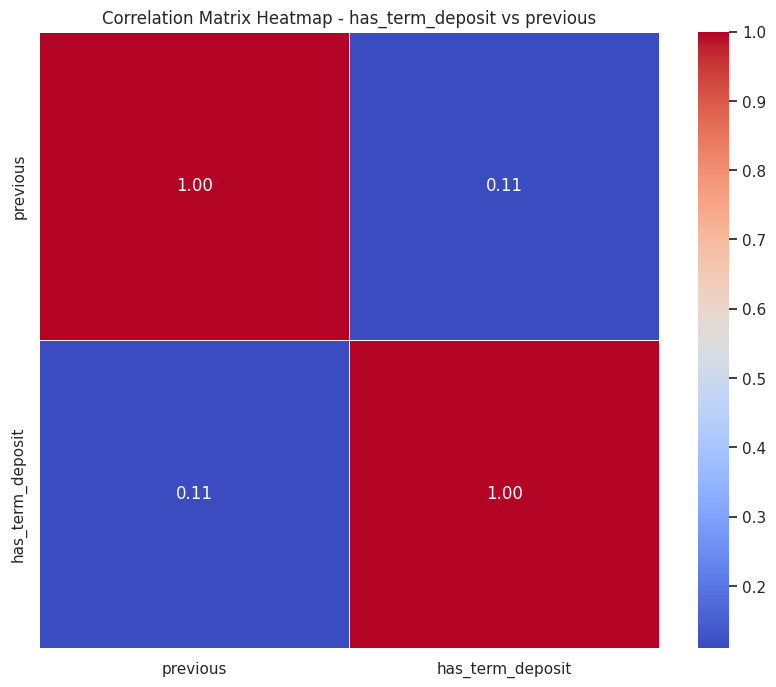

In [352]:
plot_correlation_heatmap(df2, features=['previous'], target='has_term_deposit')


In [353]:
plot_correlation_heatmap_plotly(df2, features=['previous'], target='has_term_deposit')


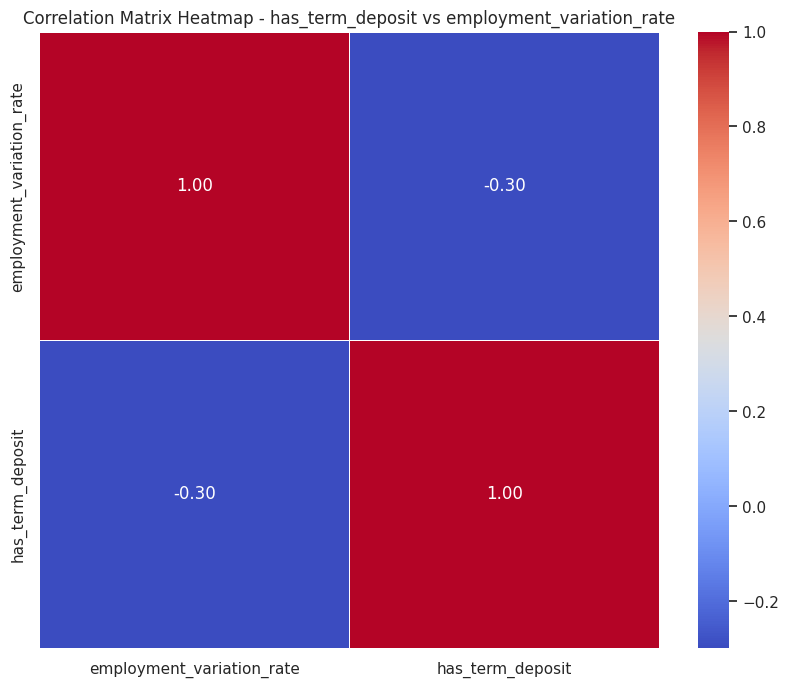

In [354]:
plot_correlation_heatmap(df2, features=['employment_variation_rate'], target='has_term_deposit')


In [355]:
plot_correlation_heatmap_plotly(df2, features=['employment_variation_rate'], target='has_term_deposit')

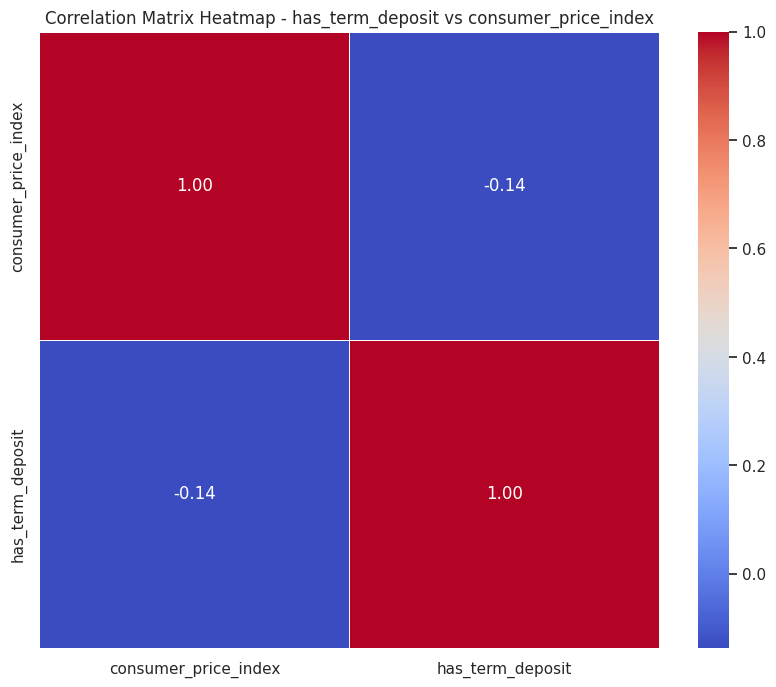

In [356]:
plot_correlation_heatmap(df2, features=['consumer_price_index'], target='has_term_deposit')


In [357]:
plot_correlation_heatmap_plotly(df2, features=['consumer_price_index'], target='has_term_deposit')


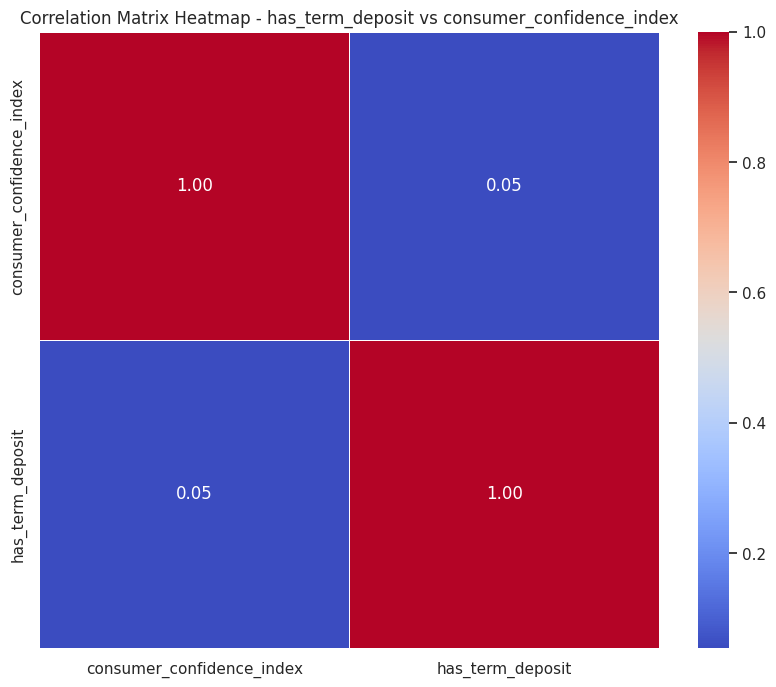

In [358]:
plot_correlation_heatmap(df2, features=['consumer_confidence_index'], target='has_term_deposit')

In [359]:
plot_correlation_heatmap_plotly(df2, features=['consumer_confidence_index'], target='has_term_deposit')


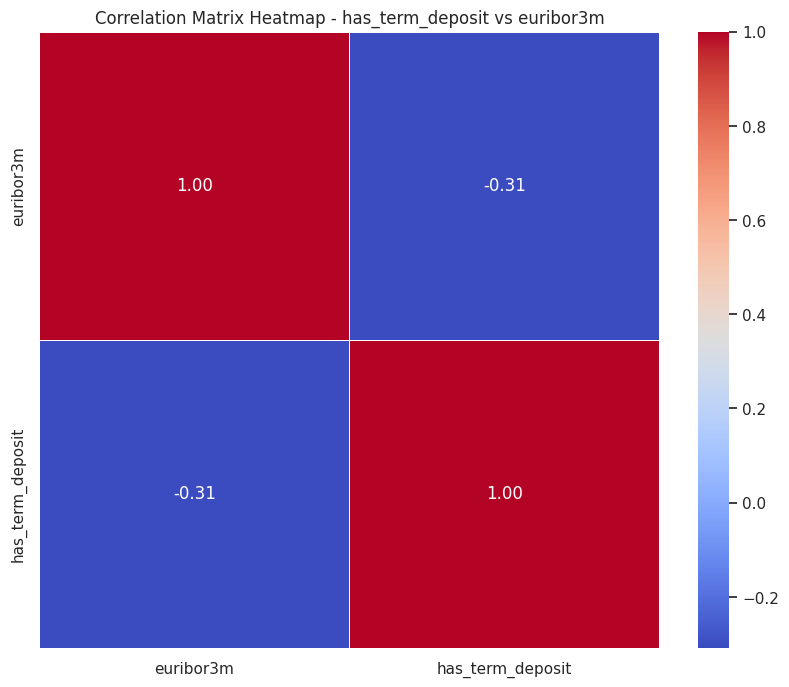

In [360]:
plot_correlation_heatmap(df2, features=['euribor3m'], target='has_term_deposit')


In [361]:
plot_correlation_heatmap_plotly(df2, features=['euribor3m'], target='has_term_deposit')


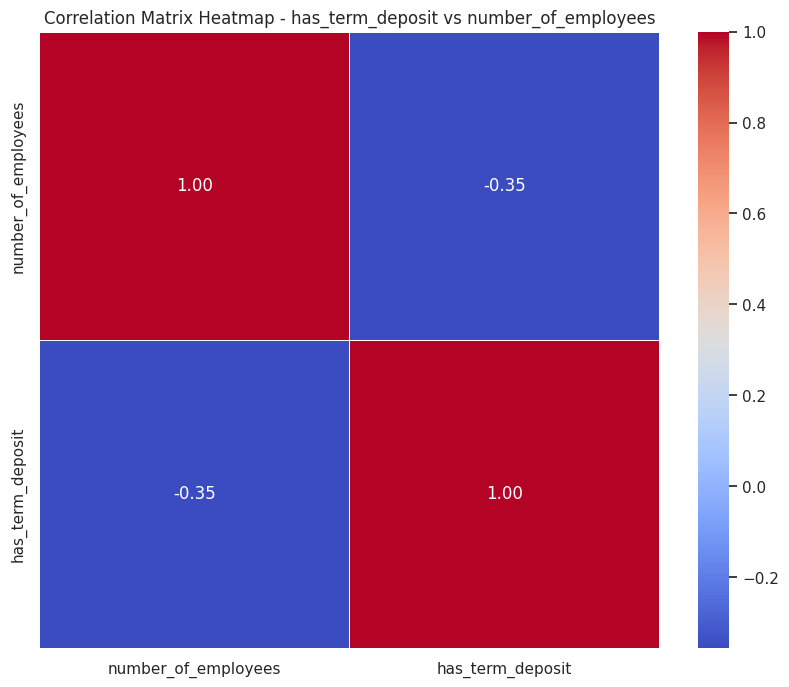

In [362]:
plot_correlation_heatmap(df2, features=['number_of_employees'], target='has_term_deposit')

In [363]:
plot_correlation_heatmap_plotly(df2, features=['number_of_employees'], target='has_term_deposit')


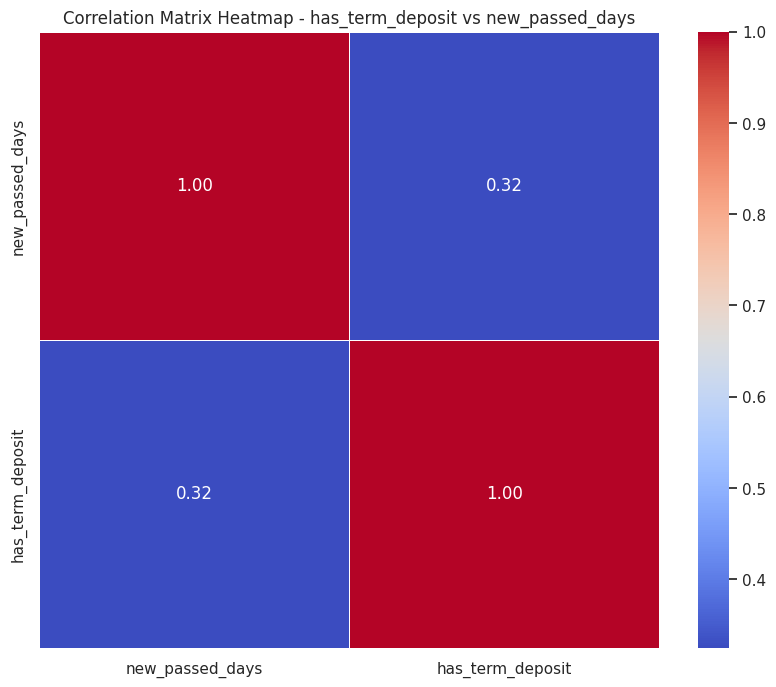

In [364]:
plot_correlation_heatmap(df2, features=['new_passed_days'], target='has_term_deposit')


In [365]:
plot_correlation_heatmap_plotly(df2, features=['new_passed_days'], target='has_term_deposit')


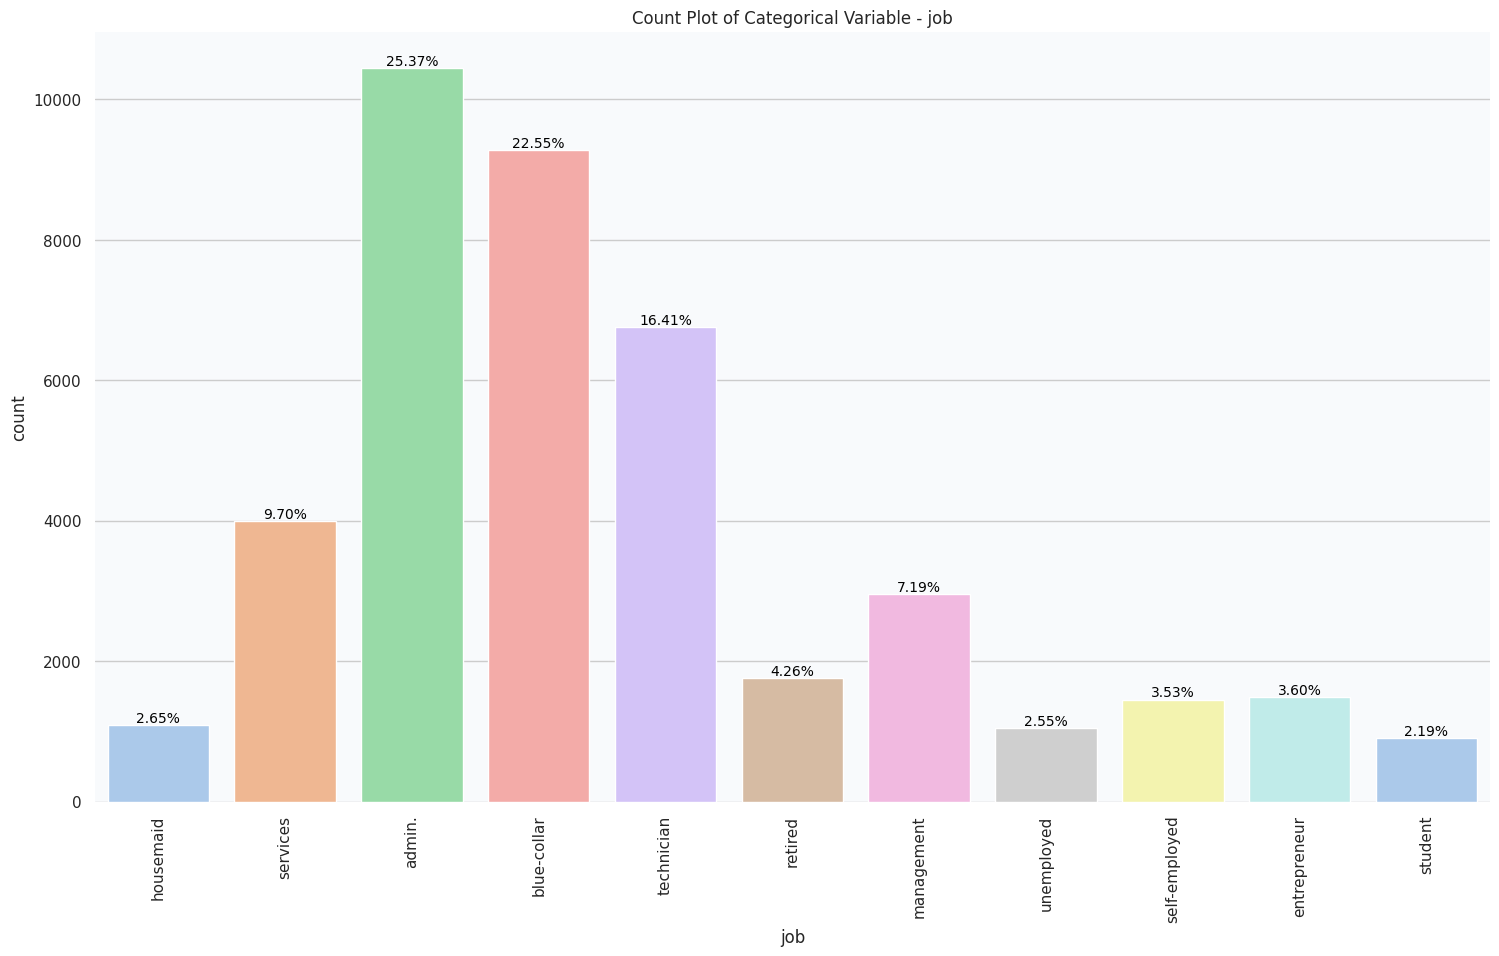

In [366]:
plot_categorical_vars_distribution(df2, 'job')


In [367]:
plot_categorical_vars_distribution_plotly(df2, 'job', '#E6ECF5')


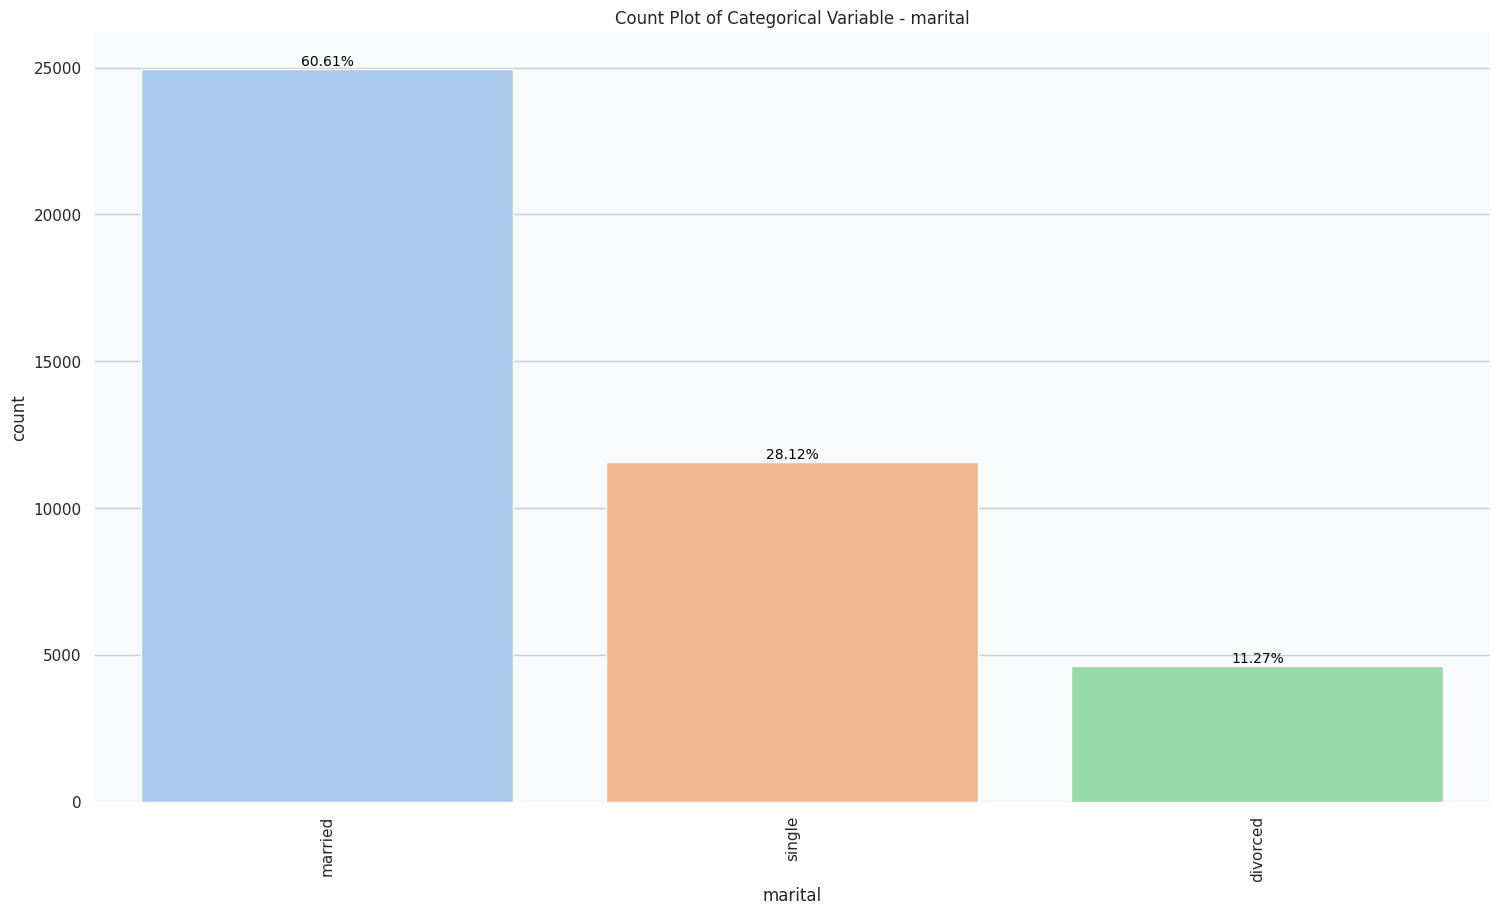

In [368]:
plot_categorical_vars_distribution(df2, 'marital')


In [369]:
plot_categorical_vars_distribution_plotly(df2, 'marital', '#E6ECF5')


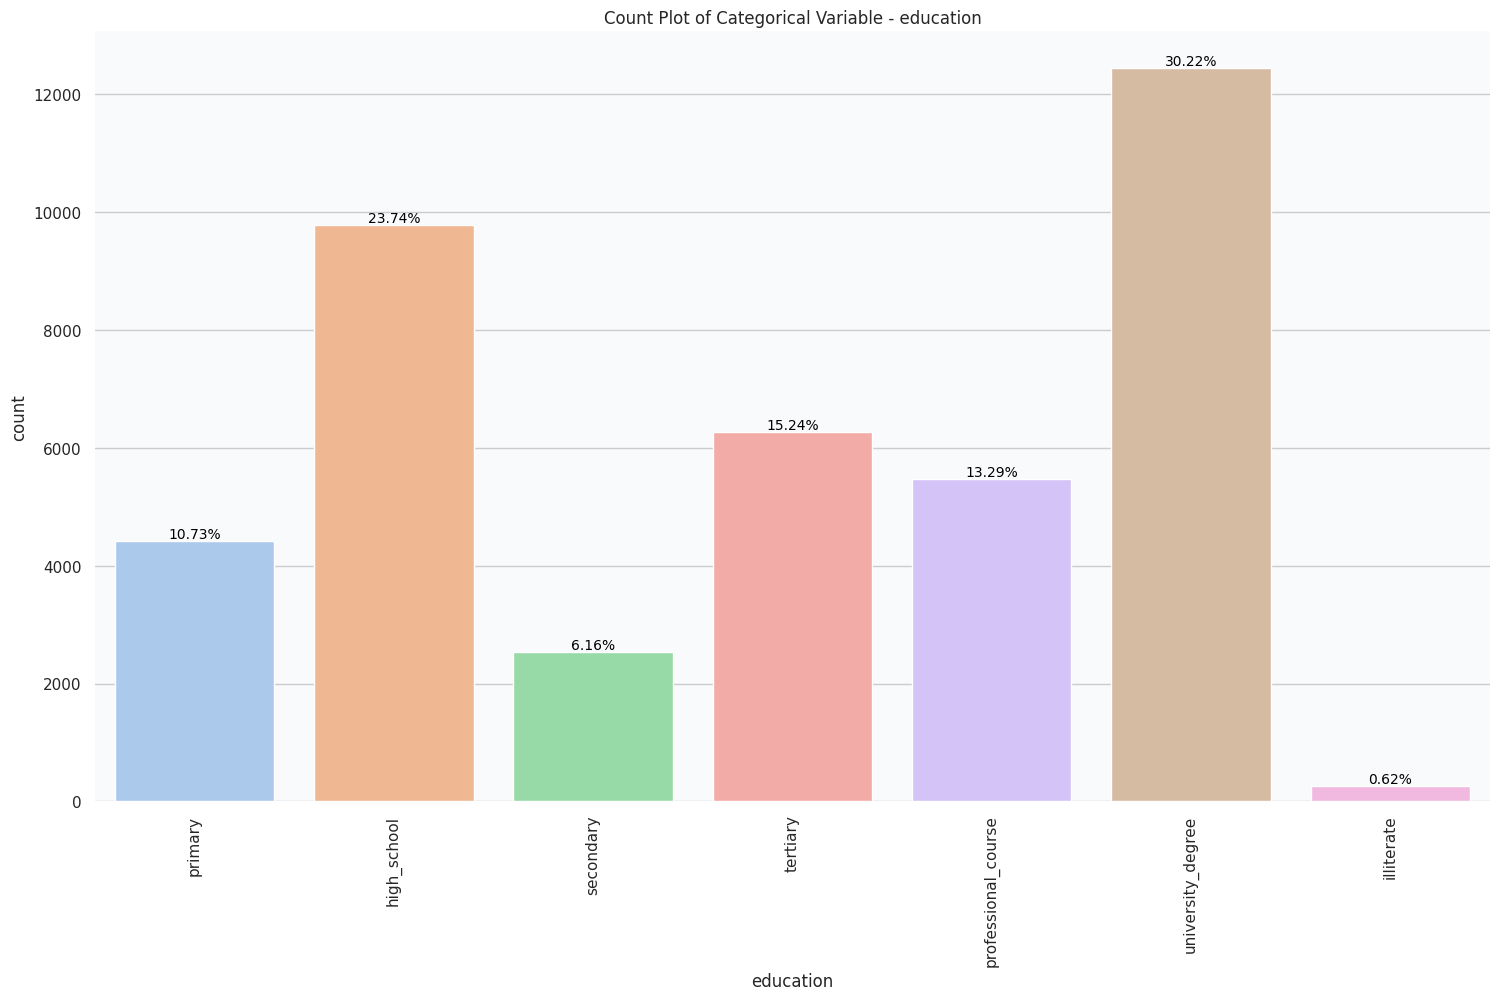

In [370]:
plot_categorical_vars_distribution(df2, 'education')


In [371]:
plot_categorical_vars_distribution_plotly(df2, 'education', '#E6ECF5')


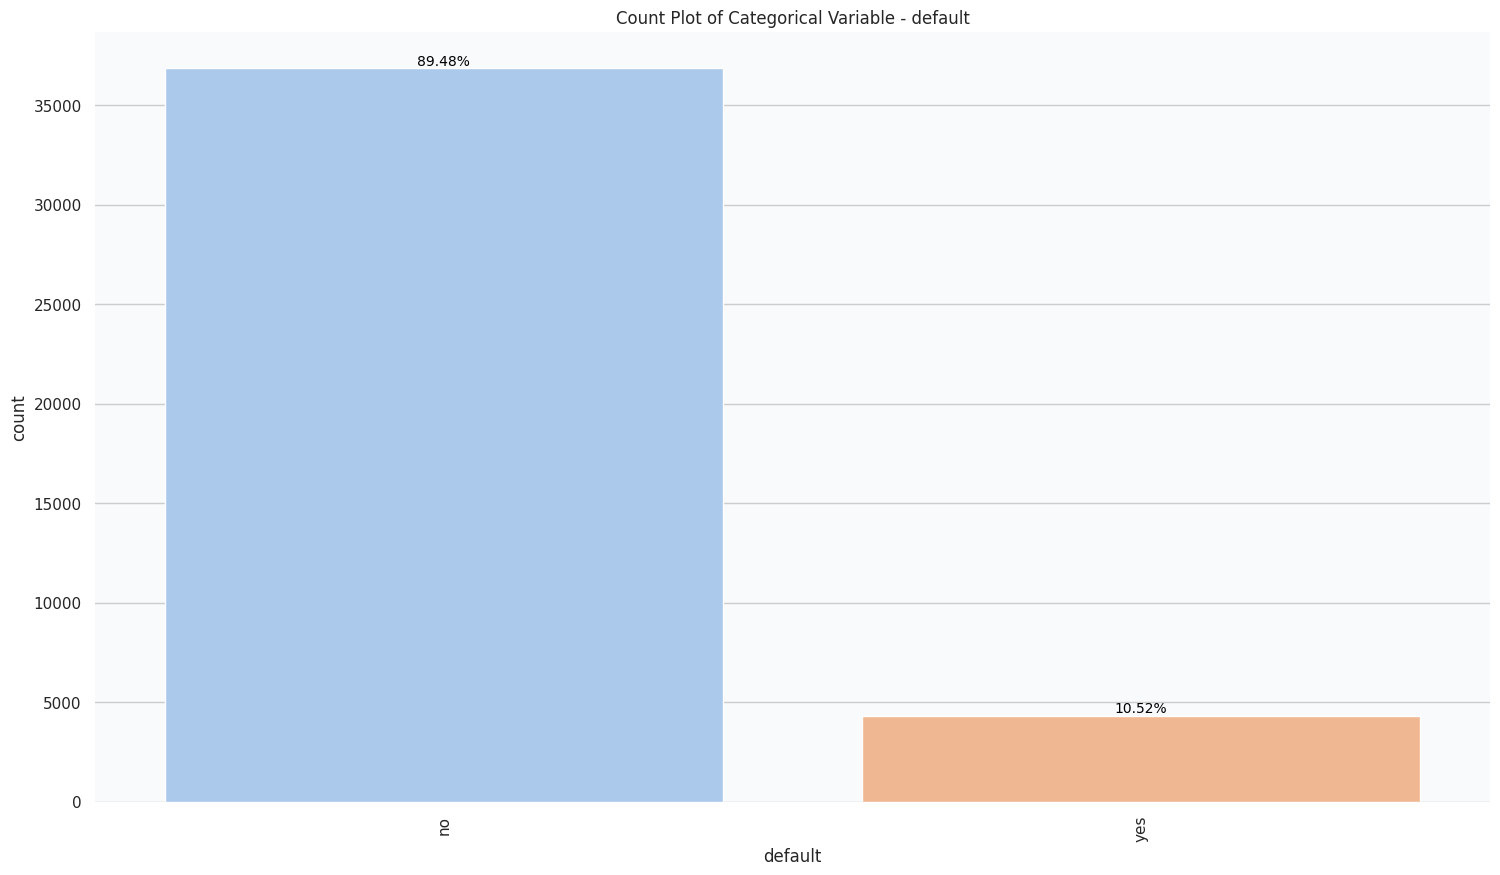

In [196]:
plot_categorical_vars_distribution(df2, 'default')


In [372]:
plot_categorical_vars_distribution_plotly(df2, 'default', '#E6ECF5')


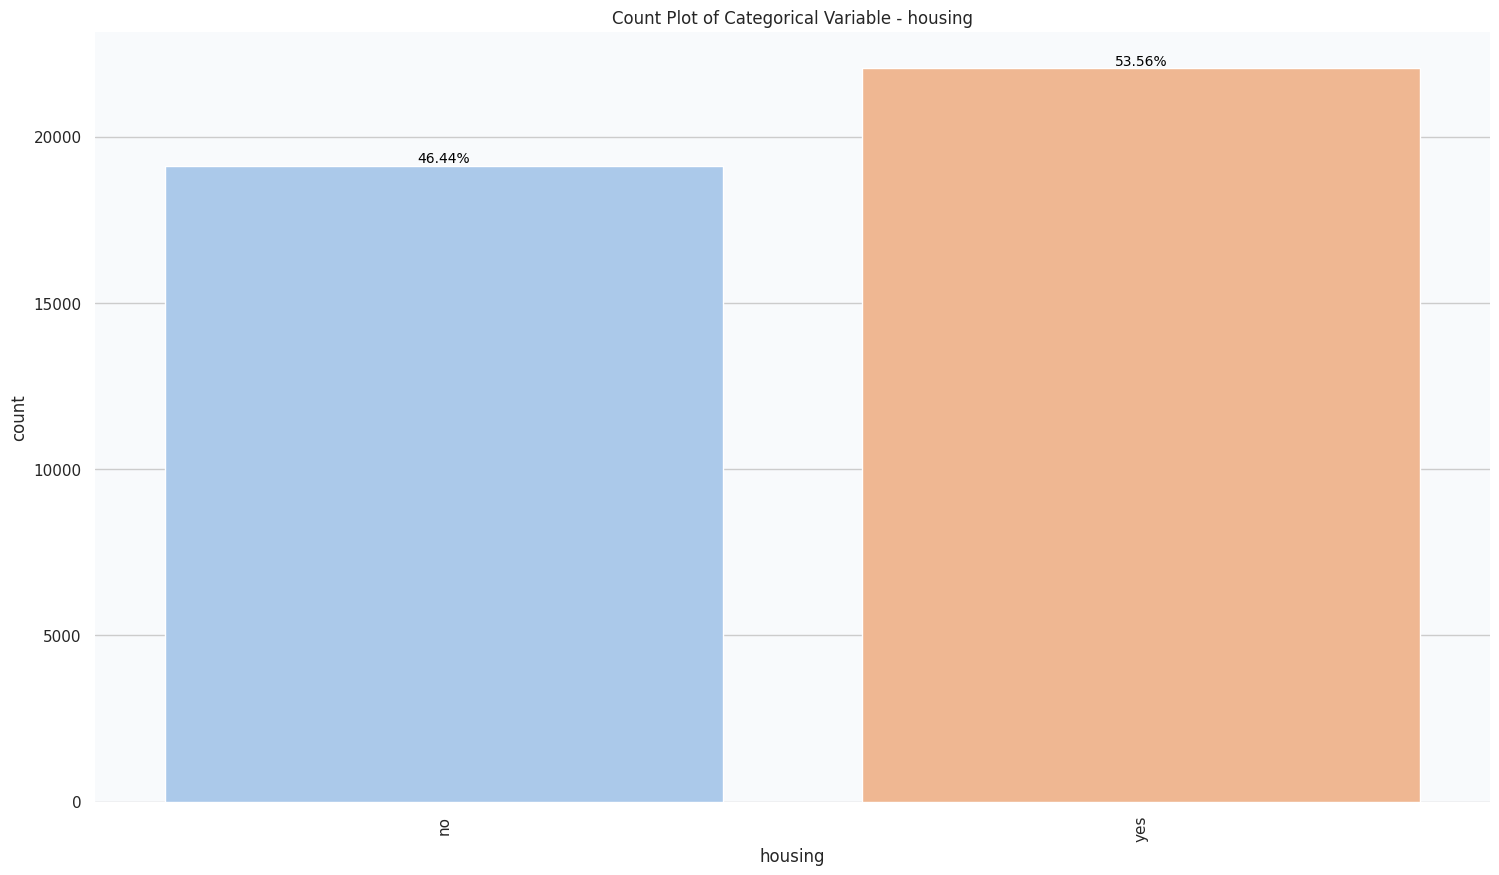

In [373]:
plot_categorical_vars_distribution(df2, 'housing')


In [374]:
plot_categorical_vars_distribution_plotly(df2, 'housing', '#E6ECF5')


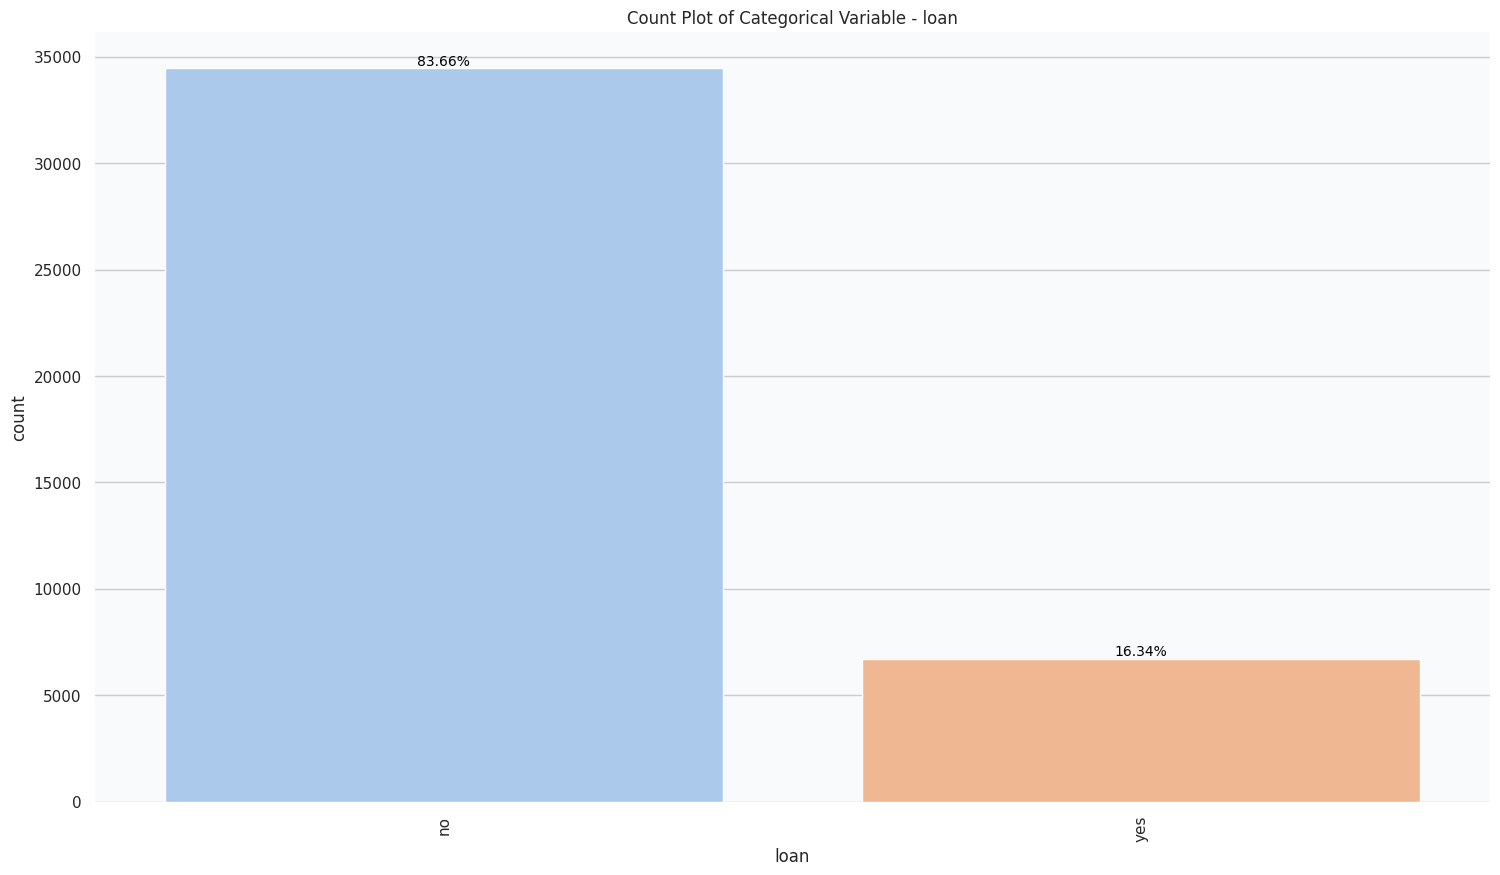

In [375]:
plot_categorical_vars_distribution(df2, 'loan')


In [376]:
plot_categorical_vars_distribution_plotly(df2, 'loan', '#E6ECF5')


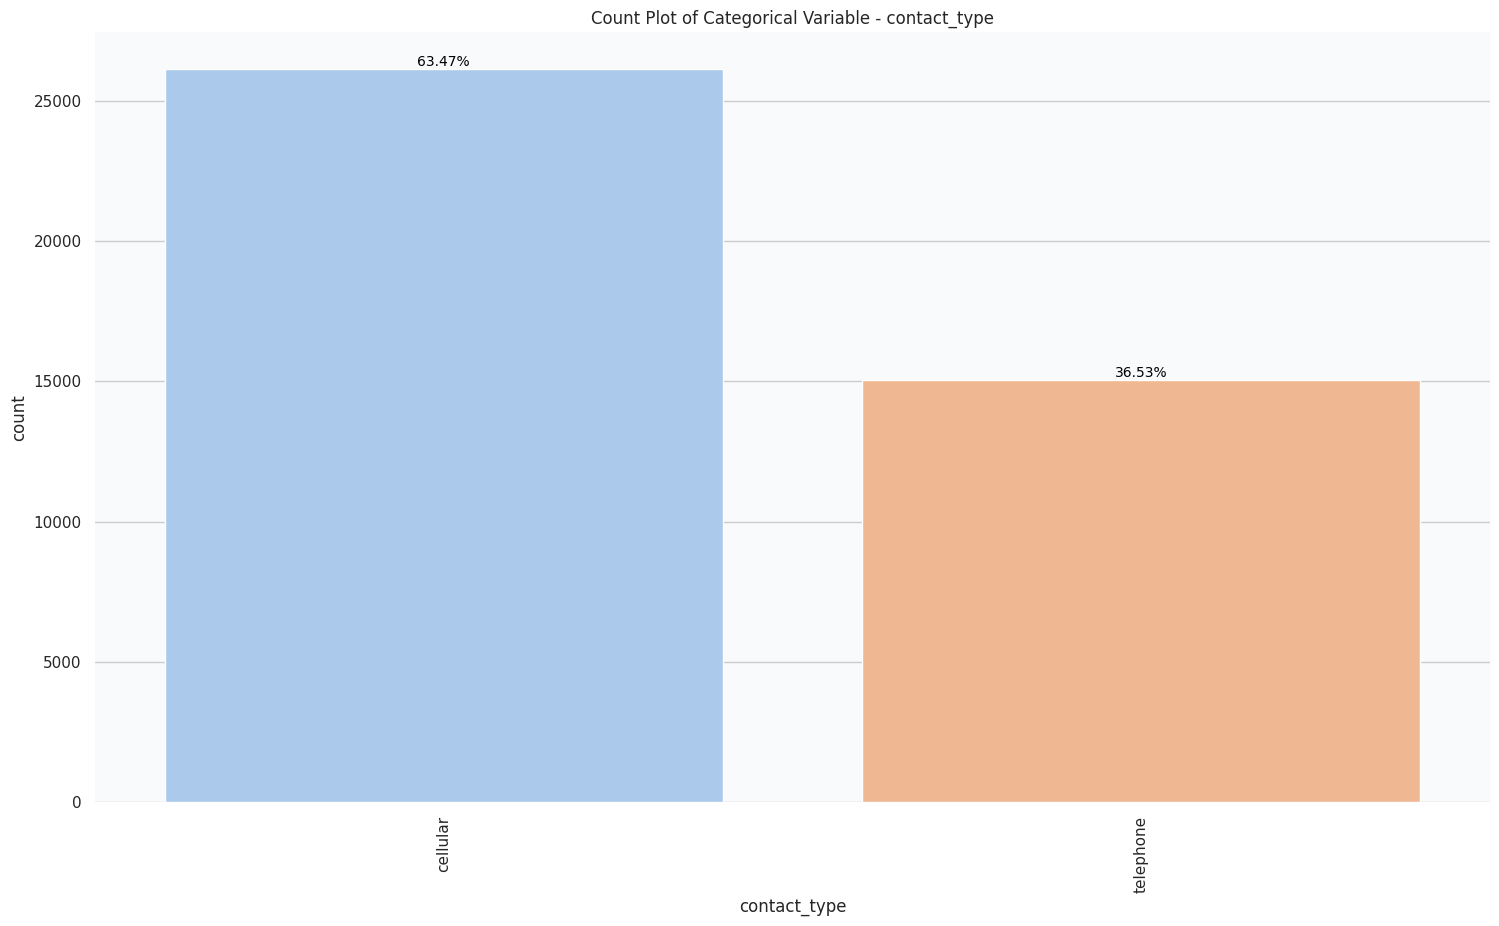

In [377]:
plot_categorical_vars_distribution(df2, 'contact_type')


In [378]:
plot_categorical_vars_distribution_plotly(df2, 'contact_type', '#E6ECF5')


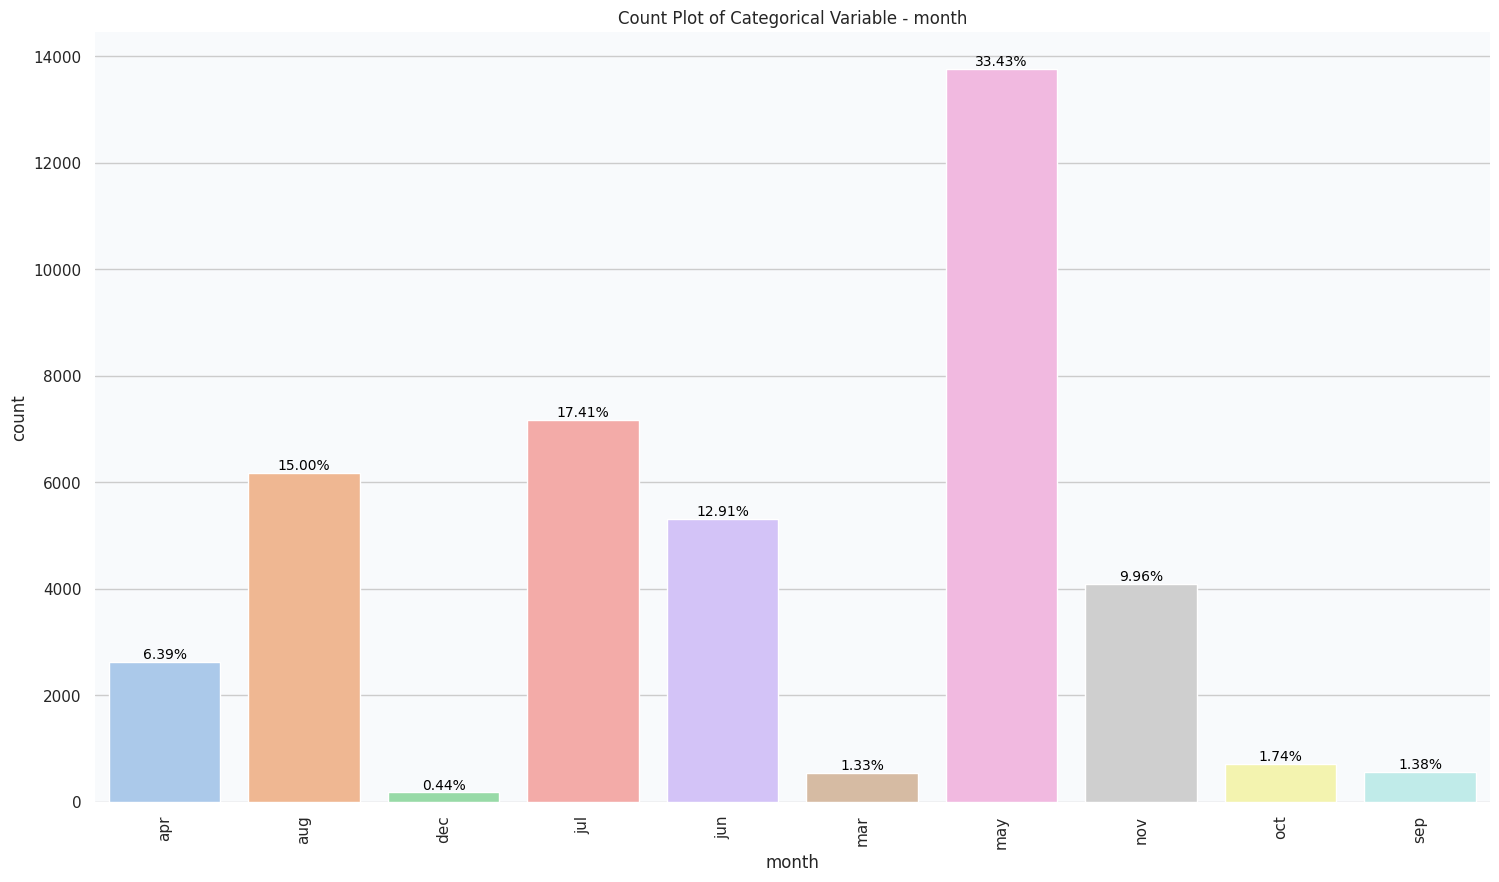

In [379]:
plot_categorical_vars_distribution(df2, 'month')


In [380]:
plot_categorical_vars_distribution_plotly(df2, 'month', '#E6ECF5')


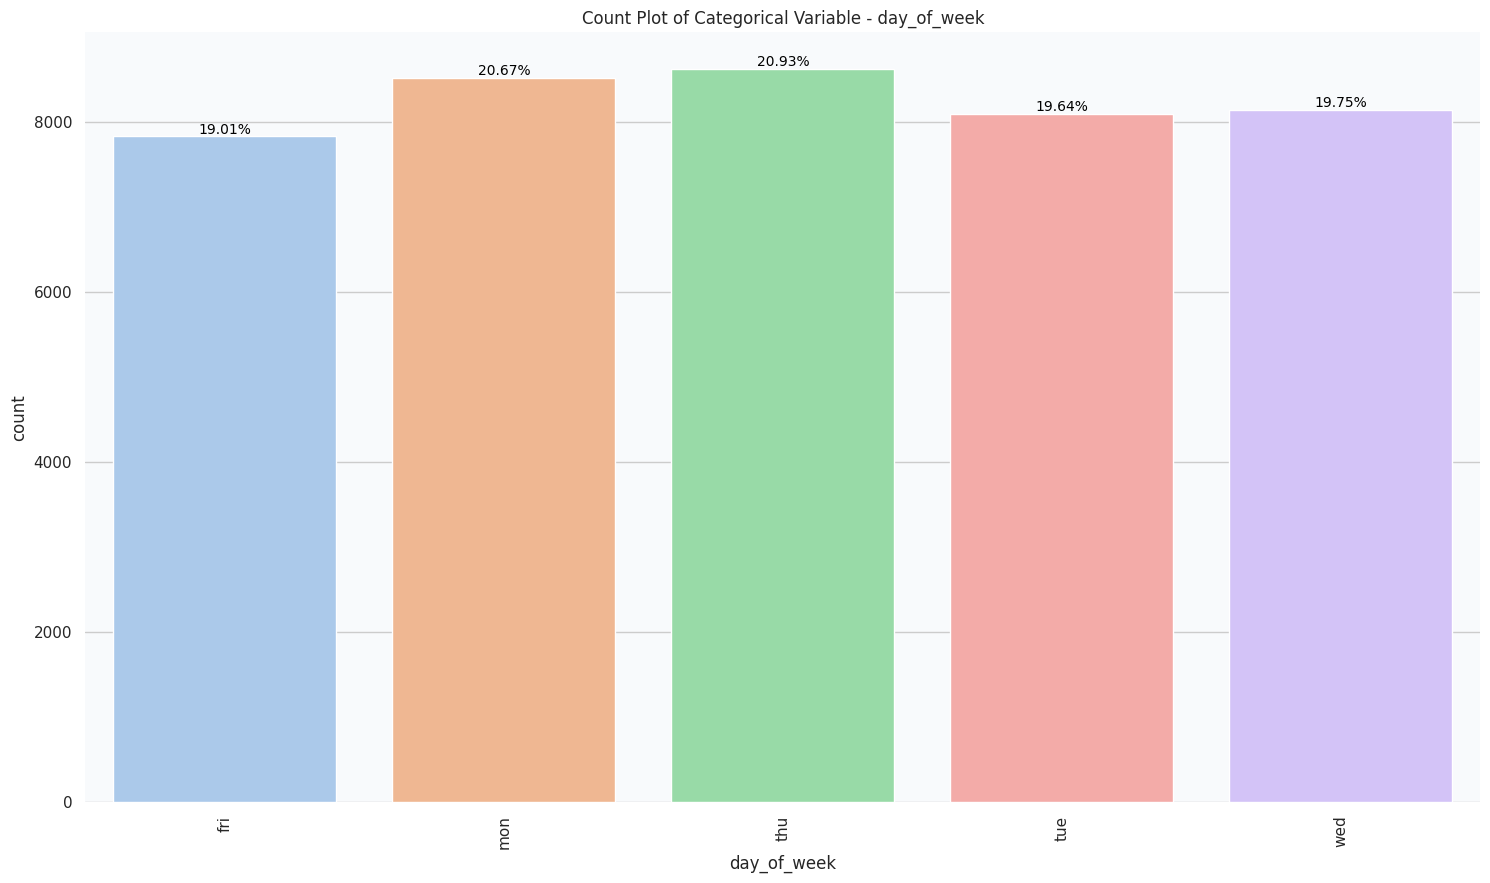

In [381]:
plot_categorical_vars_distribution(df2, 'day_of_week')


In [382]:
plot_categorical_vars_distribution_plotly(df2, 'day_of_week', '#E6ECF5')


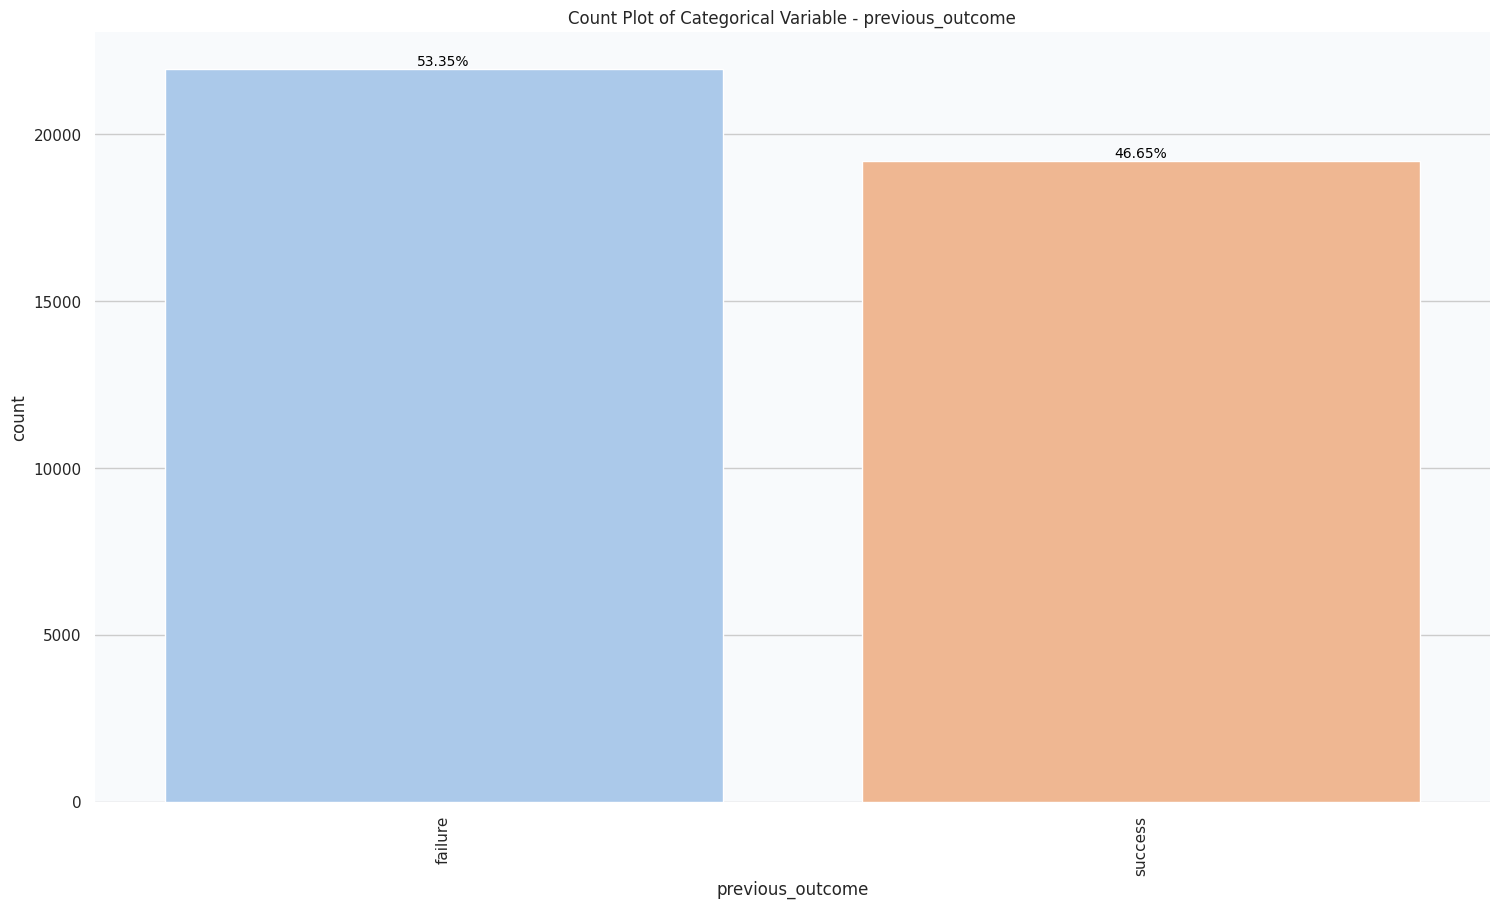

In [383]:
plot_categorical_vars_distribution(df2, 'previous_outcome')


In [384]:
plot_categorical_vars_distribution_plotly(df2, 'previous_outcome', '#E6ECF5')


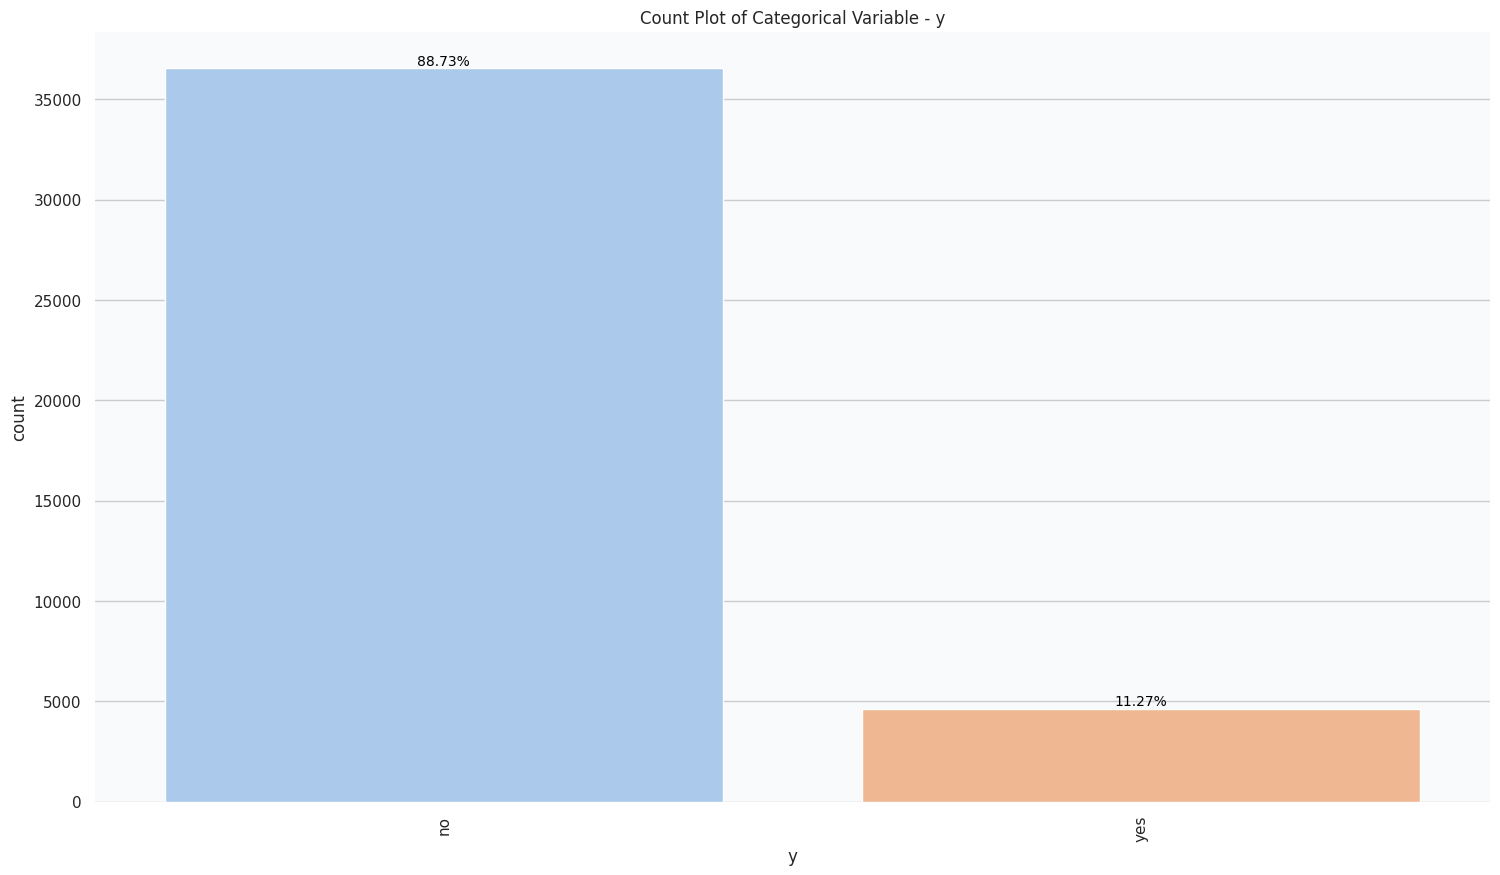

In [385]:
plot_categorical_vars_distribution(df2, 'y')


In [386]:
# Distribution of the Target
plot_categorical_vars_distribution_plotly(df2, 'y', '#E6ECF5')


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'last_contact_duration'),
 Text(2.5, 0, 'campaign'),
 Text(3.5, 0, 'passed_days'),
 Text(4.5, 0, 'previous'),
 Text(5.5, 0, 'employment_variation_rate'),
 Text(6.5, 0, 'consumer_price_index'),
 Text(7.5, 0, 'consumer_confidence_index'),
 Text(8.5, 0, 'euribor3m'),
 Text(9.5, 0, 'number_of_employees'),
 Text(10.5, 0, 'new_passed_days'),
 Text(11.5, 0, 'has_term_deposit')]

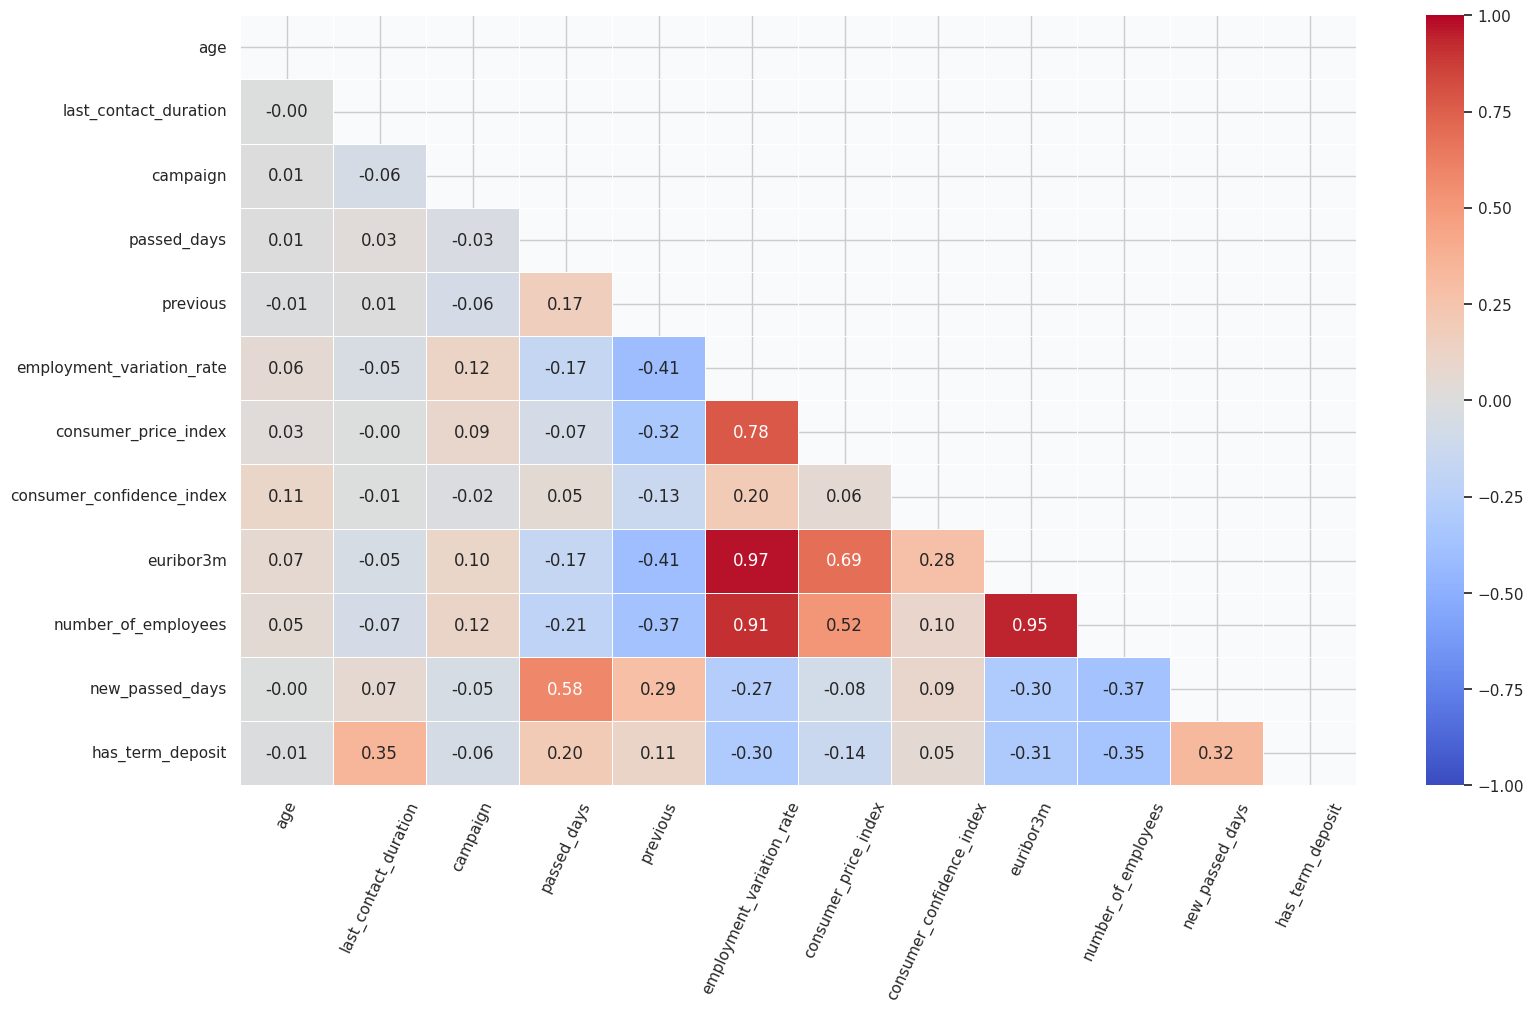

In [387]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(18, 10))

df_corr = numeric_features.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask,
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


In [388]:
df2.describe().T


count         mean         std       min  \
age                        41178.0    39.659454    9.739721    17.000   
last_contact_duration      41178.0   232.997960  189.901335     0.000   
campaign                   41178.0     2.268177    1.700428     1.000   
passed_days                41178.0    -0.951285    0.429453    -1.000   
previous                   41178.0     0.110763    0.313842     0.000   
employment_variation_rate  41178.0     0.081881    1.570927    -3.400   
consumer_price_index       41178.0    93.575701    0.578853    92.201   
consumer_confidence_index  41178.0   -40.502749    4.627885   -50.800   
euribor3m                  41178.0     3.621264    1.734453     0.634   
number_of_employees        41178.0  5167.034147   72.251623  4963.600   
has_term_deposit           41178.0     0.112682    0.316207     0.000   
new_passed_days            41178.0     0.036791    0.188252     0.000   

                                25%       50%       75%       max  
age                          32.000    38.000    47.000    71.000  
last_contact_duration       102.000   180.000   301.000  1036.000  
campaign                      1.000     2.000     3.000    10.000  
passed_days                  -1.000    -1.000    -1.000     3.000  
previous                      0.000     0.000     0.000     1.000  
employment_variation_rate    -1.800     1.100     1.400     1.400  
consumer_price_index         93.075    93.749    93.994    94.767  
consumer_confidence_index   -42.700   -41.800   -36.400   -26.900  
euribor3m                     1.344     4.857     4.961     5.045  
number_of_employees        5099.100  5191.000  5228.100  5228.100  
has_term_deposit              0.000     0.000     0.000     1.000  
new_passed_days               0.000     0.000     0.000     1.000

In [389]:
print('=' * 60)
print('=' * 20, 'Summary statistics', '=' * 20)
print('=' * 60)

# Summary statistics
summary_stats = numeric_features.describe()

# Mean
mean_values = numeric_features.mean()

# Median
median_values = numeric_features.median()

# Standard Deviation
std_dev_values = numeric_features.std()

# Correlation matrix
correlation_matrix = numeric_features.corr()

# Display the results using tabulate
print("\nSummary Statistics:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

print("\nMean Values:")
print(tabulate(mean_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nMedian Values:")
print(tabulate(median_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nStandard Deviation:")
print(tabulate(std_dev_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nCorrelation Matrix:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='pretty'))


==================== Summary statistics ====================

Summary Statistics:
+-------+-------------------+-----------------------+--------------------+---------------------+---------------------+---------------------------+----------------------+---------------------------+--------------------+---------------------+---------------------+---------------------+
|       |        age        | last_contact_duration |      campaign      |     passed_days     |      previous       | employment_variation_rate | consumer_price_index | consumer_confidence_index |     euribor3m      | number_of_employees |   new_passed_days   |  has_term_deposit   |
+-------+-------------------+-----------------------+--------------------+---------------------+---------------------+---------------------------+----------------------+---------------------------+--------------------+---------------------+---------------------+---------------------+
| count |      41178.0      |        41178.0        |      4117

In [390]:
df2.isnull().sum()


age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
age_band                     0
new_passed_days              0
dtype: int64

In [391]:
df2.shape

(41178, 24)

In [392]:
# To see all the variables created globally across the notebook.
%whos


Variable                                    Type                Data/Info
-------------------------------------------------------------------------
DecisionTreeClassifier                      ABCMeta             <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
KNeighborsClassifier                        ABCMeta             <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LabelEncoder                                type                <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression                          type                <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier                      ABCMeta             <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
RandomOverSampler                           ABCMeta             <class 'imblearn.over_sam<...>mpler.RandomOverSampler'>
SVC                                         ABCMeta             <class 'sklearn.svm._classes.SVC'>
StandardScaler                   

### Convert Categorical features to Numeric features

In [394]:
df2.dtypes

age                             int64
job                            object
marital                        object
education                      object
default                        object
housing                        object
loan                           object
contact_type                 category
month                        category
day_of_week                  category
last_contact_duration           int64
campaign                        int64
passed_days                     int64
previous                        int64
previous_outcome               object
employment_variation_rate     float64
consumer_price_index          float64
consumer_confidence_index     float64
euribor3m                     float64
number_of_employees           float64
y                            category
has_term_deposit                int64
age_band                     category
new_passed_days                 int64
dtype: object

In [395]:
LE=LabelEncoder()
cat_var=['job', 'marital', 'education', 'default', 'housing',
         'loan', 'contact_type', 'month', 'day_of_week',
         'previous_outcome', 'y', 'age_band']

for i in cat_var:
  df2[i]=LE.fit_transform(df2[i])


In [396]:
# Split the Data into Validation and Training Sets
X = df2.drop(['has_term_deposit', 'y'], axis=1)
y = df2['has_term_deposit']


In [397]:
sc = StandardScaler()
sc.fit_transform(X)


array([[ 1.67774252, -0.19059758, -0.27860161, ...,  0.33170389,
         1.44949224, -0.19544004],
       [ 1.78041611,  0.93704998, -0.27860161, ...,  0.33170389,
         1.44949224, -0.19544004],
       [-0.2730557 ,  0.93704998, -0.27860161, ...,  0.33170389,
        -0.42087601, -0.19544004],
       ...,
       [ 1.67774252,  0.3732262 , -0.27860161, ..., -2.81566849,
         1.44949224, -0.19544004],
       [ 0.44565943,  1.50087375, -0.27860161, ..., -2.81566849,
         0.51430812, -0.19544004],
       [-0.17038211,  0.3732262 , -0.27860161, ..., -2.81566849,
         3.31986049, -0.19544004]])

In [399]:
# Handling the imbalanced data by Resampling
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [400]:
# This code first splits the dataset into a training set (70%) and a temporary set (30%). Then, it splits the temporary set into testing and validation sets, resulting in the desired sizes for each set.

# The final splits:
# Training set size = 70%
# Testing set size = 15%
# Validation set size = 15%

# Dataset splitting into training and temporary set (combining testing and validation)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Now, split the temporary set into testing and validation

# testing
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)


In [401]:
X_train.shape

(25576, 22)

In [402]:
X_test.shape

(10961, 22)

In [403]:
X_val.shape

(25577, 22)

In [404]:
y_train.shape

(25576,)

In [405]:
y_test.shape

(10961,)

In [406]:
y_val.shape

(25577,)

Model Selection
* Logistic regression.
* SVM - Support Vector Machine.
* KNN - K Nearest Neighbors.
* Decision tree.
* Random forest.

In [407]:
def calc_popularity(y_actual):
  return (sum(y_actual)/len(y_actual))

In [408]:
# Calculates specificity
def calc_specificity(y_actual, y_pred, thresh):
  return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual ==0)


In [409]:
# Evaluation of model performance
def print_report(y_actual, y_pred, thresh):
  auc = roc_auc_score(y_actual, y_pred)
  accuracy = accuracy_score(y_actual, (y_pred > thresh))
  recall = recall_score(y_actual, (y_pred > thresh))
  precision = precision_score(y_actual, (y_pred > thresh))
  specificity = calc_specificity(y_actual, y_pred, thresh)
  f1 = 2 * (precision * recall) / (precision + recall)
  logloss = log_loss(y_actual, y_pred)

  tn, fp, fn, tp = confusion_matrix(y_actual, (y_pred > thresh)).ravel()

  print('AUC: %.3f' % auc)
  print('Accuracy: %.3f' % accuracy)
  print('Recall: %.3f' % recall)
  print('Precision: %.3f' % precision)
  print('Specificity: %.3f' % specificity)
  print('Popularity: %.3f' % calc_popularity(y_actual))
  print('F1: %.3f' % f1)
  print('Log Loss: %.3f' % logloss)

  print('-'*20)

  confusion_matrix_table = tabulate([['True Negative', tn], ['False Positive', fp], ['False Negative', fn], ['True Positive', tp]], headers=['Metric', 'Value'], tablefmt='grid')

  print('---------- Confusion Matrix ----------\n')
  print(confusion_matrix_table)

  print(' ')
  return auc, accuracy, recall, precision, specificity, f1, logloss


In [410]:
# Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.
thresh = 0.5

### Logistic Regression

In [411]:
# Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [412]:
lr.random_state

42

In [413]:
# Training Set Estimation
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_train


array([1, 0, 1, ..., 0, 1, 0])

In [414]:
# Validation Set Estimation
y_pred_lr_val = lr.predict(X_val)
y_pred_lr_val


array([0, 0, 0, ..., 1, 1, 1])

In [415]:
# Training Probabilities
y_pred_lr_train_Proba = lr.predict_proba(X_train)
y_pred_lr_train_Proba


array([[0.24809942, 0.75190058],
       [0.9183913 , 0.0816087 ],
       [0.02161229, 0.97838771],
       ...,
       [0.8723074 , 0.1276926 ],
       [0.28798357, 0.71201643],
       [0.85781847, 0.14218153]])

In [416]:
# Validation Probabilities
y_pred_lr_val_Proba = lr.predict_proba(X_val)
y_pred_lr_val_Proba


array([[0.90927235, 0.09072765],
       [0.88020223, 0.11979777],
       [0.79033846, 0.20966154],
       ...,
       [0.34589584, 0.65410416],
       [0.4565015 , 0.5434985 ],
       [0.16815061, 0.83184939]])

In [417]:
# Training Classification Report
print("================== Logistic Regression Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_lr_train))


================== Logistic Regression Training Classification Report ==================

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     12736
           1       0.82      0.84      0.83     12840

    accuracy                           0.82     25576
   macro avg       0.82      0.82      0.82     25576
weighted avg       0.82      0.82      0.82     25576



In [420]:
# Evaluate the model on the training set
print('=' * 47)
print('======== Logistic Regression Training ========')
print('=' * 47)

thresh = 0.5

lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity, lr_train_f1, lr_train_log_loss = print_report(y_train, y_pred_lr_train, thresh)


======== Logistic Regression Training ========
AUC: 0.824
Accuracy: 0.824
Recall: 0.836
Precision: 0.818
Specificity: 0.813
Popularity: 0.502
F1: 0.827
Log Loss: 6.326
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10354 |
+----------------+---------+
| False Positive |    2382 |
+----------------+---------+
| False Negative |    2107 |
+----------------+---------+
| True Positive  |   10733 |
+----------------+---------+
 


In [421]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== Logistic Regression Validation ========')
print('=' * 48)

thresh = 0.5
lr_val_auc, lr_val_accuracy, lr_val_recall, lr_val_precision, lr_val_specificity, lr_val_f1, lr_val_log_loss = print_report(y_val, y_pred_lr_val, thresh)


======== Logistic Regression Validation ========
AUC: 0.823
Accuracy: 0.823
Recall: 0.836
Precision: 0.814
Specificity: 0.811
Popularity: 0.498
F1: 0.825
Log Loss: 6.367
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10418 |
+----------------+---------+
| False Positive |    2431 |
+----------------+---------+
| False Negative |    2087 |
+----------------+---------+
| True Positive  |   10641 |
+----------------+---------+
 


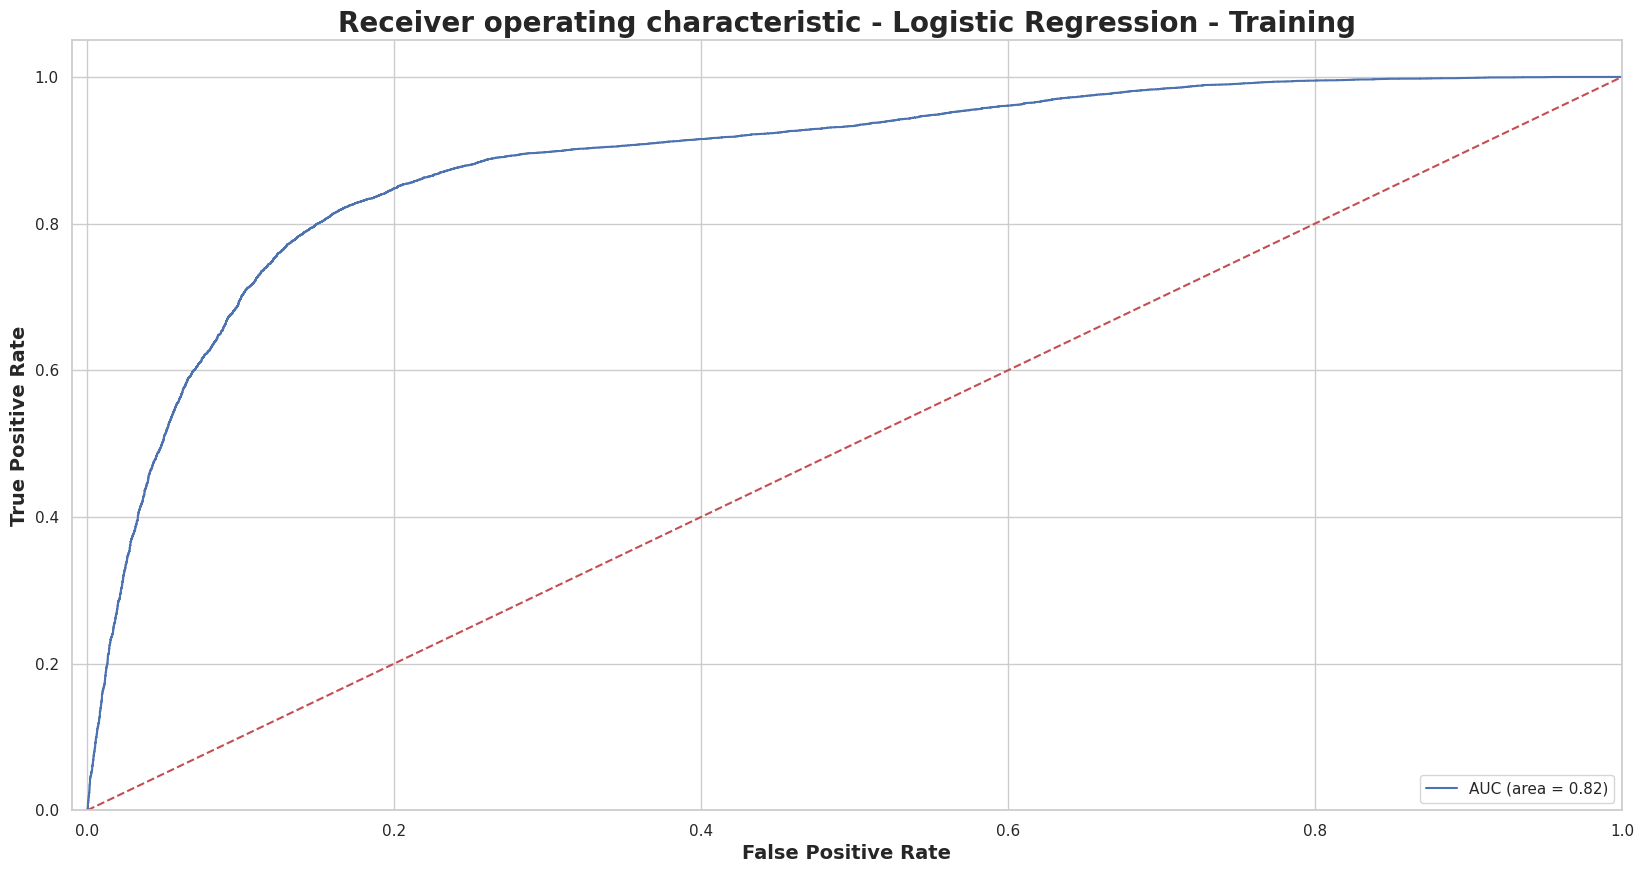

In [422]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_lr_train)
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:, 1])
plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')

plt.title('Receiver operating characteristic - Logistic Regression - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')

plt.show()


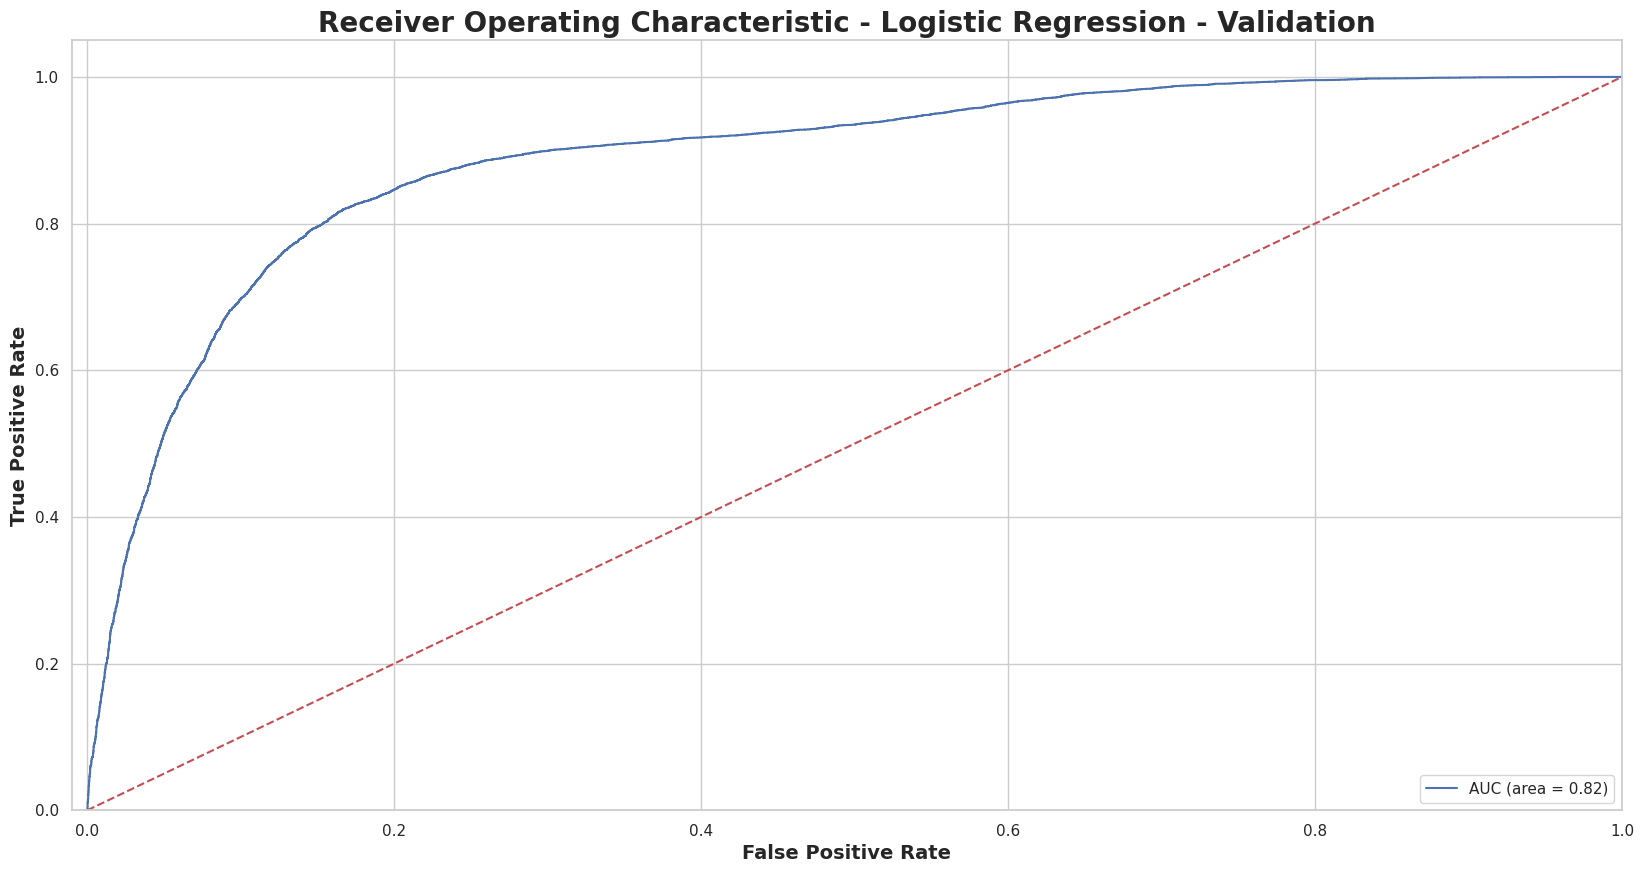

In [425]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_lr_val)
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')

plt.title('Receiver Operating Characteristic - Logistic Regression - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")

# plt.savefig('Log_ROC')
plt.show()


### SVM (Support Vector Machine)